In [2]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math, seaborn
import sklearn.linear_model
import os


%matplotlib inline
from matplotlib import pyplot

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=False)
#reload(c)

pandas.set_option('display.max_rows', 50)
pandas.set_option('display.max_columns', 50)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0, plusminus=False, function=numpy.mean):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values, statistic=function)
    if numpy.nan in bars:
        return pattern % function(values)
    diff = (bars[1] - bars[0]) / 2
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2))
        diff = round_to_n(diff, 1)
    if plusminus:
        return (pattern + " $\\pm$ " + pattern) % (function(values), diff)
    return (pattern + " (" + pattern + "-" + pattern + ")") % ((function(values),) + bars)

def median_with_errorbars(values, decimals=0, plusminus=False, function=numpy.median):
    return mean_with_errorbars(values, decimals, plusminus, function)

def maybe_int(s):
    try:
        return str(int(s))
    except ValueError:
        return str(s)


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
cohort_df = pandas.read_csv("../additional-files/Additional File 1.csv")
cohort_df

time_since_last_chemo_df = pandas.read_excel(
    "../data/relapse_cases_chemo_summary_updated.corrected.xlsx", sheetname=1)
time_since_last_chemo_df.columns = ["patient", "days since last chemo"]
time_since_last_chemo_df.index = time_since_last_chemo_df.patient
time_since_last_chemo_df

cohort_df = cohort_df.merge(time_since_last_chemo_df, left_on="donor", right_on="patient", how="outer")
cohort_df.loc[~cohort_df.treated, "days since last chemo"] = numpy.nan
cohort_df

source_id                 RNA_id   RNA biospecimen  \
0     AOCS-001-1-7    ICGCDBDE20130916001      AOCS-001-2-0   
1     AOCS-004-1-5    ICGCDBDE20130916003      AOCS-004-2-9   
2     AOCS-005-1-8    ICGCDBDE20130916004      AOCS-005-2-1   
3     AOCS-034-1-0   ICGCDBLG2010050402TR      AOCS-034-2-4   
4     AOCS-034-3-8    ICGCDBDE20131122024      AOCS-034-4-1   
5     AOCS-055-1-7    ICGCDBDE20130916005      AOCS-055-2-0   
6     AOCS-056-1-X   ICGCDBLG2010062229TR      AOCS-056-2-3   
7     AOCS-057-1-2  EXTERNAOCS20140414001      AOCS-057-2-6   
8     AOCS-058-1-5   ICGCDBLG2010062235TR      AOCS-058-2-9   
9     AOCS-059-1-8    ICGCDBDE20130916006      AOCS-059-2-1   
10    AOCS-060-1-5    ICGCDBDE20130916007      AOCS-060-2-9   
11    AOCS-061-1-8    ICGCDBDE20130916008      AOCS-061-2-1   
12    AOCS-063-1-3    ICGCDBDE20130916009      AOCS-063-2-7   
13    AOCS-064-1-6   ICGCDBLG2010062214TR      AOCS-064-2-X   
14    AOCS-064-3-3   ICGCDBLG2010062215FR      AOCS-064-4-7   
15    AOCS-065-1-9   ICGCDBLG2010062219TR      AOCS-065-2-2   
16    AOCS-065-3-6   ICGCDBLG2010062220FR      AOCS-065-4-X   
17    AOCS-075-1-0    ICGCDBDE20130916010      AOCS-075-2-4   
18    AOCS-076-1-3    ICGCDBDE20130916011      AOCS-076-2-7   
19    AOCS-077-1-6    ICGCDBDE20130916012      AOCS-077-2-X   
20    AOCS-078-1-9    ICGCDBDE20130916013      AOCS-078-2-2   
21    AOCS-079-1-1    ICGCDBDE20130916014      AOCS-079-2-5   
22    AOCS-080-1-9   ICGCDBLG2010102737TR      AOCS-080-2-2   
23    AOCS-081-1-1    ICGCDBDE20130916015      AOCS-081-2-5   
24    AOCS-083-1-7    ICGCDBDE20130916016      AOCS-083-2-0   
..             ...                    ...               ...   
89    AOCS-149-1-7    ICGCDBDE20131122009      AOCS-149-2-0   
90    AOCS-150-3-1    ICGCDBDE20130916040      AOCS-150-4-5   
91    AOCS-150-8-X  EXTERNAOCS20140414004     AOCS-150-10-7   
92    AOCS-152-1-X    ICGCDBDE20131122022      AOCS-152-2-3   
93    AOCS-153-1-2    ICGCDBDE20131122023      AOCS-153-2-6   
94    AOCS-155-3-5    ICGCDBDE20131122043      AOCS-155-4-9   
95    AOCS-157-1-3  EXTERNAOCS20140414005      AOCS-157-2-7   
96    AOCS-158-1-6  EXTERNAOCS20140414006      AOCS-158-2-X   
97    AOCS-159-1-9  EXTERNAOCS20140227002      AOCS-159-2-2   
98    AOCS-160-1-6  EXTERNAOCS20140414007      AOCS-160-2-X   
99    AOCS-161-1-9  EXTERNAOCS20140227003      AOCS-161-2-2   
100   AOCS-162-1-1  EXTERNAOCS20140227004      AOCS-162-2-5   
101   AOCS-163-1-4  EXTERNAOCS20140227005      AOCS-163-2-8   
102   AOCS-164-1-7  EXTERNAOCS20140227006      AOCS-164-2-0   
103   AOCS-165-1-X  EXTERNAOCS20140227007      AOCS-165-2-3   
104   AOCS-166-1-2  EXTERNAOCS20140227008      AOCS-166-2-6   
105  AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
106  AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   
107   AOCS-167-3-2  EXTERNAOCS20140227013      AOCS-167-4-6   
108   AOCS-168-1-8  EXTERNAOCS20140414008      AOCS-168-2-1   
109   AOCS-169-1-0  EXTERNAOCS20140414009      AOCS-169-2-4   
110   AOCS-170-1-8  EXTERNAOCS20140227017      AOCS-170-2-1   
111   AOCS-170-3-5  EXTERNAOCS20140227018      AOCS-170-4-9   
112   AOCS-171-1-0  EXTERNAOCS20140227014      AOCS-171-2-4   
113   AOCS-171-3-8  EXTERNAOCS20140227015      AOCS-171-4-1   

                              DNA_id DNA_biospecimen  \
0    AOCS_001_ICGC_DBPC_20130205_002    AOCS-001-1-7   
1    AOCS_004_ICGC_DBPC_20130205_004    AOCS-004-1-5   
2    AOCS_005_ICGC_DBPC_20130205_006    AOCS-005-1-8   
3    AOCS_034_ICGC_DBPC_20130205_009    AOCS-034-1-0   
4    AOCS_034_ICGC_DBPC_20130205_007    AOCS-034-3-8   
5    AOCS_055_ICGC_DBPC_20130205_011    AOCS-055-1-7   
6    AOCS_056_ICGC_DBPC_20130205_013    AOCS-056-1-X   
7    AOCS_057_ICGC_DBPC_20130205_015    AOCS-057-1-2   
8    AOCS_058_ICGC_DBPC_20130205_017    AOCS-058-1-5   
9    AOCS_059_ICGC_DBPC_20130205_019    AOCS-059-1-8   
10   AOCS_060_ICGC_DBPC_20130205_021    AOCS-060-1-5   
11   AOCS_061_ICGC_DBPC_20130205_023    AOCS-061-1-8   
12  

In [138]:
new_cohort_df = cohort_df.copy()

chemo_lines_df = pandas.read_excel(
    "../data/relapse_cases_chemo_summary_updated.corrected.normalized.xlsx",
    sheetname=0)
del chemo_lines_df["icgc_donor_id"]
chemo_lines_df

chemo_line_cols = set()
for _, row in chemo_lines_df.iterrows():
    drug = row["DRUG NAME"].lower()
    if drug in new_cohort_df.columns:
        col = "Lines of %s" % drug
        chemo_line_cols.add(col)
        lines = float(row["Number of lines of chemotherapy"])
        new_cohort_df.loc[
            (new_cohort_df.submitted_donor_id == row.submitted_donor_id) & (new_cohort_df.treated),
            col
        ] = lines
        
        col = "Cycles of %s" % drug
        chemo_line_cols.add(col)
        lines = float(row["Number of cycles of chemotherapy"])
        new_cohort_df.loc[
            (new_cohort_df.submitted_donor_id == row.submitted_donor_id) & (new_cohort_df.treated),
            col
        ] = lines

new_cohort_df["Lines of platinum"] = new_cohort_df["Lines of carboplatin"] + new_cohort_df["Lines of cisplatin"].fillna(0)
new_cohort_df["Cycles of platinum"] = new_cohort_df["Cycles of carboplatin"] + new_cohort_df["Cycles of cisplatin"].fillna(0)

chemo_line_cols.add("Lines of platinum")       
chemo_line_cols.add("Cycles of platinum")       


chemo_line_cols = sorted(chemo_line_cols)
new_cohort_df

total_lines_per_donor = chemo_lines_df.groupby("submitted_donor_id")["Total lines for patient"].mean()
new_cohort_df["total lines"] = new_cohort_df.submitted_donor_id.map(total_lines_per_donor)
new_cohort_df["total cycles"] = new_cohort_df[[
    c for c in new_cohort_df.columns if c.startswith("Cycles of")
]].sum(1)

new_cohort_df.loc[~new_cohort_df.treated, "total lines"] = numpy.nan
new_cohort_df.loc[~new_cohort_df.treated, "total cycles"] = numpy.nan

new_cohort_df.index = new_cohort_df.source_id

new_cohort_df

source_id                 RNA_id   RNA biospecimen  \
source_id                                                               
AOCS-001-1-7    AOCS-001-1-7    ICGCDBDE20130916001      AOCS-001-2-0   
AOCS-004-1-5    AOCS-004-1-5    ICGCDBDE20130916003      AOCS-004-2-9   
AOCS-005-1-8    AOCS-005-1-8    ICGCDBDE20130916004      AOCS-005-2-1   
AOCS-034-1-0    AOCS-034-1-0   ICGCDBLG2010050402TR      AOCS-034-2-4   
AOCS-034-3-8    AOCS-034-3-8    ICGCDBDE20131122024      AOCS-034-4-1   
AOCS-055-1-7    AOCS-055-1-7    ICGCDBDE20130916005      AOCS-055-2-0   
AOCS-056-1-X    AOCS-056-1-X   ICGCDBLG2010062229TR      AOCS-056-2-3   
AOCS-057-1-2    AOCS-057-1-2  EXTERNAOCS20140414001      AOCS-057-2-6   
AOCS-058-1-5    AOCS-058-1-5   ICGCDBLG2010062235TR      AOCS-058-2-9   
AOCS-059-1-8    AOCS-059-1-8    ICGCDBDE20130916006      AOCS-059-2-1   
AOCS-060-1-5    AOCS-060-1-5    ICGCDBDE20130916007      AOCS-060-2-9   
AOCS-061-1-8    AOCS-061-1-8    ICGCDBDE20130916008      AOCS-061-2-1   
AOCS-063-1-3    AOCS-063-1-3    ICGCDBDE20130916009      AOCS-063-2-7   
AOCS-064-1-6    AOCS-064-1-6   ICGCDBLG2010062214TR      AOCS-064-2-X   
AOCS-064-3-3    AOCS-064-3-3   ICGCDBLG2010062215FR      AOCS-064-4-7   
AOCS-065-1-9    AOCS-065-1-9   ICGCDBLG2010062219TR      AOCS-065-2-2   
AOCS-065-3-6    AOCS-065-3-6   ICGCDBLG2010062220FR      AOCS-065-4-X   
AOCS-075-1-0    AOCS-075-1-0    ICGCDBDE20130916010      AOCS-075-2-4   
AOCS-076-1-3    AOCS-076-1-3    ICGCDBDE20130916011      AOCS-076-2-7   
AOCS-077-1-6    AOCS-077-1-6    ICGCDBDE20130916012      AOCS-077-2-X   
AOCS-078-1-9    AOCS-078-1-9    ICGCDBDE20130916013      AOCS-078-2-2   
AOCS-079-1-1    AOCS-079-1-1    ICGCDBDE20130916014      AOCS-079-2-5   
AOCS-080-1-9    AOCS-080-1-9   ICGCDBLG2010102737TR      AOCS-080-2-2   
AOCS-081-1-1    AOCS-081-1-1    ICGCDBDE20130916015      AOCS-081-2-5   
AOCS-083-1-7    AOCS-083-1-7    ICGCDBDE20130916016      AOCS-083-2-0   
...                      ...                    ...               ...   
AOCS-149-1-7    AOCS-149-1-7    ICGCDBDE20131122009      AOCS-149-2-0   
AOCS-150-3-1    AOCS-150-3-1    ICGCDBDE20130916040      AOCS-150-4-5   
AOCS-150-8-X    AOCS-150-8-X  EXTERNAOCS20140414004     AOCS-150-10-7   
AOCS-152-1-X    AOCS-152-1-X    ICGCDBDE20131122022      AOCS-152-2-3   
AOCS-153-1-2    AOCS-153-1-2    ICGCDBDE20131122023      AOCS-153-2-6   
AOCS-155-3-5    AOCS-155-3-5    ICGCDBDE20131122043      AOCS-155-4-9   
AOCS-157-1-3    AOCS-157-1-3  EXTERNAOCS20140414005      AOCS-157-2-7   
AOCS-158-1-6    AOCS-158-1-6  EXTERNAOCS20140414006      AOCS-158-2-X   
AOCS-159-1-9    AOCS-159-1-9  EXTERNAOCS20140227002      AOCS-159-2-2   
AOCS-160-1-6    AOCS-160-1-6  EXTERNAOCS20140414007      AOCS-160-2-X   
AOCS-161-1-9    AOCS-161-1-9  EXTERNAOCS20140227003      AOCS-161-2-2   
AOCS-162-1-1    AOCS-162-1-1  EXTERNAOCS20140227004      AOCS-162-2-5   
AOCS-163-1-4    AOCS-163-1-4  EXTERNAOCS20140227005      AOCS-163-2-8   
AOCS-164-1-7    AOCS-164-1-7  EXTERNAOCS20140227006      AOCS-164-2-0   
AOCS-165-1-X    AOCS-165-1-X  EXTERNAOCS20140227007      AOCS-165-2-3   
AOCS-166-1-2    AOCS-166-1-2  EXTERNAOCS20140227008      AOCS-166-2-6   
AOCS-167-13-9  AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
AOCS-167-16-X  AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   
AOCS-167-3-2    AOCS-167-3-2  EXTERNAOCS20140227013      AOCS-167-4-6   
AOCS-168-1-8    AOCS-168-1-8  EXTERNAOCS20140414008      AOCS-168-2-1   
AOCS-169-1-0    AOCS-169-1-0  EXTERNAOCS20140414009      AOCS-169-2-4   
AOCS-170-1-8    AOCS-170-1-8  EXTERNAOCS20140227017      AOCS-170-2-1   
AOCS-170-3-5    AOCS-170-3-5  EXTERNAOCS20140227018      AOCS-170-4-9   
AOCS-171-1-0    AOCS-171-1-0  EXTERNAOCS20140227014      AOCS-171-2-4   
AOCS-171-3-8    AOCS-171-3-8  EXTERNAOCS20140227015      AOCS-171-4-1   

                                        DNA_id DNA_biospecimen  \
source_id                                                        
AOCS-001-1-7   AO

In [5]:
new_cohort_df.ix[
    ((new_cohort_df["total cycles"]).fillna(0) == 0) &
    ((new_cohort_df["total lines"]).fillna(0) != 0)
]

new_cohort_df.ix[
    ((new_cohort_df["total cycles"]).fillna(0) != 0) &
    ((new_cohort_df["total lines"]).fillna(0) == 0)
]

Empty DataFrame
Columns: [source_id, RNA_id, RNA biospecimen, DNA_id, DNA_biospecimen, specimen_type_description, CollectionPoint, SpecimenType, RNA data file, DNA_sample_string, icgc_sample_id, project_code, submitted_sample_id, icgc_specimen_id, submitted_specimen_id, icgc_donor_id, submitted_donor_id, analyzed_sample_interval, percentage_cellularity, level_of_cellularity, study, study_specimen_involved_in, specimen_type, specimen_type_other, specimen_interval, specimen_donor_treatment_type, specimen_donor_treatment_type_other, specimen_processing, specimen_storage, tumour_confirmed, tumour_histological_type, tumour_grading_system, tumour_grade, tumour_stage_system, tumour_stage, cohort, donor, tissue_type, timepoint, treated, metastasis, interval_days, bam_filename_tumor_dna, bam_filename_tumor_rna, treated_paired, timepoint_paired, protein changing, peptides, expressed peptides, mutations, mutations_per_mb, indel, treatment, specific_treatment, fraction_peptides_expressed, percent_peptides_expressed, Cisplatin Gallus gallus mutations, Cisplatin Gallus gallus neoantigens, Cisplatin Gallus gallus expressed neoantigens, Cyclophosphamide Gallus gallus mutations, Cyclophosphamide Gallus gallus neoantigens, Cyclophosphamide Gallus gallus expressed neoantigens, Etoposide Gallus gallus mutations, Etoposide Gallus gallus neoantigens, Etoposide Gallus gallus expressed neoantigens, Cisplatin C Elegans mutations, Cisplatin C Elegans neoantigens, Cisplatin C Elegans expressed neoantigens, Signature 1 mutations, Signature 1 neoantigens, Signature 1 expressed neoantigens, Signature 3 mutations, Signature 3 neoantigens, Signature 3 expressed neoantigens, Signature 8 mutations, Signature 8 neoantigens, Signature 8 expressed neoantigens, residual mutations, residual neoantigens, residual expressed neoantigens, other snv mutations, other snv neoantigens, other snv expressed neoantigens, snv mutations, snv neoantigens, snv expressed neoantigens, mnv mutations, mnv neoantigens, mnv expressed neoantigens, indel mutations, indel neoantigens, indel expressed neoantigens, carboplatin, paclitaxel, liposomal doxorubicin, gemcitabine, cyclophosphamide, topotecan, cisplatin, olaparib, ...]
Index: []

[0 rows x 135 columns]

In [6]:
", ".join(new_cohort_df.ix[(new_cohort_df.specific_treatment == "relapse/treated") & new_cohort_df["total lines"].isnull() ][
    "submitted_donor_id"].unique())

''

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/statsmodels/robust/robust_linear_model.py:284: RuntimeWarning: divide by zero encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/statsmodels/robust/robust_linear_model.py:284: RuntimeWarning: invalid value encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/statsmodels/robust/norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/numpy/linalg/linalg.py:1591: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)
/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/tim/miniconda3/

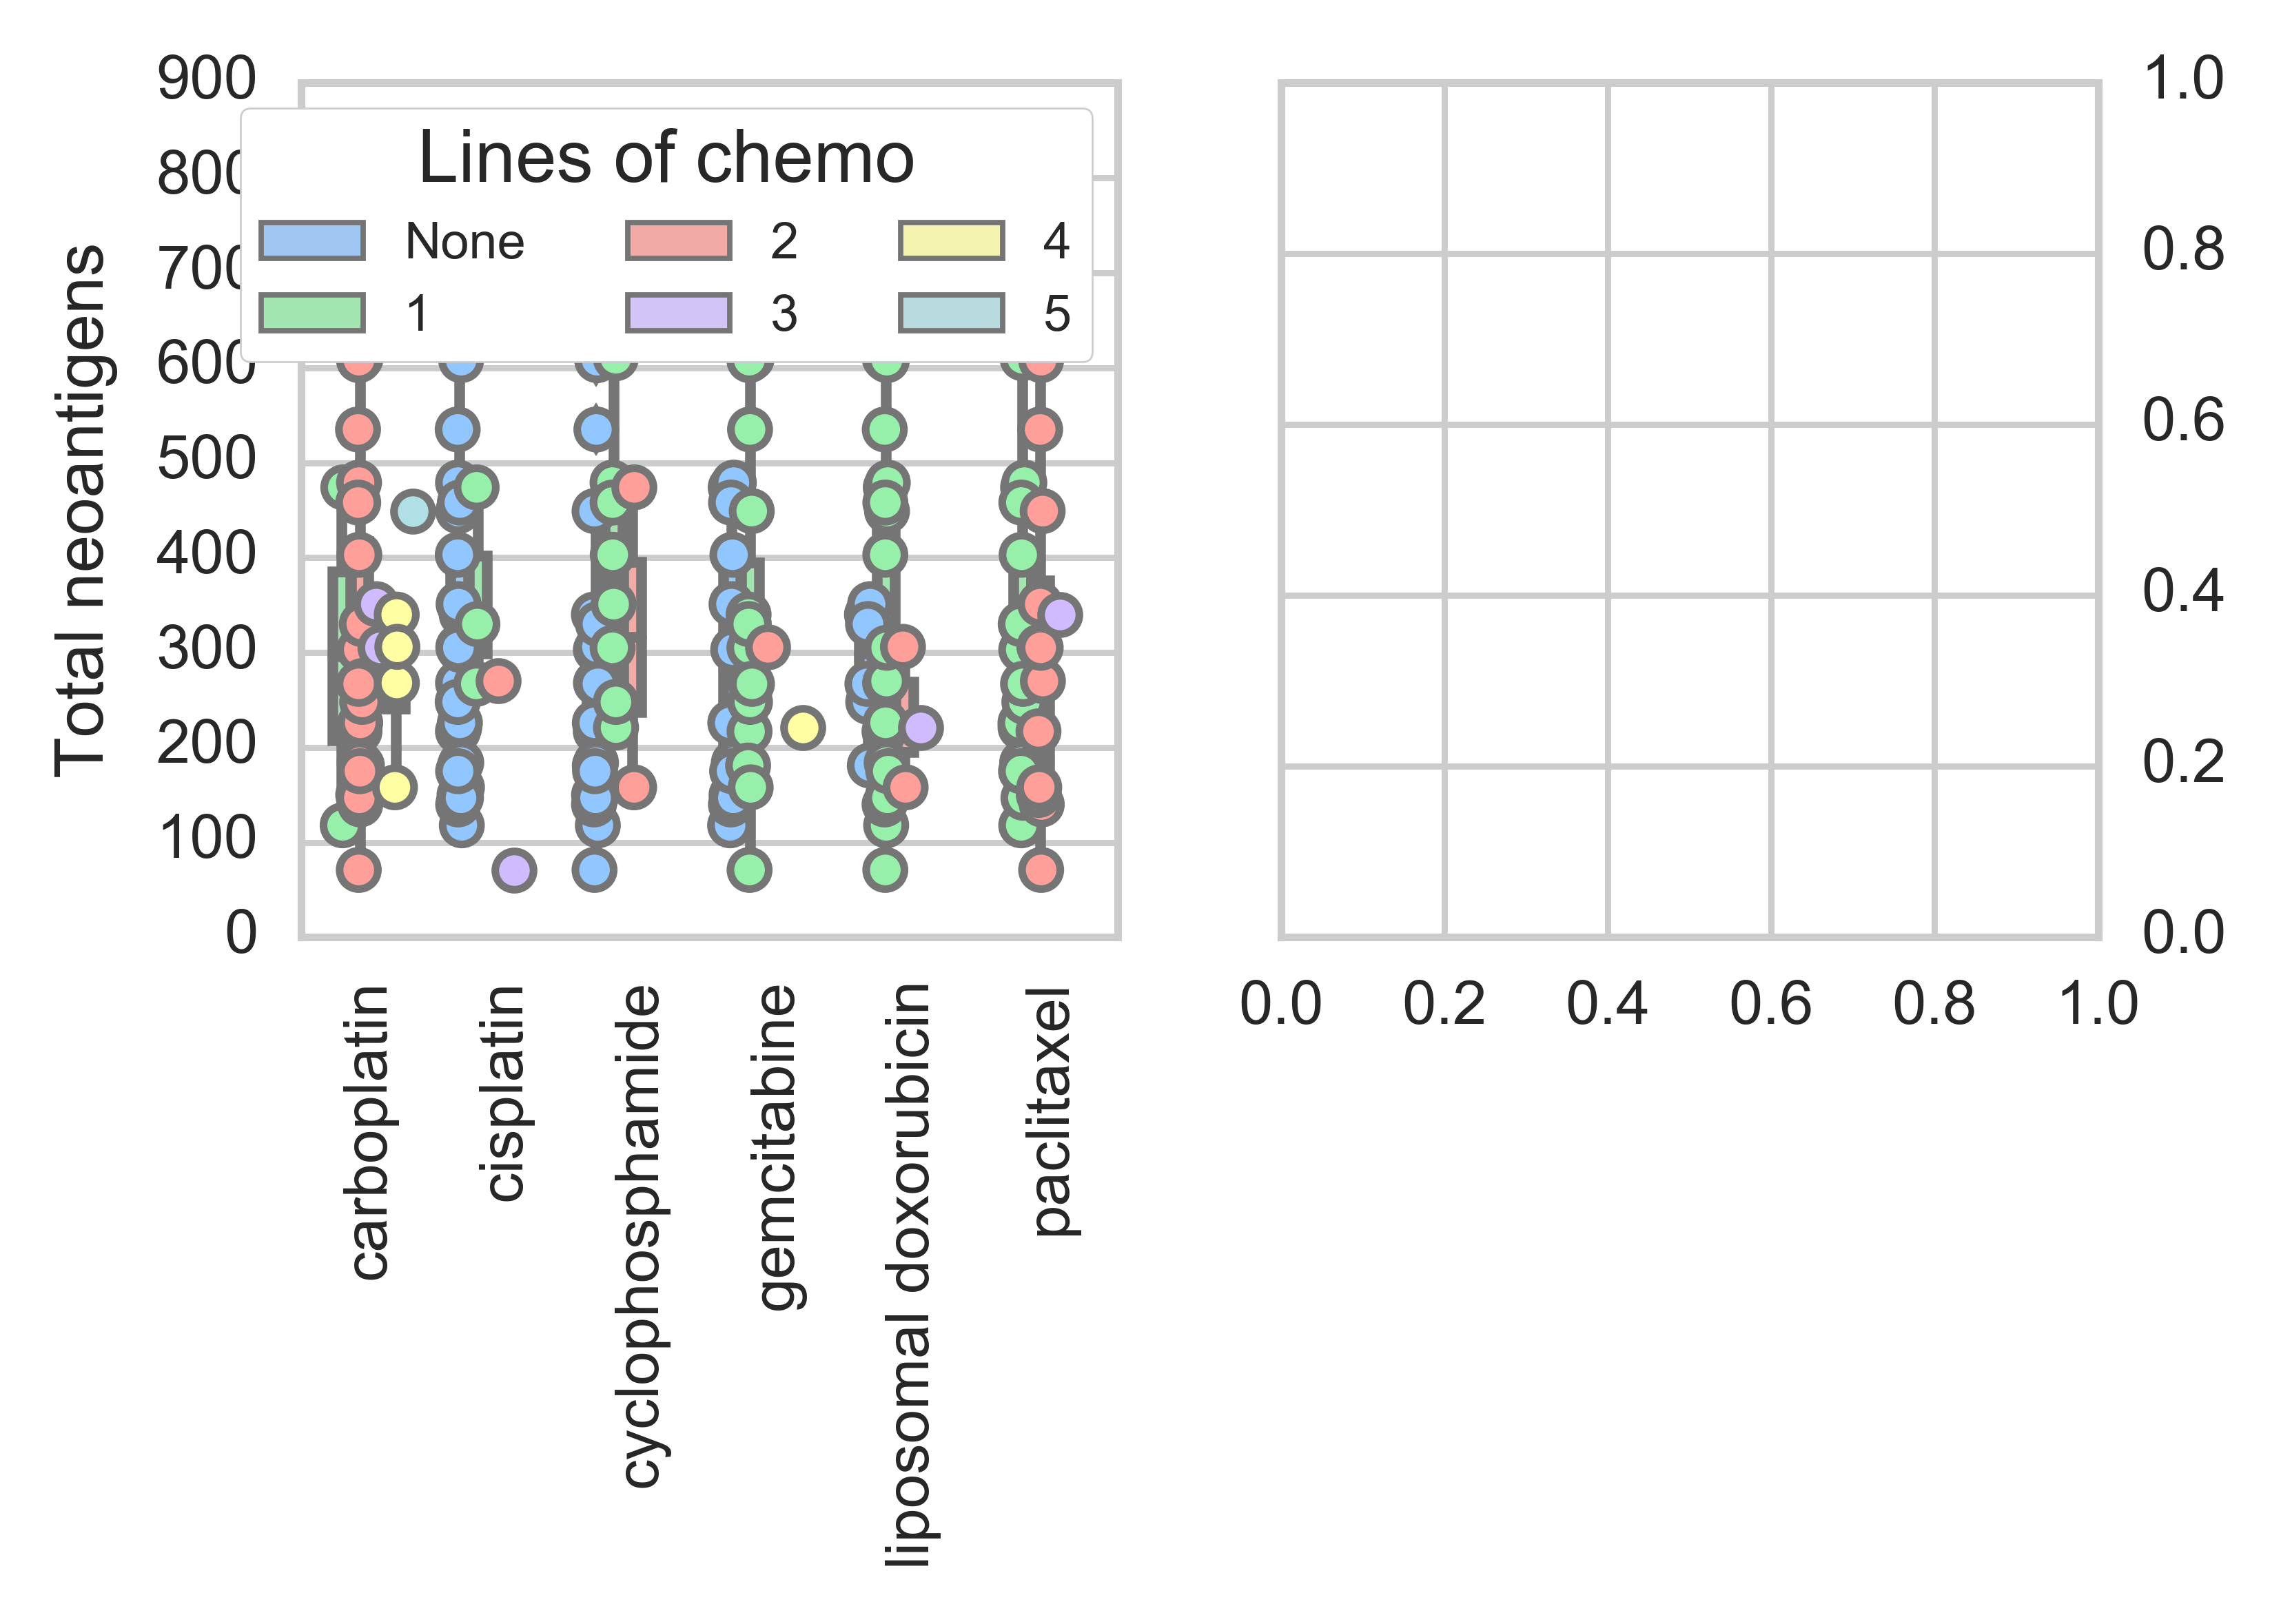

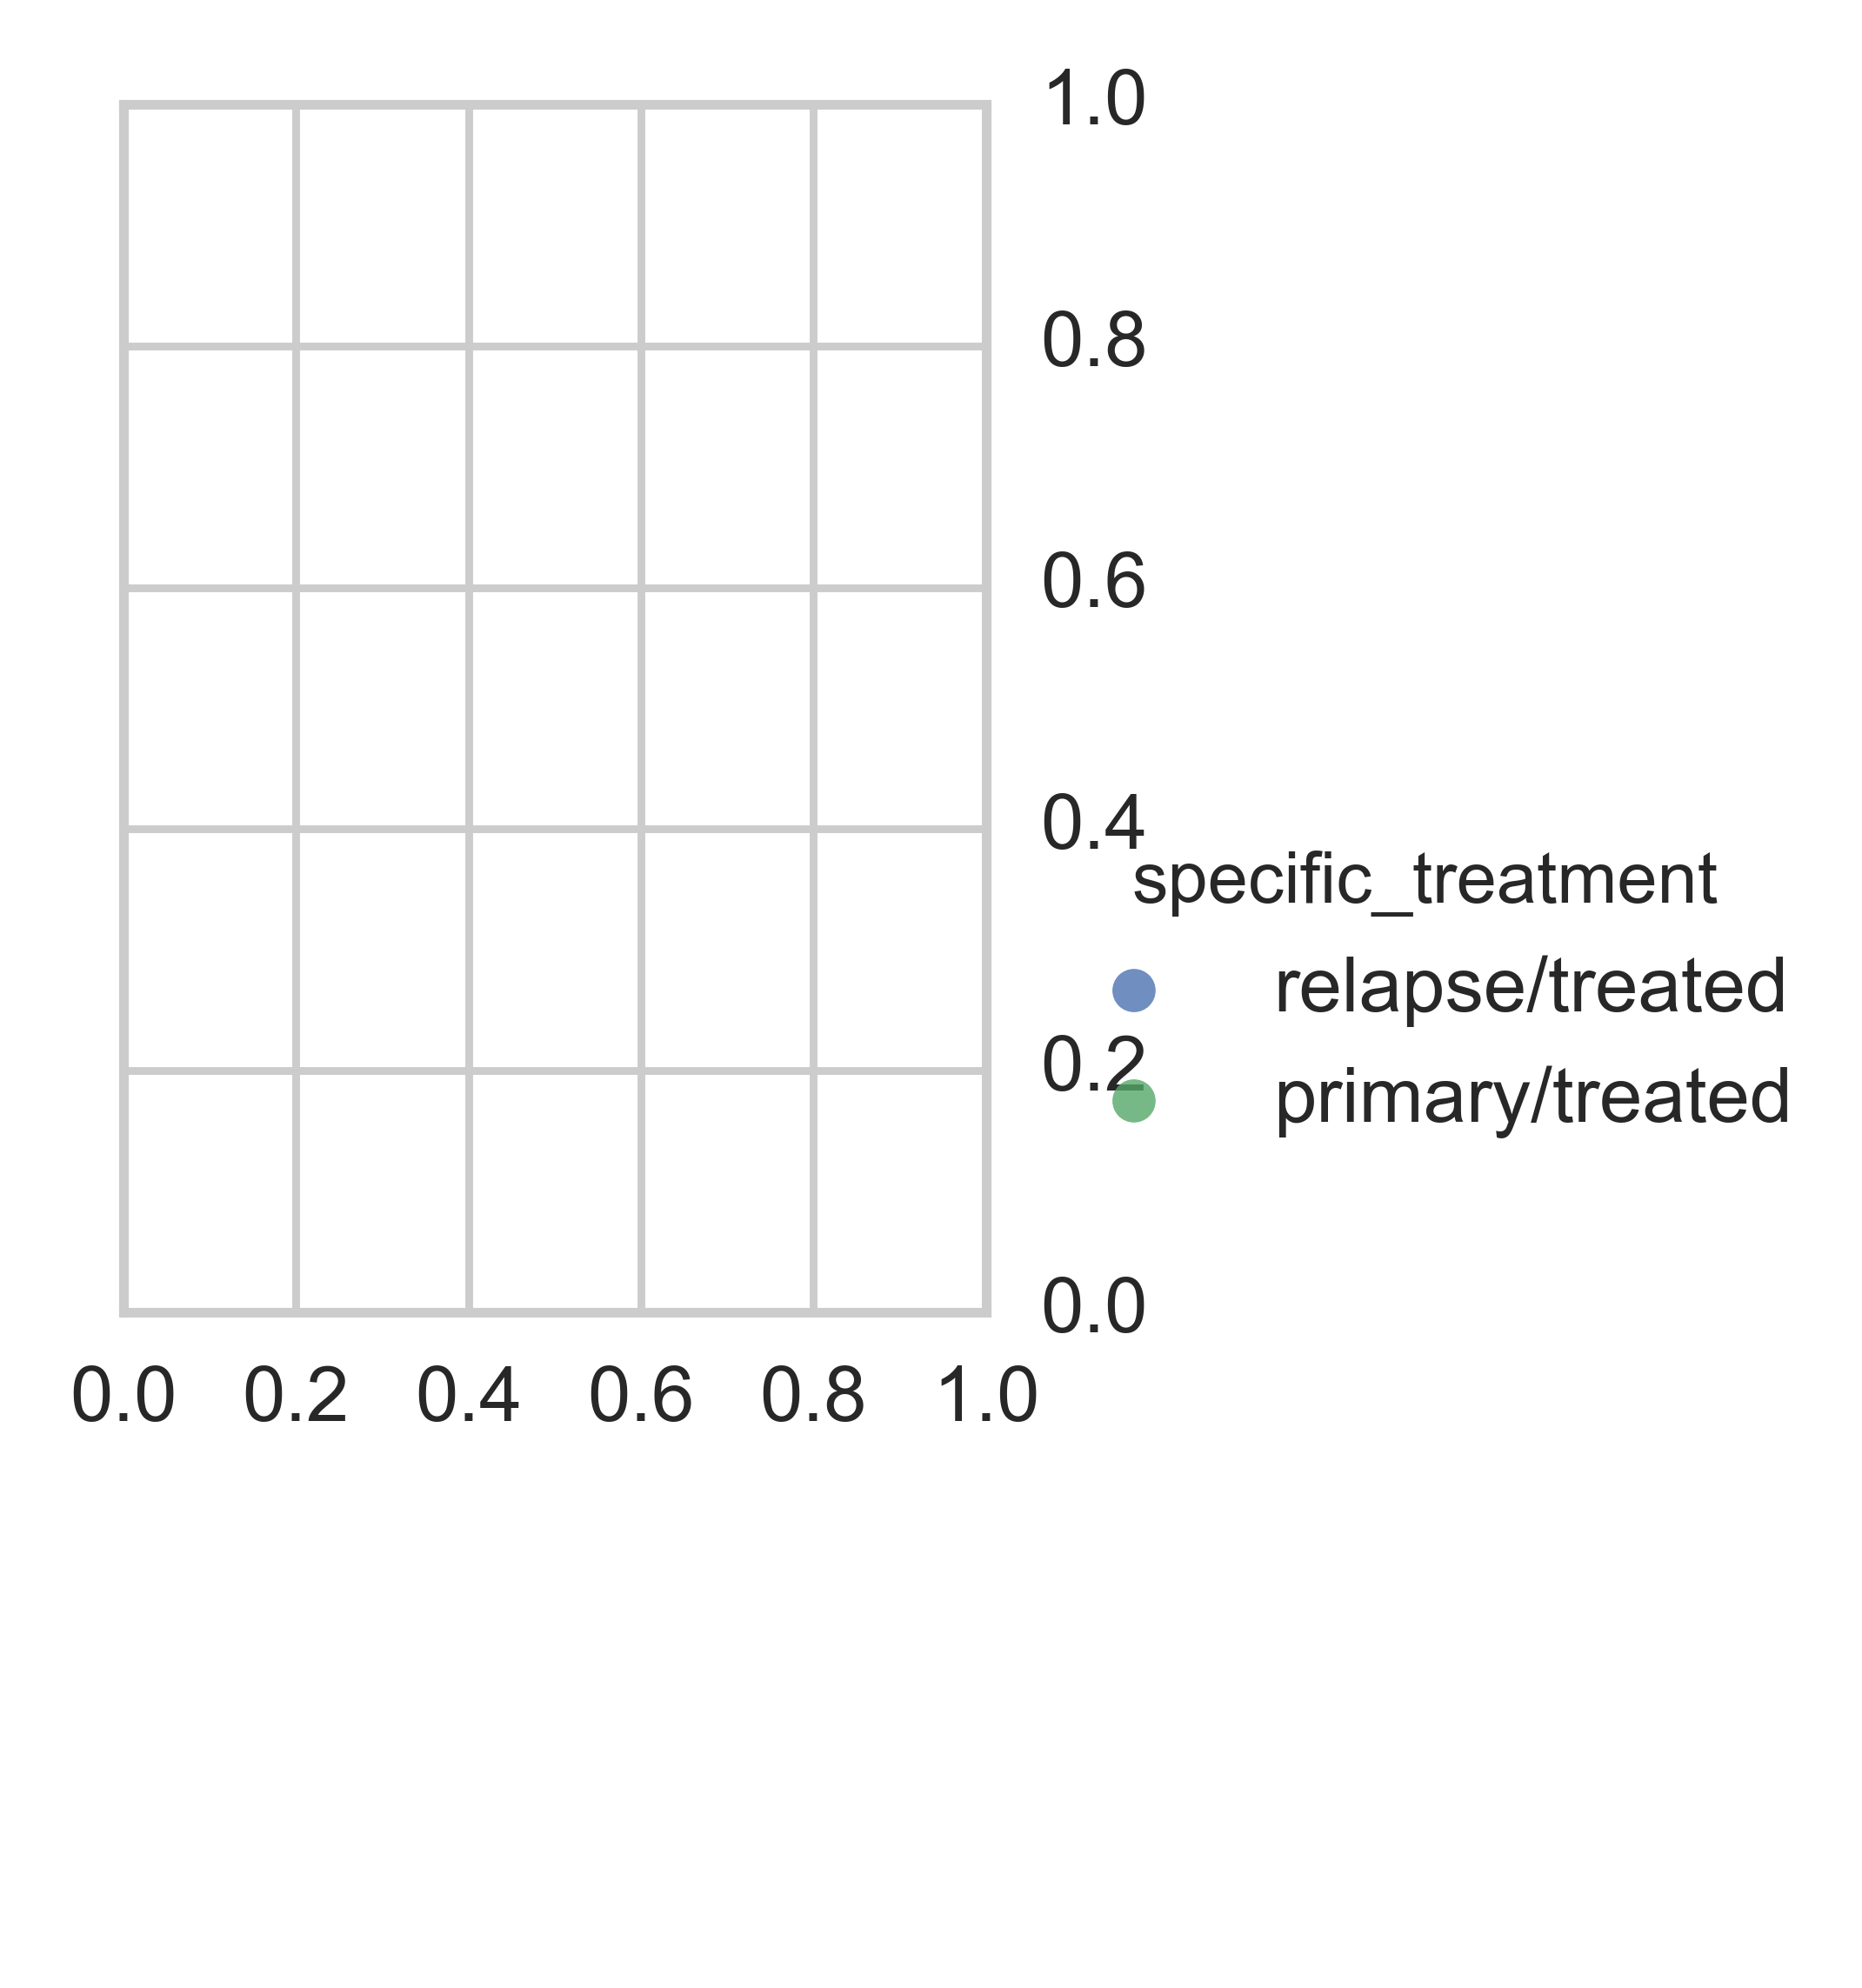

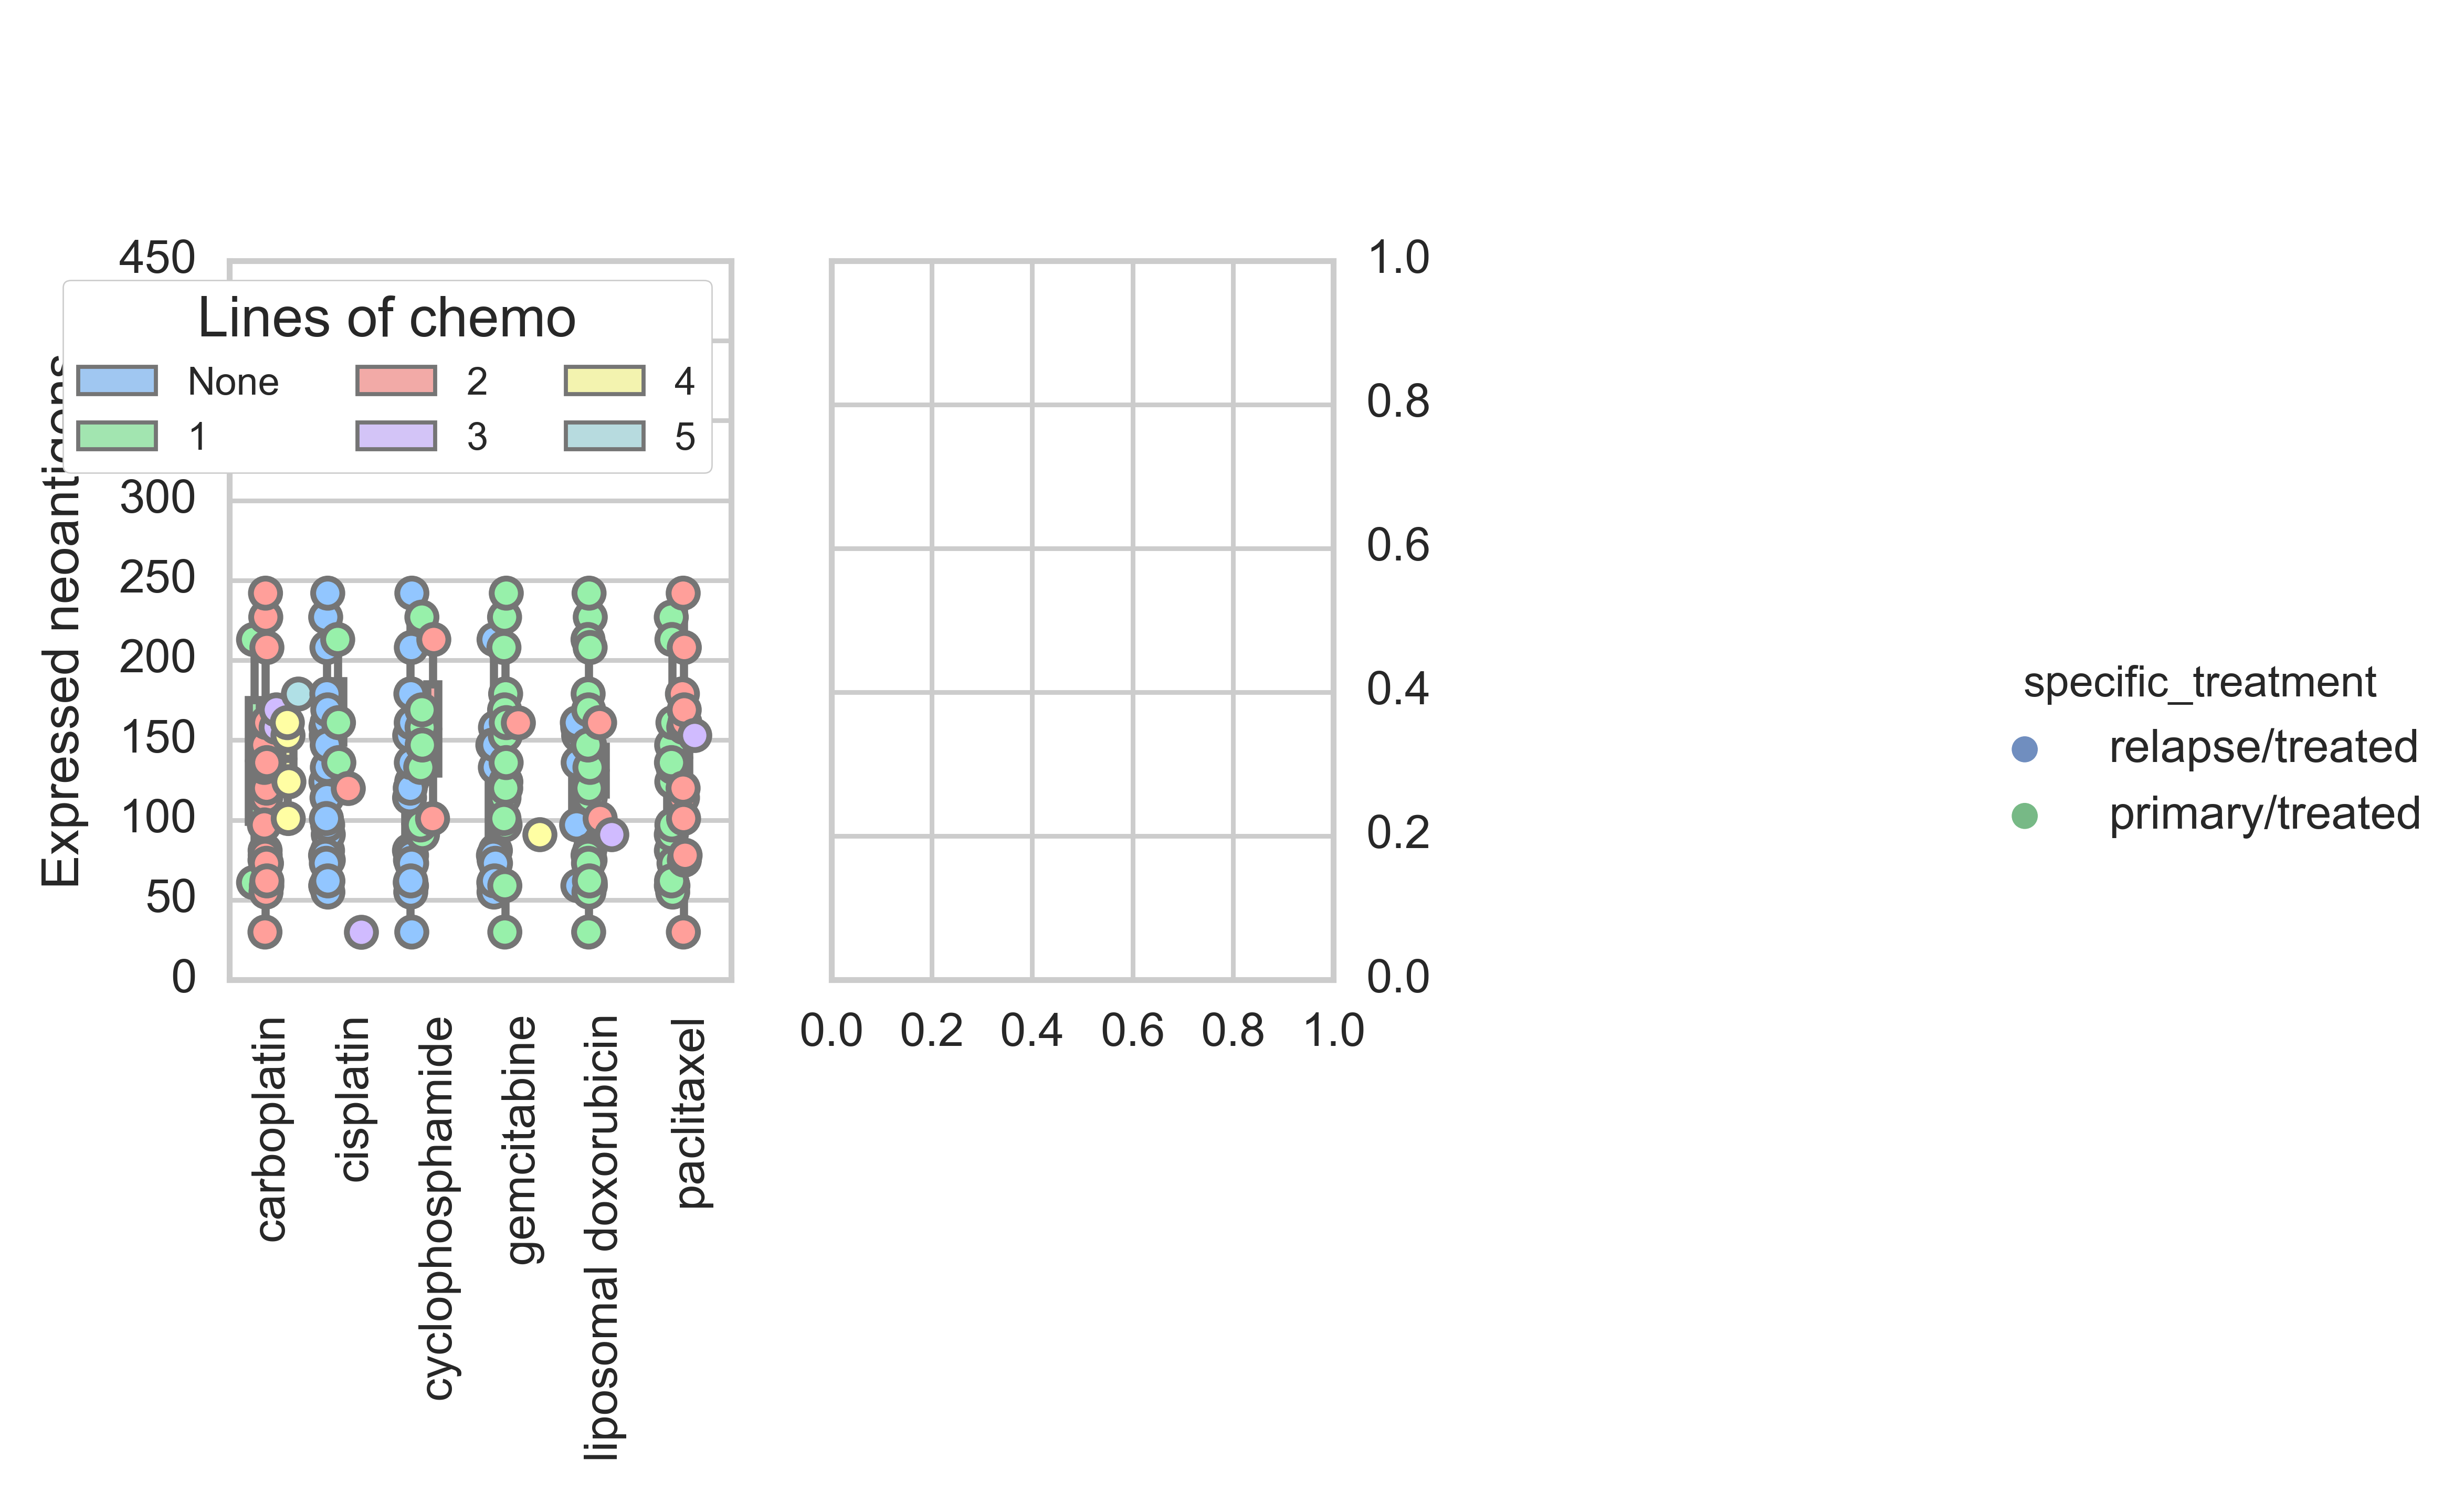

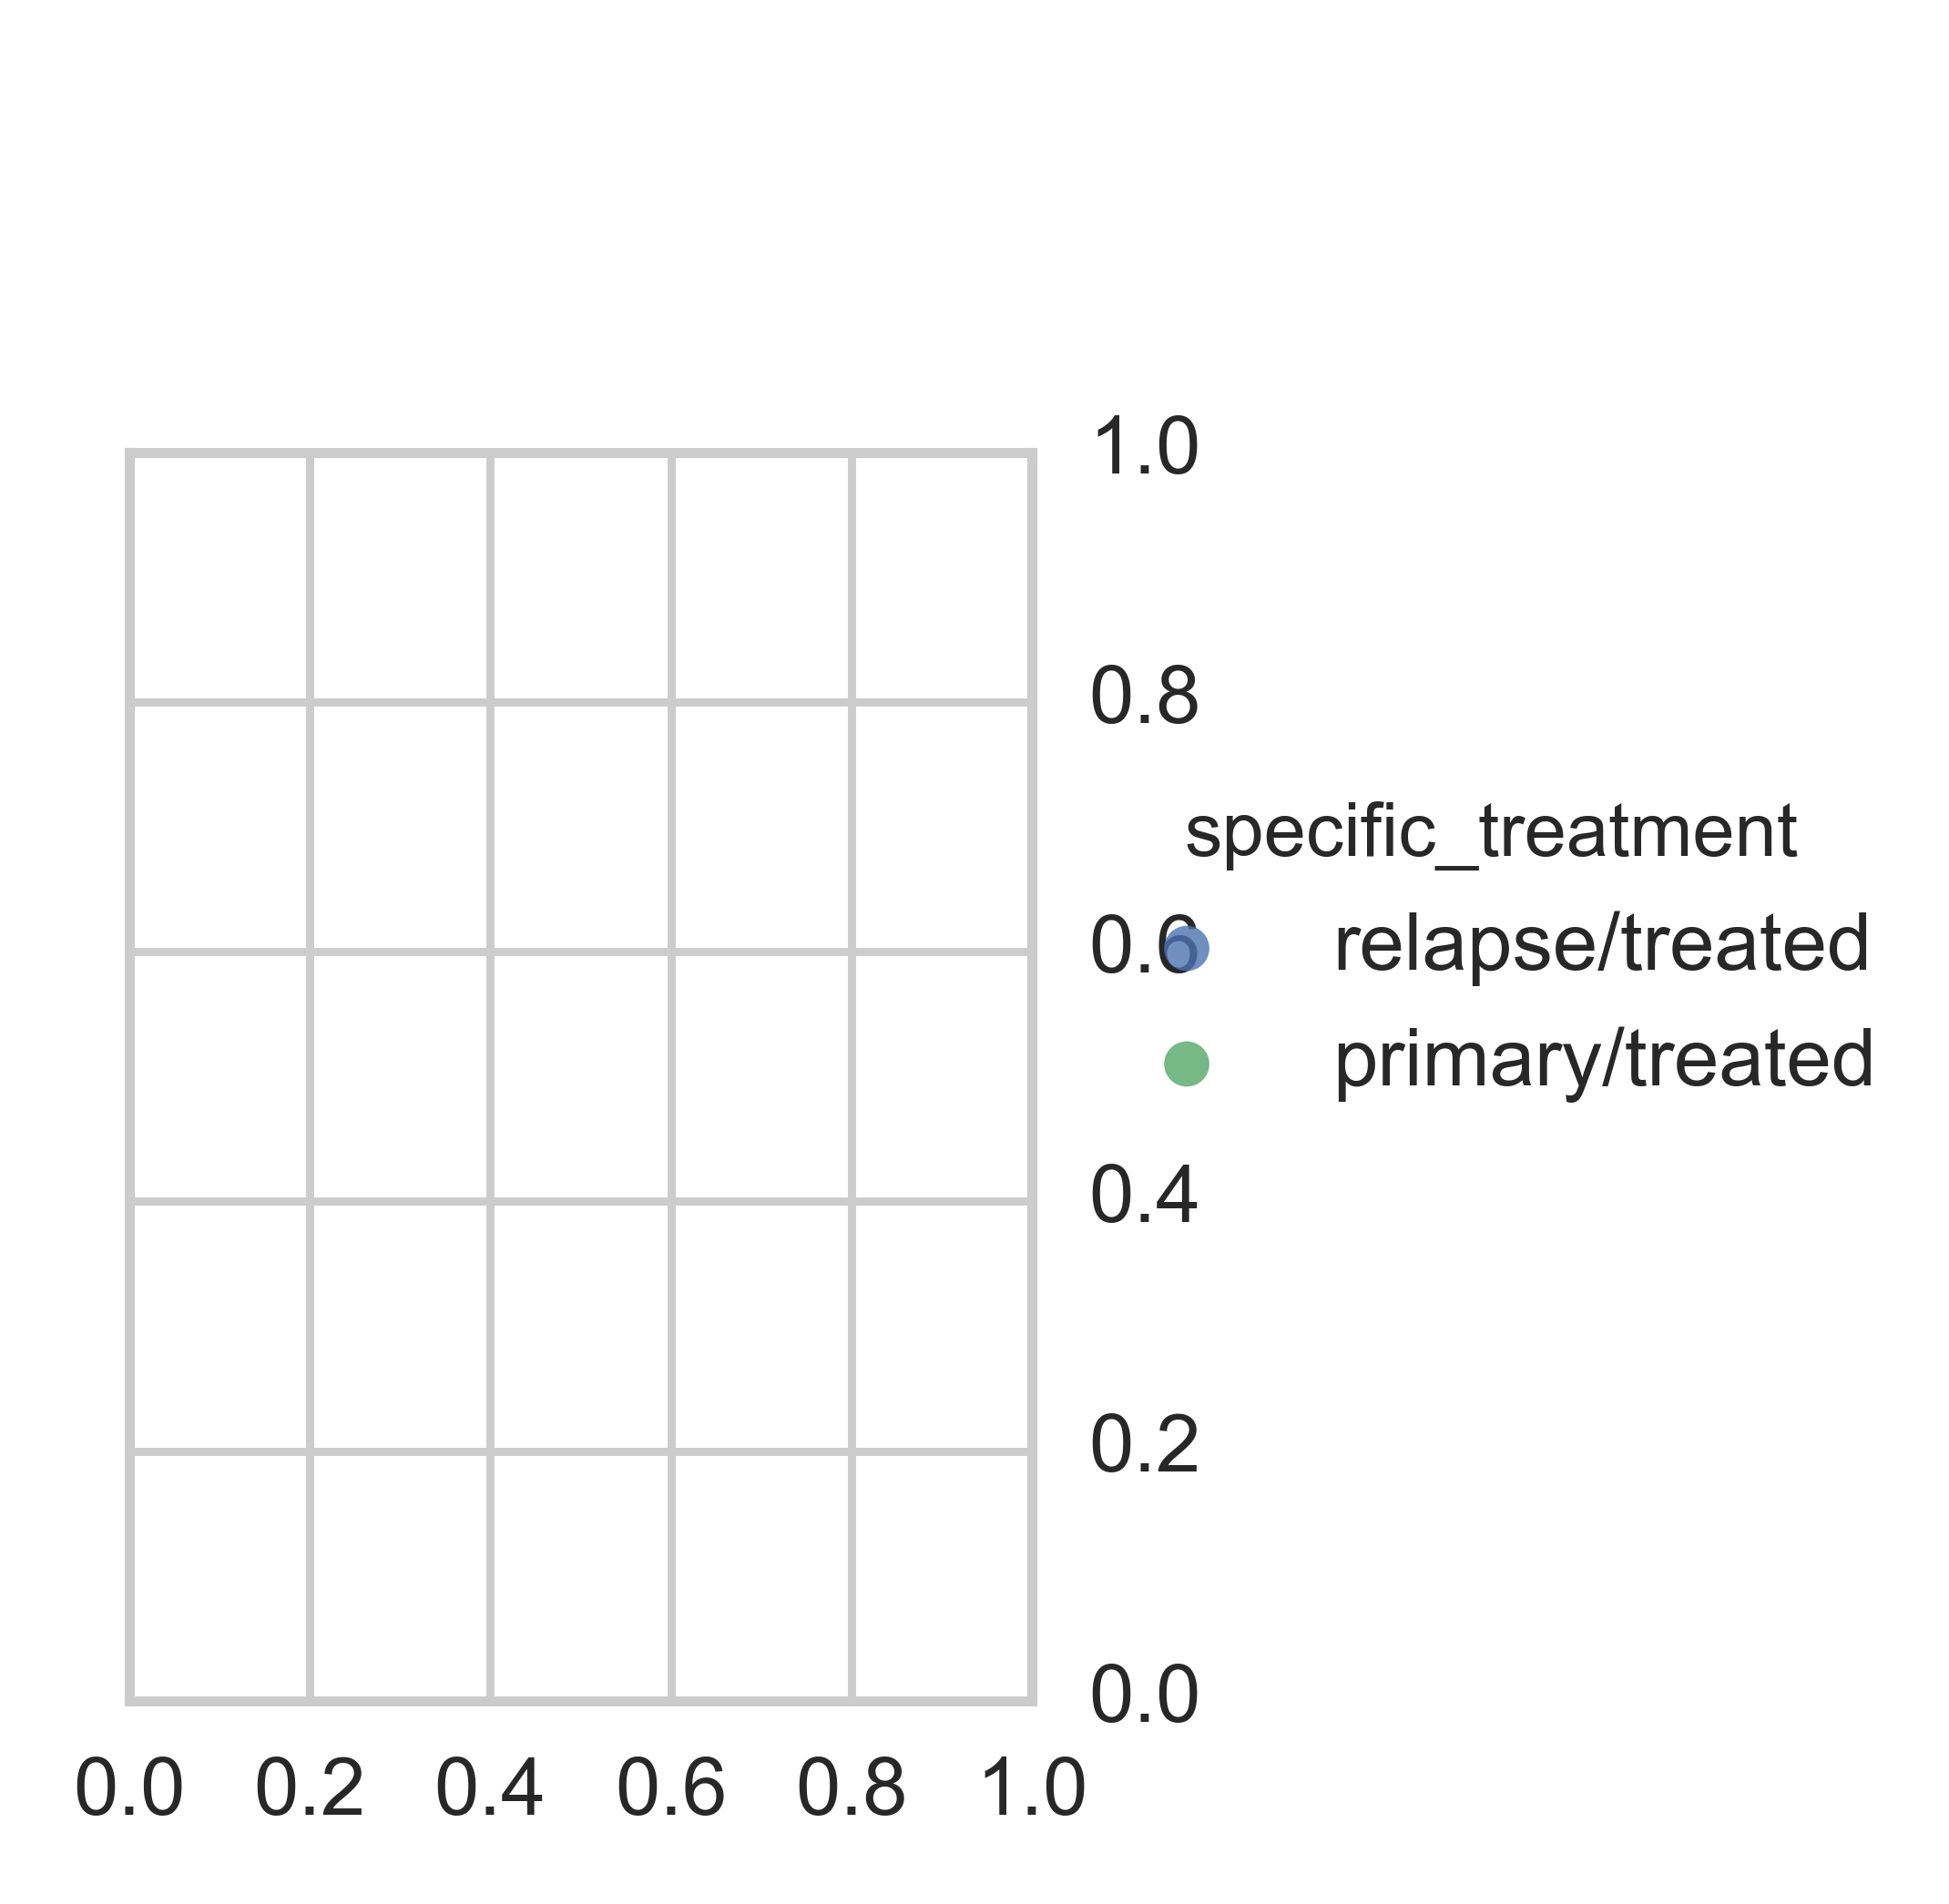

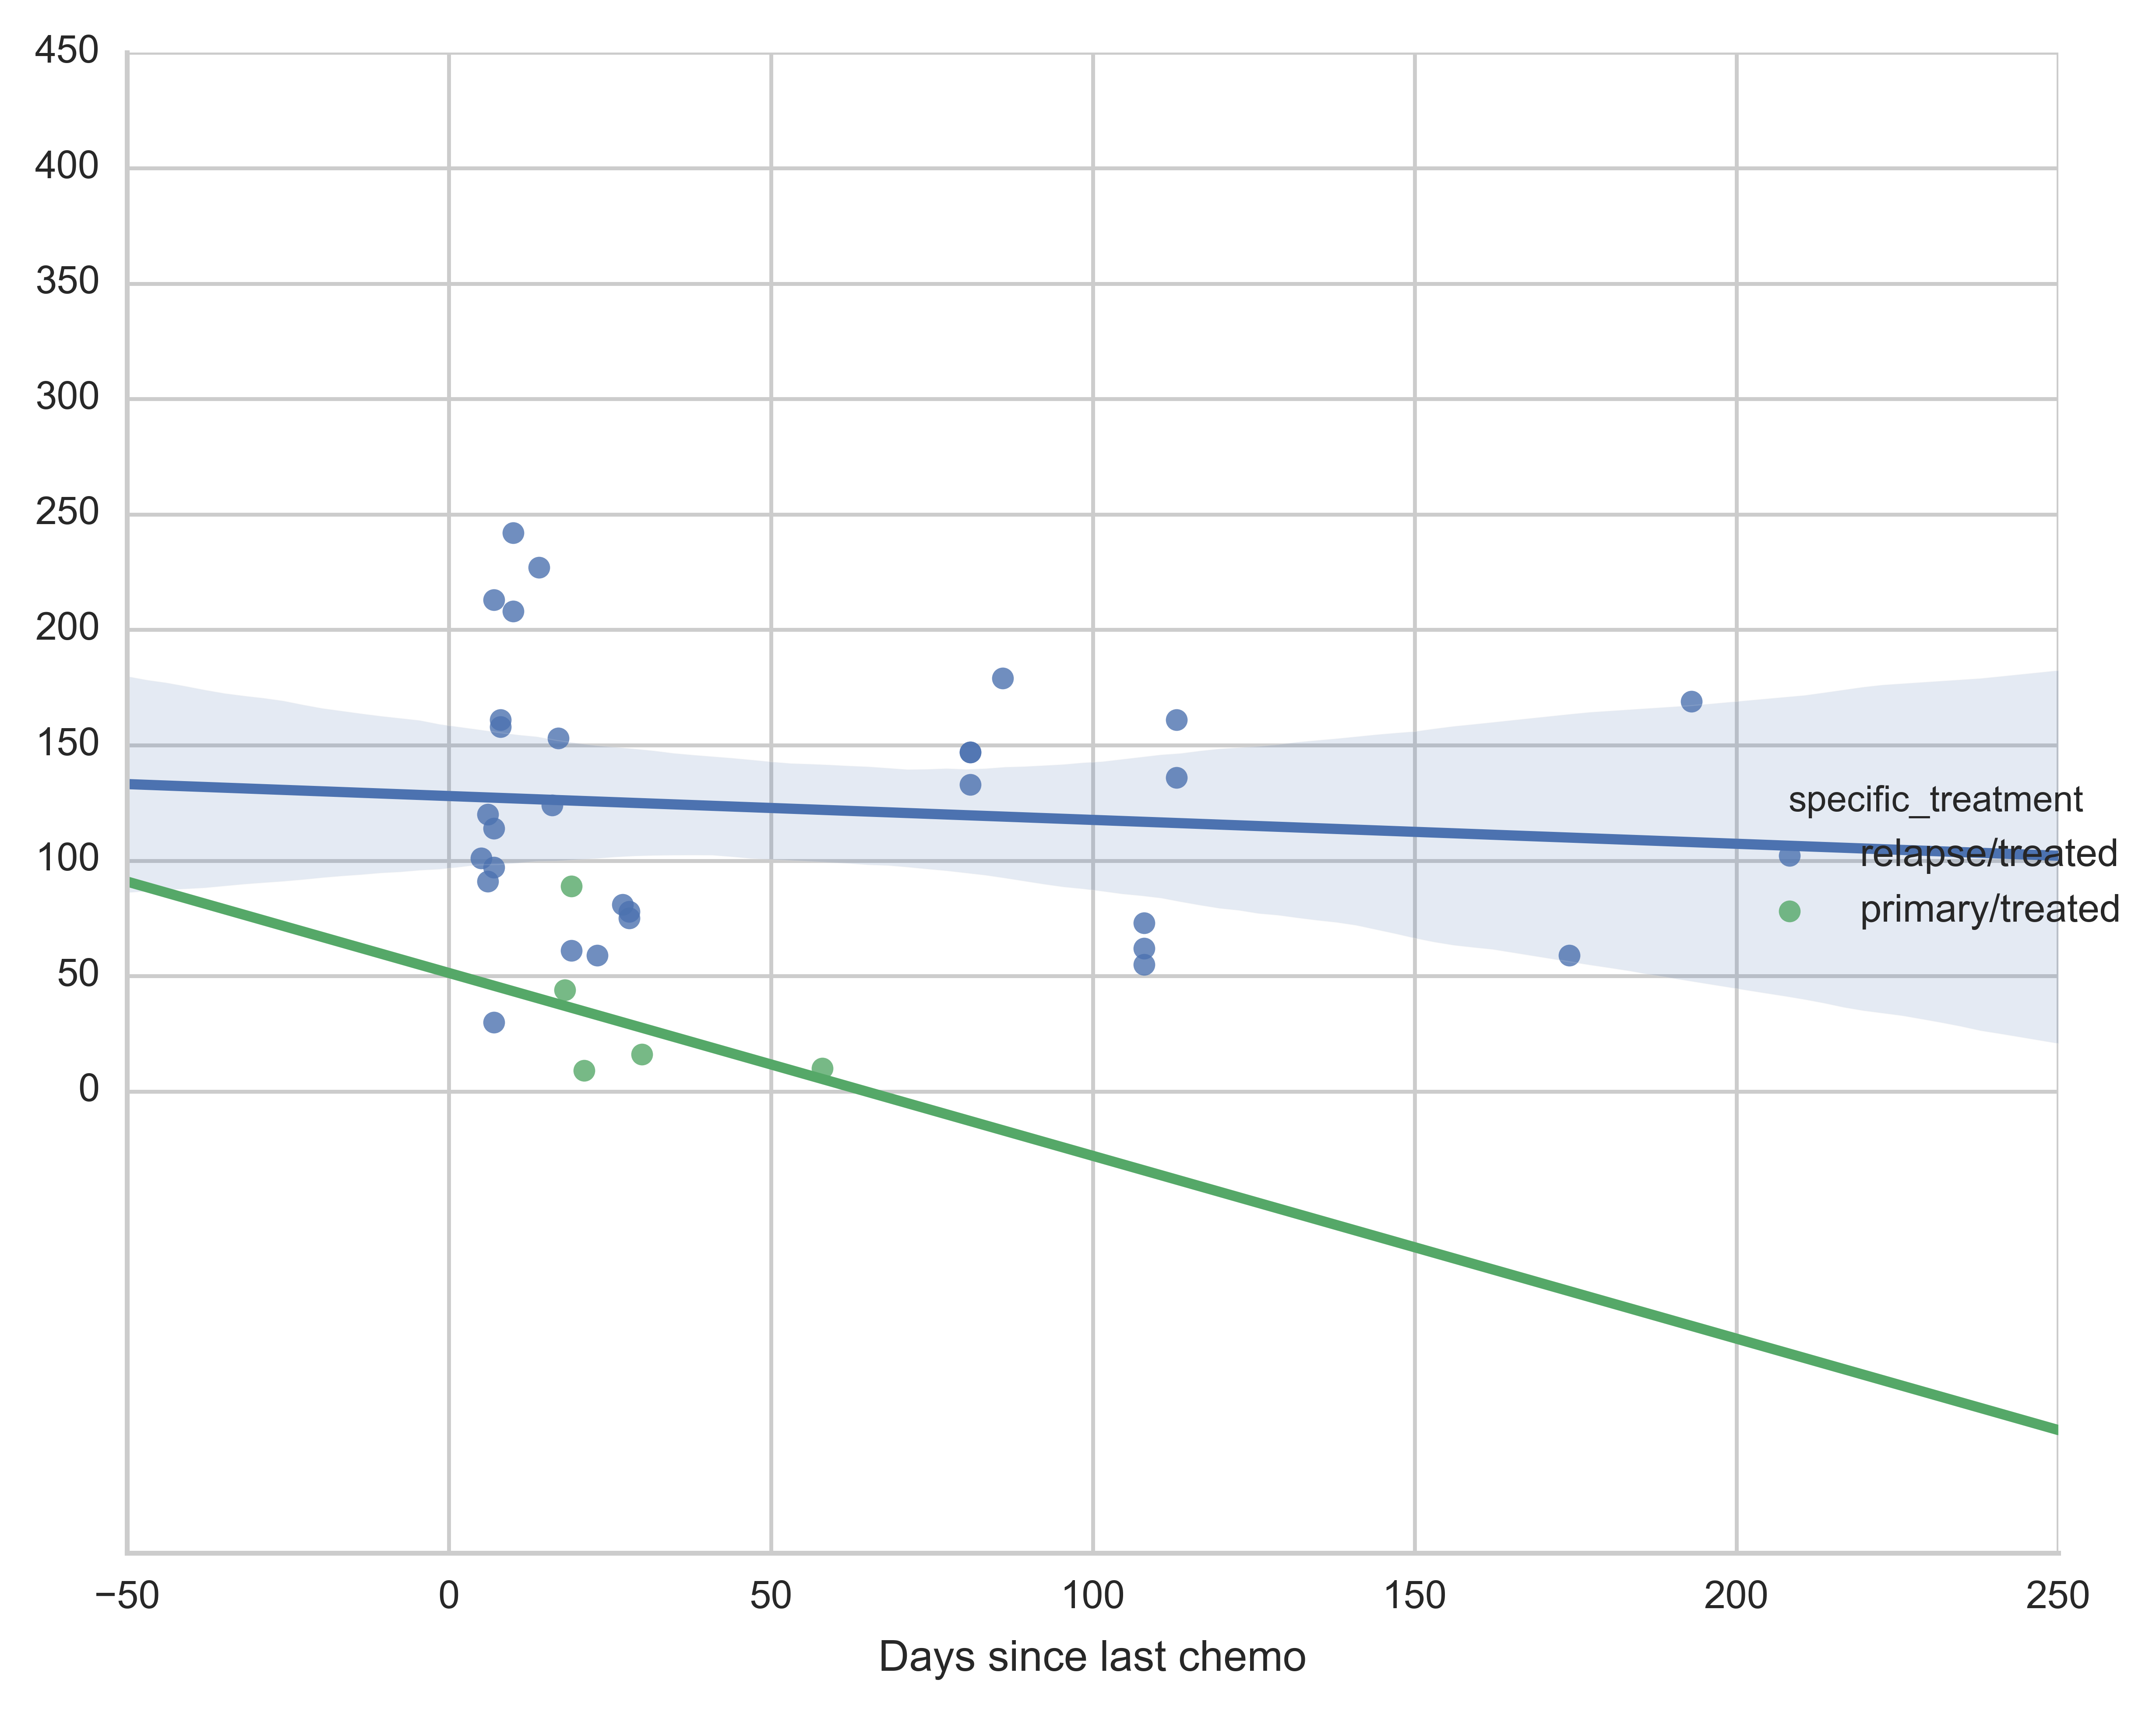

In [402]:

pyplot.figure(figsize=(6.5,5))

for row in range(2):
    if row == 0:
        y_col = "peptides"
        tick_points = range(0, 1000, 100)

    elif row == 1:
        y_col = "expressed peptides"
        tick_points = range(0, 500, 50)

    
    pyplot.subplot(2,3,1 + 3 * row)
    
    new_cohort_df.index = new_cohort_df.source_id

    sub_cohort_df = new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"].copy()
    stacked = sub_cohort_df[[
            x for x in chemo_line_cols if sub_cohort_df[x].nunique() > 1 and x.startswith("Lines")
    ]].fillna(0).stack().to_frame().reset_index()

    stacked.columns = ["source_id", "chemo", "Lines of chemo"]
    stacked["chemo"] = stacked.chemo.str.replace("Lines of ", "")
    stacked["Lines of chemo"] = stacked["Lines of chemo"].map(
        lambda s: {0.0: "None", 0.5: "< 1"}.get(s, maybe_int(s)))
    stacked[y_col] = stacked.source_id.map(new_cohort_df[y_col])
    stacked

    palette = 'pastel'
    seaborn.set_context('paper')
    seaborn.set_style('whitegrid')
    hues = [
        x for x in ["None", "< 1", "1", "2", "3", "4", "5"]
        if x in stacked["Lines of chemo"].unique()
    ]
    seaborn.boxplot(
        data=stacked, x="chemo", y=y_col, hue="Lines of chemo", hue_order=hues, palette=palette, notch=False)
    seaborn.stripplot(
        data=stacked, x="chemo", y=y_col, hue="Lines of chemo", hue_order=hues, palette=palette, split=True, jitter=True, size=5, linewidth=1)
    pyplot.xlabel("")
    pyplot.xticks(rotation=90)

    handles, labels = pyplot.gca().get_legend_handles_labels()
    pyplot.legend(
        handles[:6],
        labels[:6],
        ncol=3,
        loc="upper right",
        title="Lines of chemo",
        frameon=True,
        fancybox=True,
        fontsize="x-small")
    #pyplot.suptitle("relapse/treated samples")
    pyplot.ylabel("Total neoantigens" if row == 0 else "Expressed neoantigens")
    pyplot.yticks(tick_points)

    ax = pyplot.subplot(2,3,2 + 3 * row)
    seaborn.regplot(
        data=new_cohort_df.ix[new_cohort_df.treated], #.ix[
            #(new_cohort_df.specific_treatment == "relapse/treated")
        #],
        #hue="specific_treatment",
        x="total lines",
        y=y_col,
        robust=True,
    )
    ax.yaxis.tick_right()
    pyplot.ylabel("")
    pyplot.xlabel("Total lines\n(all chemotherapies)")
    pyplot.yticks(tick_points, [""] * len(tick_points))


    ax = pyplot.subplot(2,3,3 + 3 * row)
    seaborn.regplot(
        data=new_cohort_df.ix[new_cohort_df.treated],
        #.ix[new_cohort_df.treated & (new_cohort_df.specific_treatment == "relapse/treated")],
        x="days since last chemo",
        #hue="specific_treatment",
        y=y_col,
        robust=True,
    )
    pyplot.yticks(tick_points)
    pyplot.xlabel("Days since last chemo")
    ax.yaxis.tick_right()
    pyplot.ylabel("")

pyplot.tight_layout()
#pyplot.savefig("../figures/chemo_lines.pdf")

In [140]:
#[x for x in new_cohort_df.columns if 'neoantigens' in x.lower()]

chemo_signatures = [
    "Cisplatin Gallus gallus",
    "Cyclophosphamide Gallus gallus",
    "Etoposide Gallus gallus",
    "Cisplatin C Elegans"
]
quantities = ["mutations", "neoantigens", "expressed neoantigens"]

for quantity in quantities:
    new_cohort_df["chemo %s" % quantity] = new_cohort_df[
        ["%s %s" % (chemo, quantity) for chemo in chemo_signatures]
    ].sum(1)
new_cohort_df

source_id                 RNA_id   RNA biospecimen  \
source_id                                                               
AOCS-001-1-7    AOCS-001-1-7    ICGCDBDE20130916001      AOCS-001-2-0   
AOCS-004-1-5    AOCS-004-1-5    ICGCDBDE20130916003      AOCS-004-2-9   
AOCS-005-1-8    AOCS-005-1-8    ICGCDBDE20130916004      AOCS-005-2-1   
AOCS-034-1-0    AOCS-034-1-0   ICGCDBLG2010050402TR      AOCS-034-2-4   
AOCS-034-3-8    AOCS-034-3-8    ICGCDBDE20131122024      AOCS-034-4-1   
AOCS-055-1-7    AOCS-055-1-7    ICGCDBDE20130916005      AOCS-055-2-0   
AOCS-056-1-X    AOCS-056-1-X   ICGCDBLG2010062229TR      AOCS-056-2-3   
AOCS-057-1-2    AOCS-057-1-2  EXTERNAOCS20140414001      AOCS-057-2-6   
AOCS-058-1-5    AOCS-058-1-5   ICGCDBLG2010062235TR      AOCS-058-2-9   
AOCS-059-1-8    AOCS-059-1-8    ICGCDBDE20130916006      AOCS-059-2-1   
AOCS-060-1-5    AOCS-060-1-5    ICGCDBDE20130916007      AOCS-060-2-9   
AOCS-061-1-8    AOCS-061-1-8    ICGCDBDE20130916008      AOCS-061-2-1   
AOCS-063-1-3    AOCS-063-1-3    ICGCDBDE20130916009      AOCS-063-2-7   
AOCS-064-1-6    AOCS-064-1-6   ICGCDBLG2010062214TR      AOCS-064-2-X   
AOCS-064-3-3    AOCS-064-3-3   ICGCDBLG2010062215FR      AOCS-064-4-7   
AOCS-065-1-9    AOCS-065-1-9   ICGCDBLG2010062219TR      AOCS-065-2-2   
AOCS-065-3-6    AOCS-065-3-6   ICGCDBLG2010062220FR      AOCS-065-4-X   
AOCS-075-1-0    AOCS-075-1-0    ICGCDBDE20130916010      AOCS-075-2-4   
AOCS-076-1-3    AOCS-076-1-3    ICGCDBDE20130916011      AOCS-076-2-7   
AOCS-077-1-6    AOCS-077-1-6    ICGCDBDE20130916012      AOCS-077-2-X   
AOCS-078-1-9    AOCS-078-1-9    ICGCDBDE20130916013      AOCS-078-2-2   
AOCS-079-1-1    AOCS-079-1-1    ICGCDBDE20130916014      AOCS-079-2-5   
AOCS-080-1-9    AOCS-080-1-9   ICGCDBLG2010102737TR      AOCS-080-2-2   
AOCS-081-1-1    AOCS-081-1-1    ICGCDBDE20130916015      AOCS-081-2-5   
AOCS-083-1-7    AOCS-083-1-7    ICGCDBDE20130916016      AOCS-083-2-0   
...                      ...                    ...               ...   
AOCS-149-1-7    AOCS-149-1-7    ICGCDBDE20131122009      AOCS-149-2-0   
AOCS-150-3-1    AOCS-150-3-1    ICGCDBDE20130916040      AOCS-150-4-5   
AOCS-150-8-X    AOCS-150-8-X  EXTERNAOCS20140414004     AOCS-150-10-7   
AOCS-152-1-X    AOCS-152-1-X    ICGCDBDE20131122022      AOCS-152-2-3   
AOCS-153-1-2    AOCS-153-1-2    ICGCDBDE20131122023      AOCS-153-2-6   
AOCS-155-3-5    AOCS-155-3-5    ICGCDBDE20131122043      AOCS-155-4-9   
AOCS-157-1-3    AOCS-157-1-3  EXTERNAOCS20140414005      AOCS-157-2-7   
AOCS-158-1-6    AOCS-158-1-6  EXTERNAOCS20140414006      AOCS-158-2-X   
AOCS-159-1-9    AOCS-159-1-9  EXTERNAOCS20140227002      AOCS-159-2-2   
AOCS-160-1-6    AOCS-160-1-6  EXTERNAOCS20140414007      AOCS-160-2-X   
AOCS-161-1-9    AOCS-161-1-9  EXTERNAOCS20140227003      AOCS-161-2-2   
AOCS-162-1-1    AOCS-162-1-1  EXTERNAOCS20140227004      AOCS-162-2-5   
AOCS-163-1-4    AOCS-163-1-4  EXTERNAOCS20140227005      AOCS-163-2-8   
AOCS-164-1-7    AOCS-164-1-7  EXTERNAOCS20140227006      AOCS-164-2-0   
AOCS-165-1-X    AOCS-165-1-X  EXTERNAOCS20140227007      AOCS-165-2-3   
AOCS-166-1-2    AOCS-166-1-2  EXTERNAOCS20140227008      AOCS-166-2-6   
AOCS-167-13-9  AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
AOCS-167-16-X  AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   
AOCS-167-3-2    AOCS-167-3-2  EXTERNAOCS20140227013      AOCS-167-4-6   
AOCS-168-1-8    AOCS-168-1-8  EXTERNAOCS20140414008      AOCS-168-2-1   
AOCS-169-1-0    AOCS-169-1-0  EXTERNAOCS20140414009      AOCS-169-2-4   
AOCS-170-1-8    AOCS-170-1-8  EXTERNAOCS20140227017      AOCS-170-2-1   
AOCS-170-3-5    AOCS-170-3-5  EXTERNAOCS20140227018      AOCS-170-4-9   
AOCS-171-1-0    AOCS-171-1-0  EXTERNAOCS20140227014      AOCS-171-2-4   
AOCS-171-3-8    AOCS-171-3-8  EXTERNAOCS20140227015      AOCS-171-4-1   

                                        DNA_id DNA_biospecimen  \
source_id                                                        
AOCS-001-1-7   AO

In [19]:
new_cohort_df["other snv neoantigens"]

source_id
AOCS-001-1-7     0.270605
AOCS-004-1-5     0.362958
AOCS-005-1-8     0.456709
AOCS-034-1-0     0.223347
AOCS-034-3-8     0.434420
AOCS-055-1-7     0.512771
AOCS-056-1-X     0.066452
AOCS-057-1-2     0.326946
AOCS-058-1-5     0.149196
AOCS-059-1-8     0.286037
AOCS-060-1-5     0.295718
AOCS-061-1-8     0.285530
AOCS-063-1-3     0.179994
AOCS-064-1-6     0.155106
AOCS-064-3-3     0.179736
AOCS-065-1-9     0.180851
AOCS-065-3-6     0.184298
AOCS-075-1-0     0.258542
AOCS-076-1-3     0.330936
AOCS-077-1-6     0.181045
AOCS-078-1-9     0.208711
AOCS-079-1-1     0.274064
AOCS-080-1-9     0.264291
AOCS-081-1-1     0.171108
AOCS-083-1-7     0.267424
                   ...   
AOCS-149-1-7     0.219585
AOCS-150-3-1     0.286966
AOCS-150-8-X     0.208797
AOCS-152-1-X     0.206641
AOCS-153-1-2     0.187541
AOCS-155-3-5     0.227315
AOCS-157-1-3     0.111395
AOCS-158-1-6     0.129377
AOCS-159-1-9     0.226061
AOCS-160-1-6     0.163068
AOCS-161-1-9     0.322990
AOCS-162-1-1     0.370030
AO

In [203]:
sub_cohort_df = new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"].copy()

stacked = sub_cohort_df[[
        x for x in chemo_line_cols if sub_cohort_df[x].nunique() > 1 and x.startswith("Lines of")
]].fillna(0).stack().to_frame().reset_index()

stacked.columns = ["source_id", "chemo", "lines"]
stacked["chemo"] = stacked.chemo.str.replace("Lines of ", "")
stacked["lines"] = stacked["lines"].map(
    lambda s: {0.0: "None", 0.5: "< 1"}.get(s, maybe_int(s)))
stacked["cycles"] = [
    new_cohort_df.ix[row.source_id, "Cycles of %s" % row.chemo]
    for _, row in stacked.iterrows()
]
stacked["chemo expressed peptides rate"] = [
    new_cohort_df.ix[row.source_id, "chemo expressed neoantigens"]
    for _, row in stacked.iterrows()
]
stacked["chemo peptides rate"] = [
    new_cohort_df.ix[row.source_id, "chemo neoantigens"]
    for _, row in stacked.iterrows()
]
stacked["chemo mutations rate"] = [
    new_cohort_df.ix[row.source_id, "chemo mutations"]
    for _, row in stacked.iterrows()
]
stacked["mutations"] = [
    new_cohort_df.ix[row.source_id, "mutations"]
    for _, row in stacked.iterrows()
]

stacked["expressed peptides"] = [
    new_cohort_df.ix[row.source_id, "expressed peptides"]
    for _, row in stacked.iterrows()
]
stacked["peptides"] = [
    new_cohort_df.ix[row.source_id, "peptides"]
    for _, row in stacked.iterrows()
]

stacked["mutations"] = [
    new_cohort_df.ix[row.source_id, "mutations"]
    for _, row in stacked.iterrows()
]

stacked["chemo expressed peptides"] = stacked["chemo expressed peptides rate"] * stacked["expressed peptides"]
stacked["chemo peptides"] = stacked["chemo peptides rate"] * stacked["peptides"]
stacked["chemo mutations"] = stacked["chemo mutations rate"] * stacked["mutations"]


for y_col in ["mutations_per_mb", "peptides", "expressed peptides", "tissue_type"]:
    stacked[y_col] = stacked.source_id.map(new_cohort_df[y_col])

stacked["chemo mutations per mb"] = stacked["chemo mutations"] / library_sizes["WGS"]

stacked["lines"] = stacked.lines.replace("None", "0").astype(int)

stacked

source_id                  chemo  lines  cycles  \
0     AOCS-034-3-8            carboplatin      4    23.0   
1     AOCS-034-3-8              cisplatin      0     NaN   
2     AOCS-034-3-8       cyclophosphamide      0     NaN   
3     AOCS-034-3-8            gemcitabine      1     8.0   
4     AOCS-034-3-8  liposomal doxorubicin      1     3.0   
5     AOCS-034-3-8             paclitaxel      1     6.0   
6     AOCS-034-3-8               platinum      4    23.0   
7     AOCS-064-3-3            carboplatin      2    10.0   
8     AOCS-064-3-3              cisplatin      0     NaN   
9     AOCS-064-3-3       cyclophosphamide      1     3.0   
10    AOCS-064-3-3            gemcitabine      1     2.0   
11    AOCS-064-3-3  liposomal doxorubicin      1     3.0   
12    AOCS-064-3-3             paclitaxel      1     6.0   
13    AOCS-064-3-3               platinum      2    10.0   
14    AOCS-065-3-6            carboplatin      1     6.0   
15    AOCS-065-3-6              cisplatin      0     NaN   
16    AOCS-065-3-6       cyclophosphamide      0     NaN   
17    AOCS-065-3-6            gemcitabine      0     NaN   
18    AOCS-065-3-6  liposomal doxorubicin      1     6.0   
19    AOCS-065-3-6             paclitaxel      1     3.0   
20    AOCS-065-3-6               platinum      1     6.0   
21    AOCS-086-3-2            carboplatin      5    40.0   
22    AOCS-086-3-2              cisplatin      0     NaN   
23    AOCS-086-3-2       cyclophosphamide      0     NaN   
24    AOCS-086-3-2            gemcitabine      1     4.0   
..             ...                    ...    ...     ...   
185   AOCS-155-3-5            gemcitabine      1    11.0   
186   AOCS-155-3-5  liposomal doxorubicin      2     4.0   
187   AOCS-155-3-5             paclitaxel      2    14.0   
188   AOCS-155-3-5               platinum      4    24.0   
189  AOCS-167-13-9            carboplatin      2    11.0   
190  AOCS-167-13-9              cisplatin      0     NaN   
191  AOCS-167-13-9       cyclophosphamide      0     NaN   
192  AOCS-167-13-9            gemcitabine      0     NaN   
193  AOCS-167-13-9  liposomal doxorubicin      1     5.0   
194  AOCS-167-13-9             paclitaxel      1     6.0   
195  AOCS-167-13-9               platinum      2    11.0   
196  AOCS-167-16-X            carboplatin      2    11.0   
197  AOCS-167-16-X              cisplatin      0     NaN   
198  AOCS-167-16-X       cyclophosphamide      0     NaN   
199  AOCS-167-16-X            gemcitabine      0     NaN   
200  AOCS-167-16-X  liposomal doxorubicin      1     5.0   
201  AOCS-167-16-X             paclitaxel      1     6.0   
202  AOCS-167-16-X               platinum      2    11.0   
203   AOCS-167-3-2            carboplatin      2    11.0   
204   AOCS-167-3-2              cisplatin      0     NaN   
205   AOCS-167-3-2       cyclophosphamide      0     NaN   
206   AOCS-167-3-2            gemcitabine      0     NaN   
207   AOCS-167-3-2  liposomal doxorubicin      1     5.0   
208   AOCS-167-3-2             paclitaxel      1     6.0   
209   AOCS-167-3-2               platinum      2    11.0   

     chemo expressed peptides rate  chemo peptides rate  chemo mutations rate  \
0                         0.034160             0.041922              0.062105   
1                         0.034160             0.041922              0.062105   
2                         0.034160             0.041922              0.062105   
3                         0.034160             0.041922              0.062105   
4                         0.034160             0.041922              0.062105   
5                         0.034160             0.041922              0.062105   
6                         0.034160             0.041922              0.062105   
7                         0.113588             0.099981              0.117842   
8                         0.113588             0.099981              0.117842   
9                         0.113588             0.099981              0.117842 

In [204]:
stacked.lines.unique()

array([4, 0, 1, 2, 5, 3, 8])

In [174]:
seaborn.palettes.get_color_cycle()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [227]:
lines_to_color = collections.OrderedDict(
    zip(sorted(stacked.lines.unique()), seaborn.palettes.husl_palette(stacked.lines.nunique())))
lines_to_color
#del lines_to_color[0]

OrderedDict([(0,
              [0.9677975592919913, 0.44127456009157356, 0.5358103155058701]),
             (1, [0.775731904186273, 0.5784925270759935, 0.19475566538551872]),
             (2, [0.5105309046900421, 0.6614299289084904, 0.1930849118538962]),
             (3,
              [0.20433460114757862, 0.6863857739476534, 0.5407103379425205]),
             (4,
              [0.21662978923073606, 0.6676586160122123, 0.7318695594345369]),
             (5, [0.5049017849530067, 0.5909119231215284, 0.9584657252128558]),
             (8,
              [0.9587050080494405, 0.36622595657917456, 0.9231469575614251])])

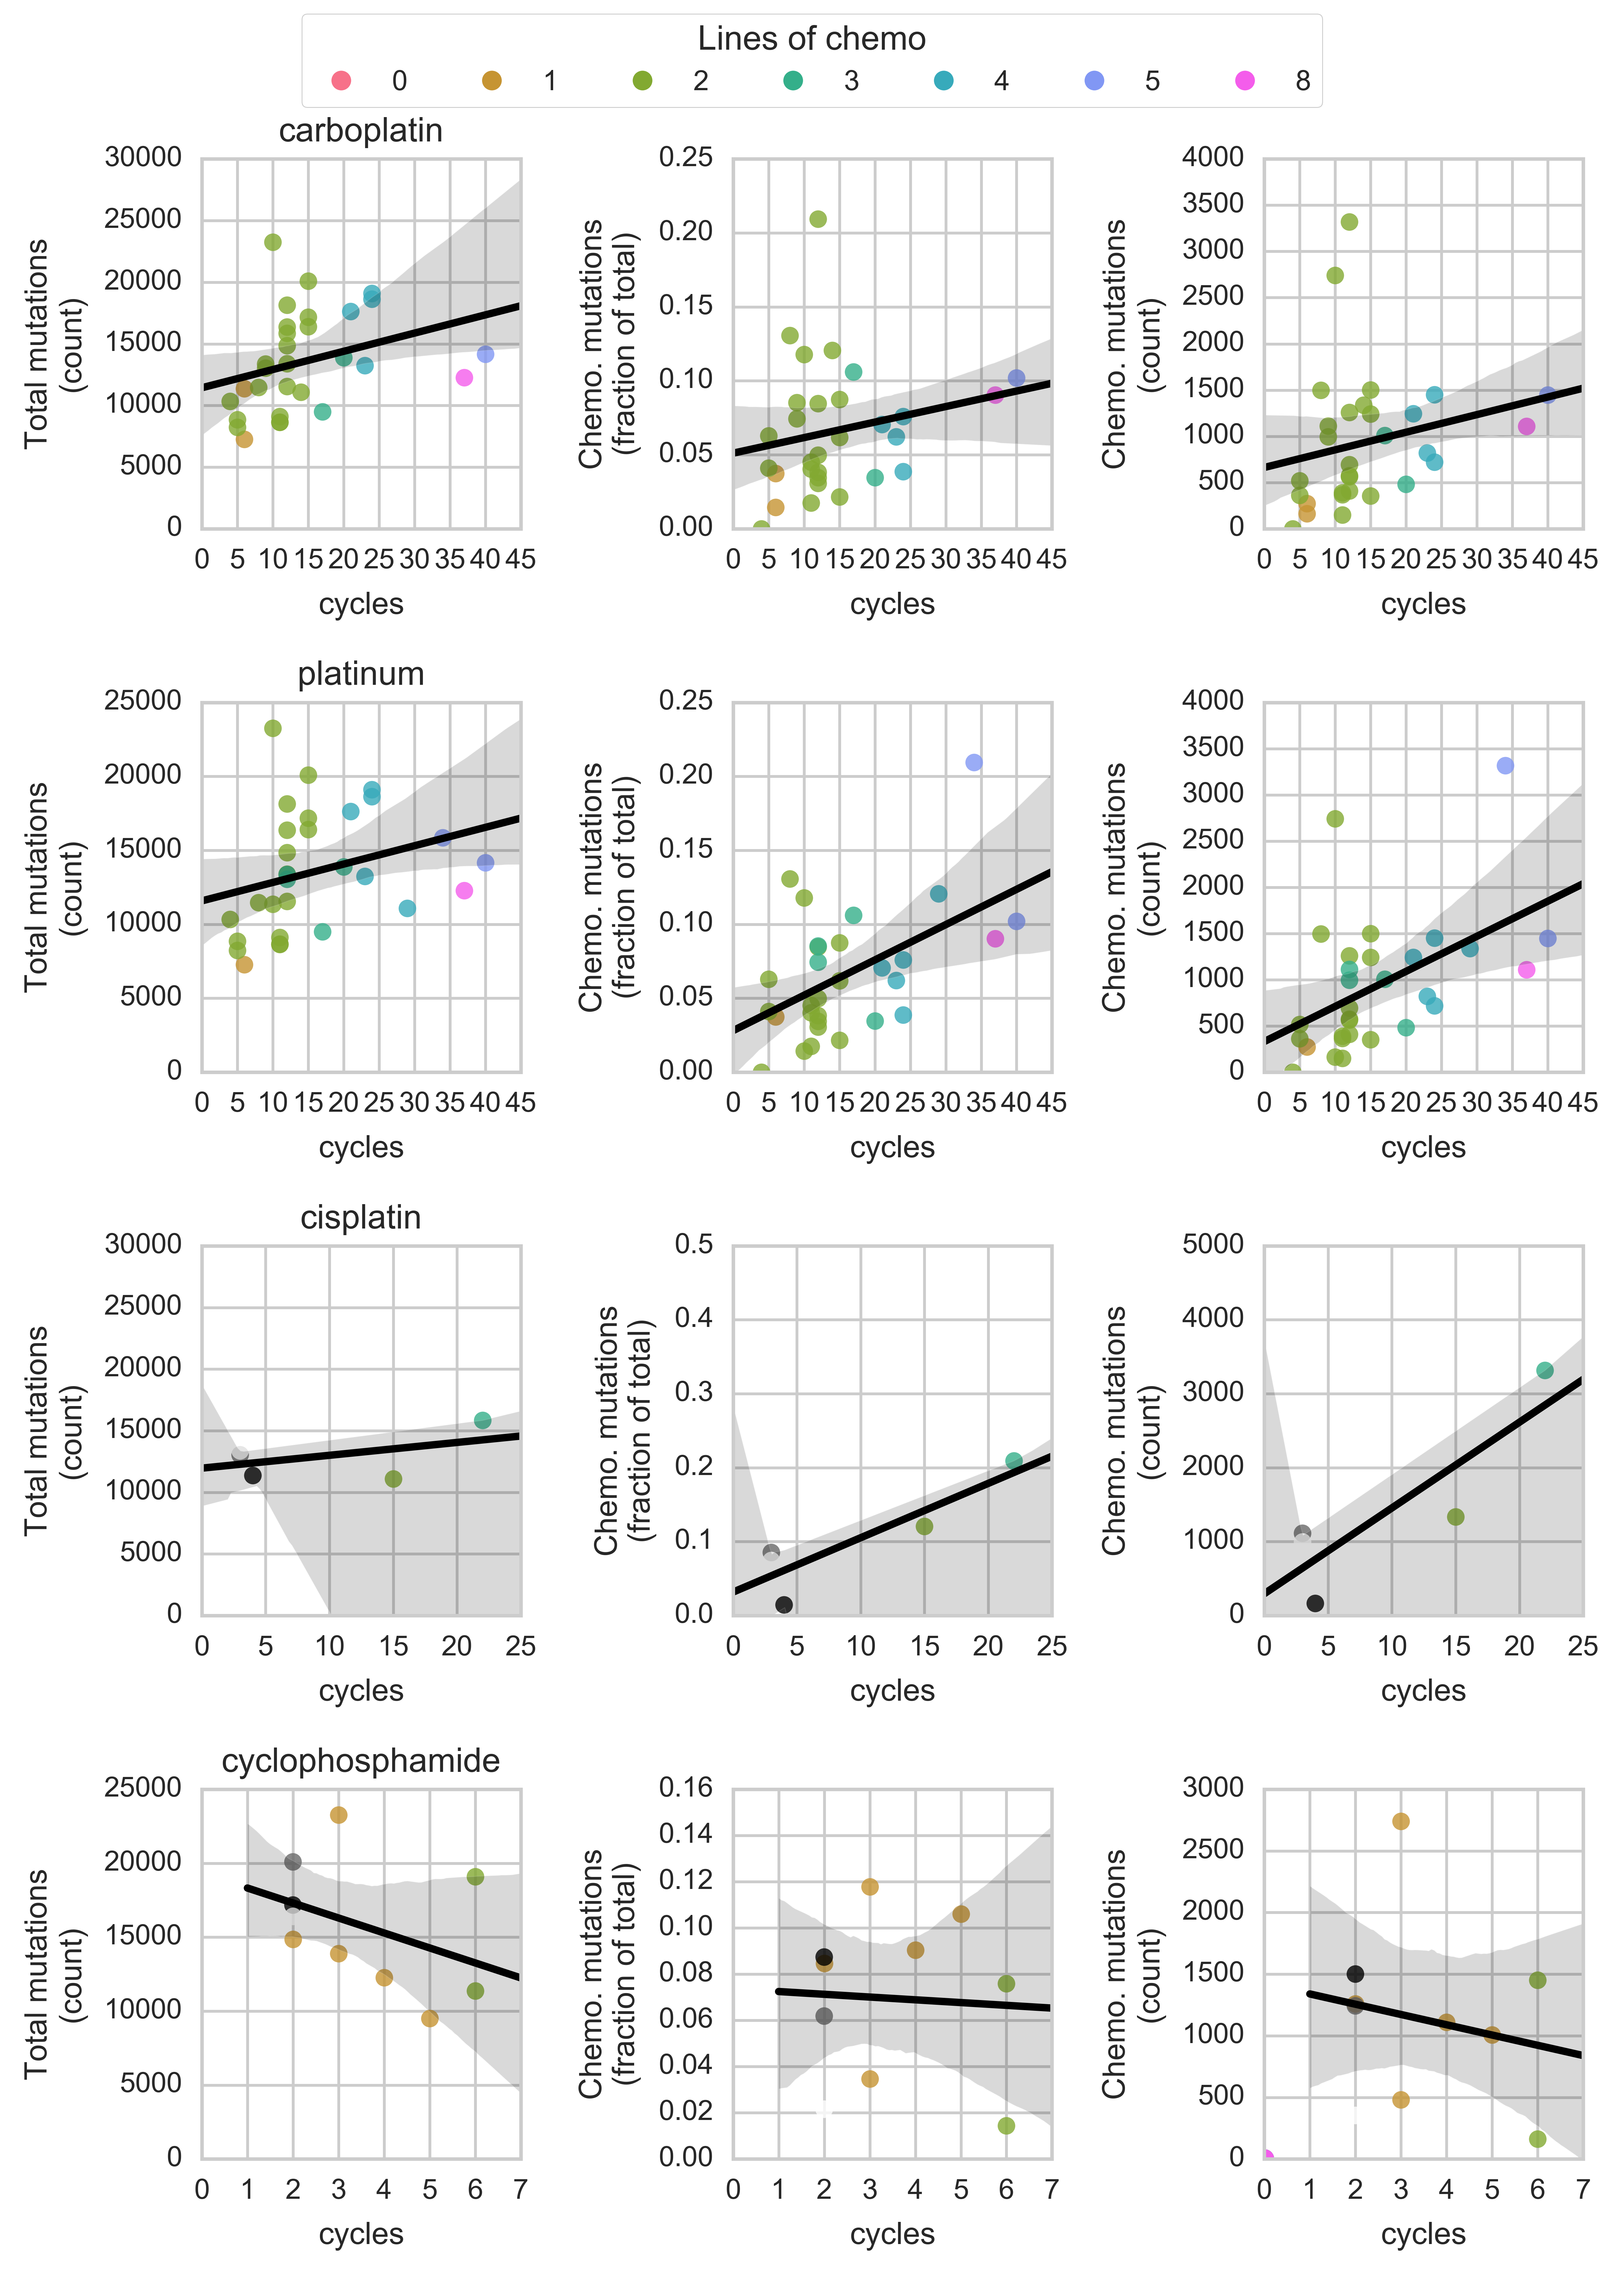

In [229]:
seaborn.set_context('paper')
seaborn.set_style('whitegrid')

def draw(chemo, **kwargs):
    for lines, sub_df2 in stacked.ix[(stacked.chemo == chemo)].groupby("lines"):
        for tissue_type, sub_df in sub_df2.groupby("tissue_type"):
            seaborn.regplot(
                fit_reg=False,
                data=sub_df,
                scatter_kws={
                    's':25,
                    'c': lines_to_color[lines],
                    'marker': "+" if tissue_type == "solid" else "o",
                },
                **kwargs)
    seaborn.regplot(
        data=stacked.ix[(stacked.chemo == chemo)],
        scatter=False,
        color="black",
        **kwargs
    )
    pyplot.ylim(ymin=0)
    pyplot.xlim(xmin=0)

pyplot.figure(figsize=(6.5,9))

chemos = ["carboplatin", "platinum", "cisplatin", "cyclophosphamide"]
for (row, chemo) in enumerate(chemos):
    pyplot.subplot(len(chemos),3,1 + 3 * row)
    draw(chemo, x="cycles", y="mutations")
    #if row == 0:
    #    pyplot.legend(
    #        title="Lines of chemo",
    #        ncol=6,
    #        fancybox=True,
    #        frameon=True,
    #        loc="upper right",
    #        fontsize="small",
    #        bbox_to_anchor=(4,1.35))
    pyplot.ylabel("Total mutations\n(count)")
    pyplot.title(chemo)

    pyplot.subplot(len(chemos),3,2 + 3 * row)
    draw(chemo, x="cycles", y="chemo mutations rate")
    pyplot.ylabel("Chemo. mutations\n(fraction of total)")
    #pyplot.gca().yaxis.set_label_position("right")

    pyplot.subplot(len(chemos),3,3 + 3 * row)
    draw(chemo, x="cycles", y="chemo mutations")
    pyplot.ylabel("Chemo. mutations\n(count)")
    #pyplot.gca().yaxis.tick_right()
    #pyplot.gca().yaxis.set_label_position("right")

legend_handles = []
legend_labels = []
for (label, color) in lines_to_color.items():
    legend_handles.extend(pyplot.plot([0], [0], label=label, color=color, marker='o', ls='None'))
    legend_labels.append(label)

pyplot.figlegend(
    legend_handles,
    legend_labels,
    "upper center",
    title="Lines of chemo",
    ncol=7,
    fancybox=True,
    frameon=True,
    fontsize="small")
pyplot.tight_layout(rect=(0, 0, 1, .97))

In [200]:
new_coho

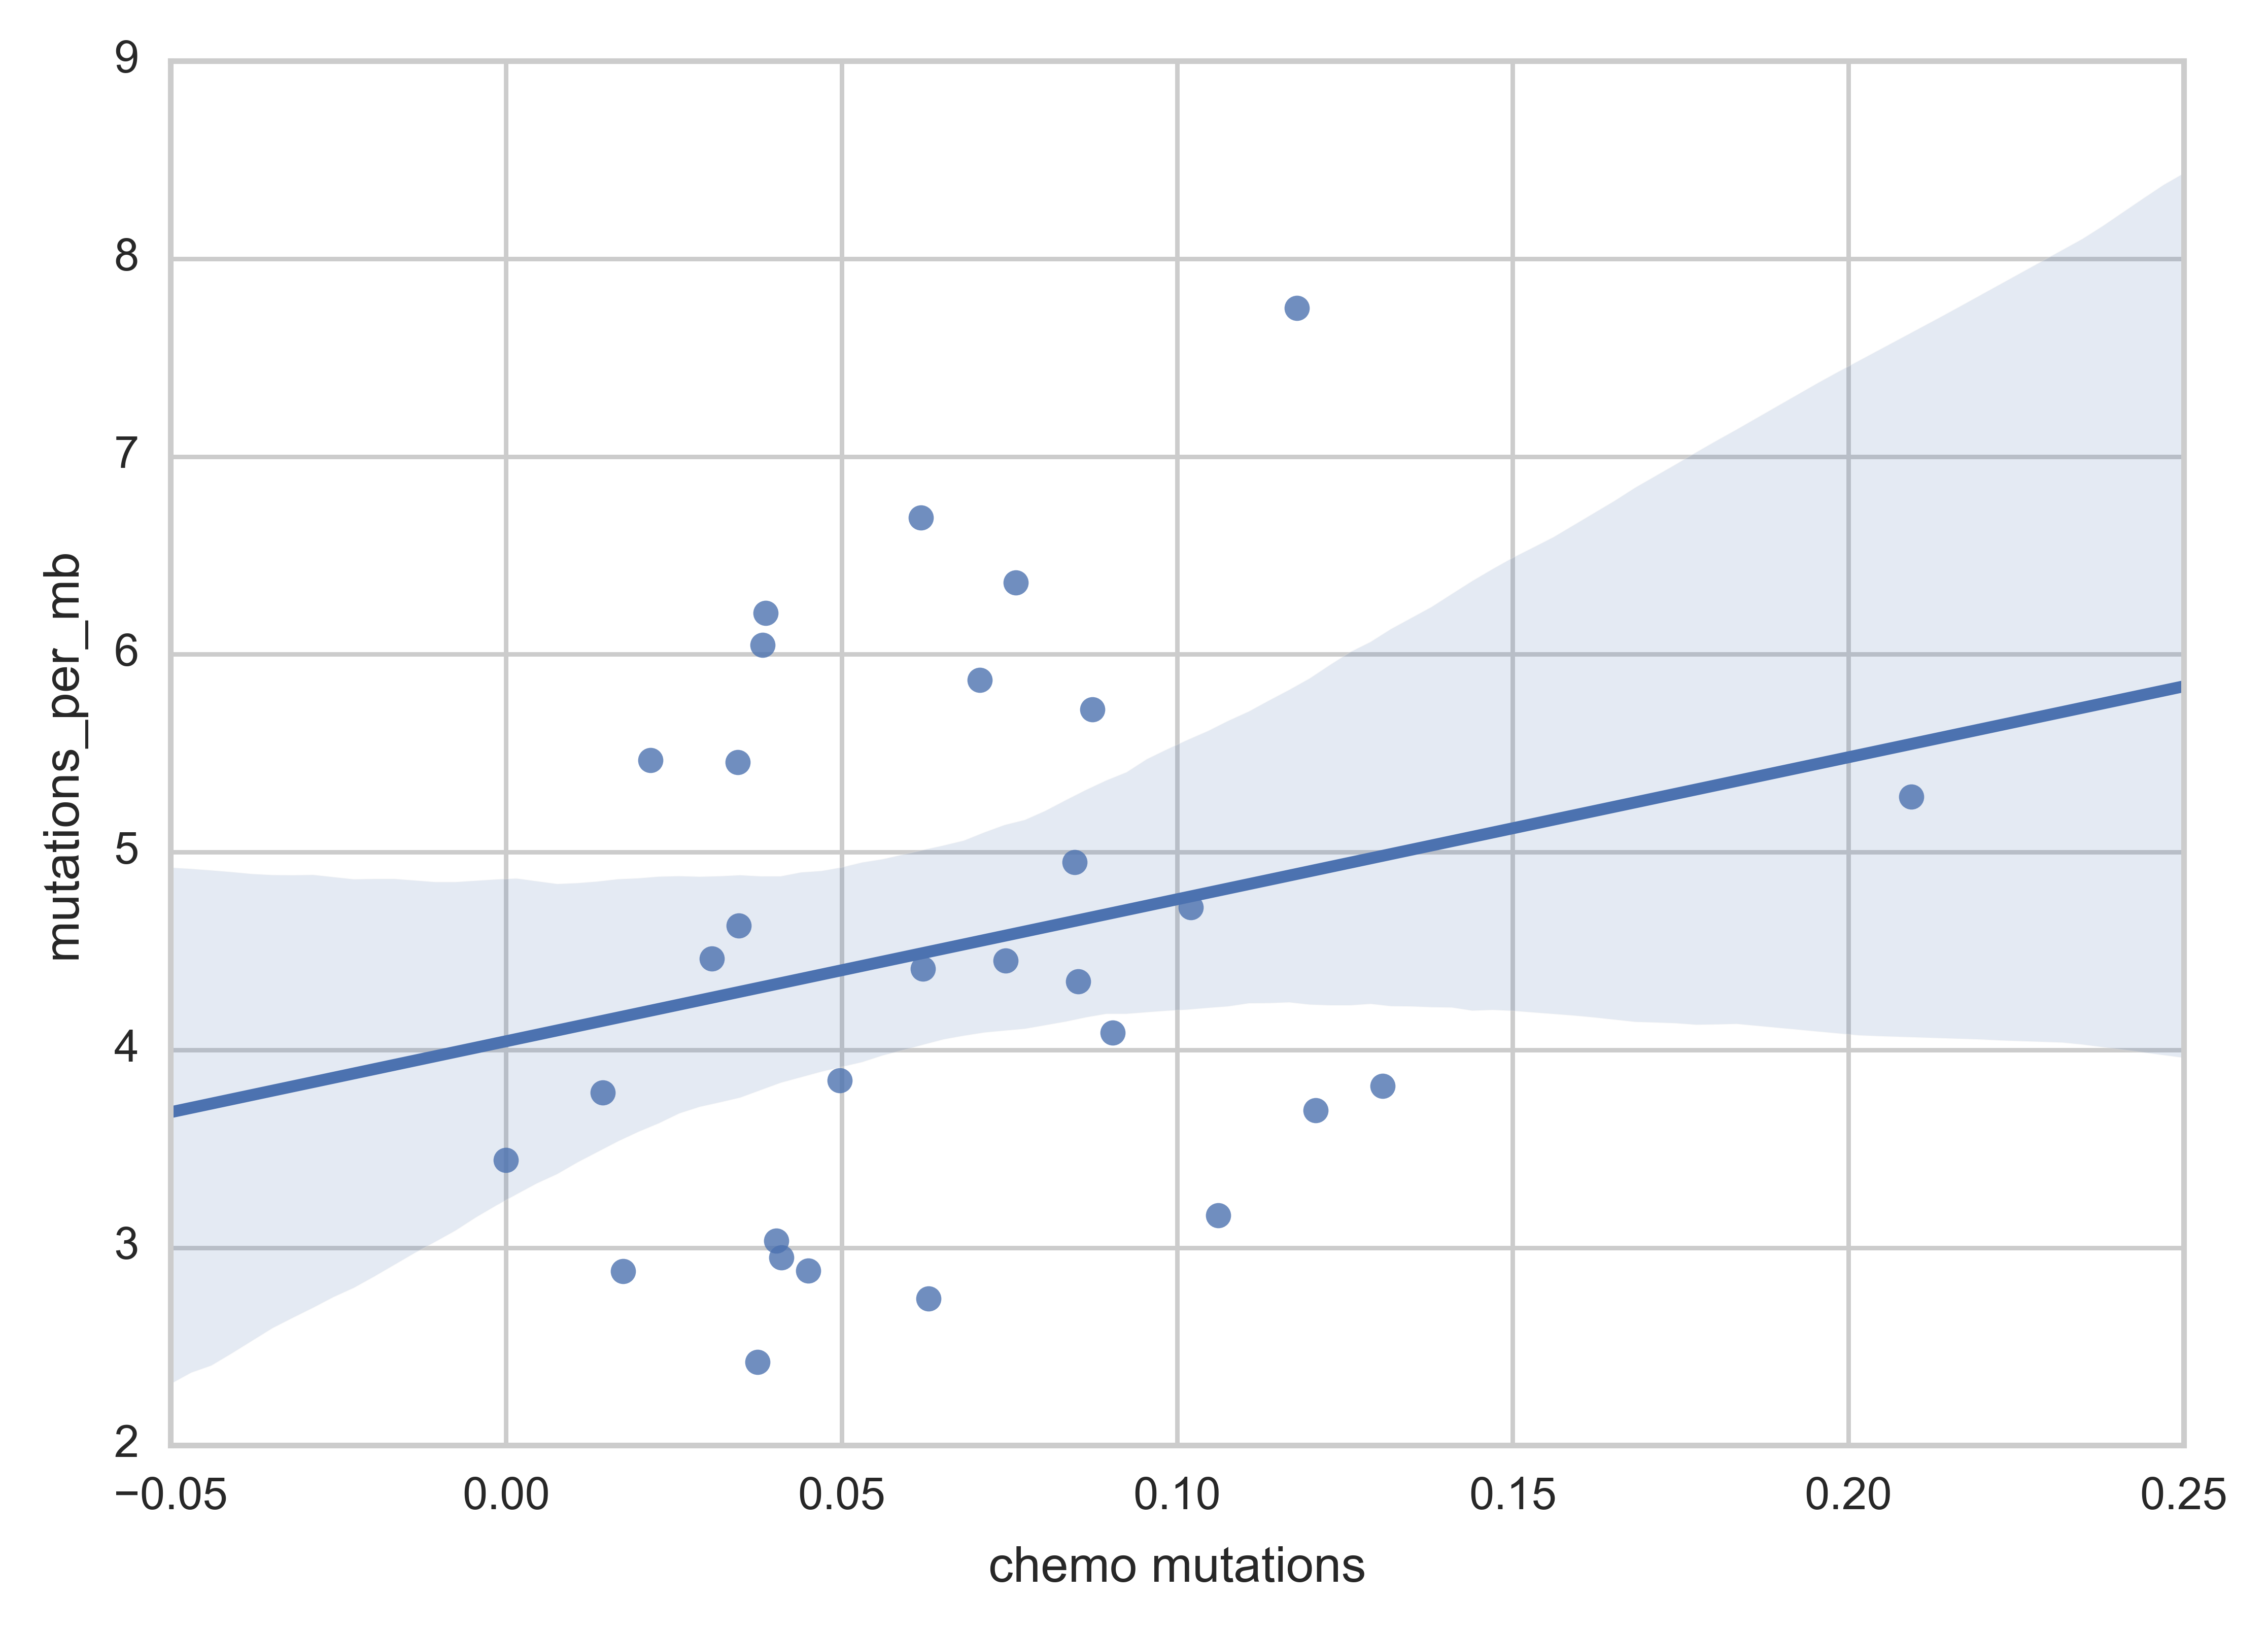

In [157]:
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="chemo mutations",
    y="mutations_per_mb")

In [154]:
new_cohort_df.sort_values("Lines of cisplatin", ascending=False)[list(new_cohort_df.columns)[-40:] + ["mutations_per_mb"]]

docetaxel bevacizumab etoposide nab-paclitaxel  \
source_id                                                      
AOCS-092-3-3       True       False      True          False   
AOCS-095-3-1      False       False     False          False   
AOCS-134-3-9      False        True     False          False   
AOCS-150-3-1      False       False     False          False   
AOCS-150-8-X      False       False     False          False   
AOCS-001-1-7      False       False     False          False   
AOCS-004-1-5      False       False     False          False   
AOCS-005-1-8      False       False     False          False   
AOCS-034-1-0      False       False     False          False   
AOCS-034-3-8      False       False     False          False   
AOCS-055-1-7      False       False     False          False   
AOCS-056-1-X      False       False     False          False   
AOCS-057-1-2      False       False     False          False   
AOCS-058-1-5      False       False     False          False   
AOCS-059-1-8      False       False     False          False   
AOCS-060-1-5      False       False     False          False   
AOCS-061-1-8      False       False     False          False   
AOCS-063-1-3      False       False     False          False   
AOCS-064-1-6      False       False     False          False   
AOCS-064-3-3      False       False     False          False   
AOCS-065-1-9      False       False     False          False   
AOCS-065-3-6       True       False     False          False   
AOCS-075-1-0      False       False     False          False   
AOCS-076-1-3      False       False     False          False   
AOCS-077-1-6      False       False     False          False   
...                 ...         ...       ...            ...   
AOCS-147-1-1      False       False     False          False   
AOCS-148-1-4      False       False     False          False   
AOCS-149-1-7      False       False     False          False   
AOCS-152-1-X      False       False     False          False   
AOCS-153-1-2      False       False     False          False   
AOCS-155-3-5      False       False     False          False   
AOCS-157-1-3      False       False     False          False   
AOCS-158-1-6      False       False     False          False   
AOCS-159-1-9      False       False     False          False   
AOCS-160-1-6      False       False     False          False   
AOCS-161-1-9      False       False     False          False   
AOCS-162-1-1      False       False     False          False   
AOCS-163-1-4      False       False     False          False   
AOCS-164-1-7      False       False     False          False   
AOCS-165-1-X      False       False     False          False   
AOCS-166-1-2      False       False     False          False   
AOCS-167-13-9     False       False     False          False   
AOCS-167-16-X     False       False     False          False   
AOCS-167-3-2      False       False     False          False   
AOCS-168-1-8      False       False     False          False   
AOCS-169-1-0      False       False     False          False   
AOCS-170-1-8      False       False     False          False   
AOCS-170-3-5      False       False     False          False   
AOCS-171-1-0      False       False     False          False   
AOCS-171-3-8      False       False     False          False   

              farletuzumab/placebo   patient  days since last chemo  \
source_id                                                             
AOCS-092-3-3                 False  AOCS-092                    7.0   
AOCS-095-3-1                 False  AOCS-095                    6.0   
AOCS-134-3-9                 False  AOCS-134                    7.0   
AOCS-150-3-1                 False  AOCS-150                  113.0   
AOCS-150-8-X                 False  AOCS-150                  113.0   
AOCS-001-1-7                 False       NaN                    NaN   
AOCS-004-1-5                 False       NaN         

In [62]:
seaborn.?

In [ ]:
seaborn.lmplot(
    data=stacked,
    x="cycles",
    y="mutations_per_mb",
    col="lines",
    row="chemo",
)

LinAlgError: Arrays cannot be empty

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/seaborn/linearmodels.py:303: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


(0, 10)

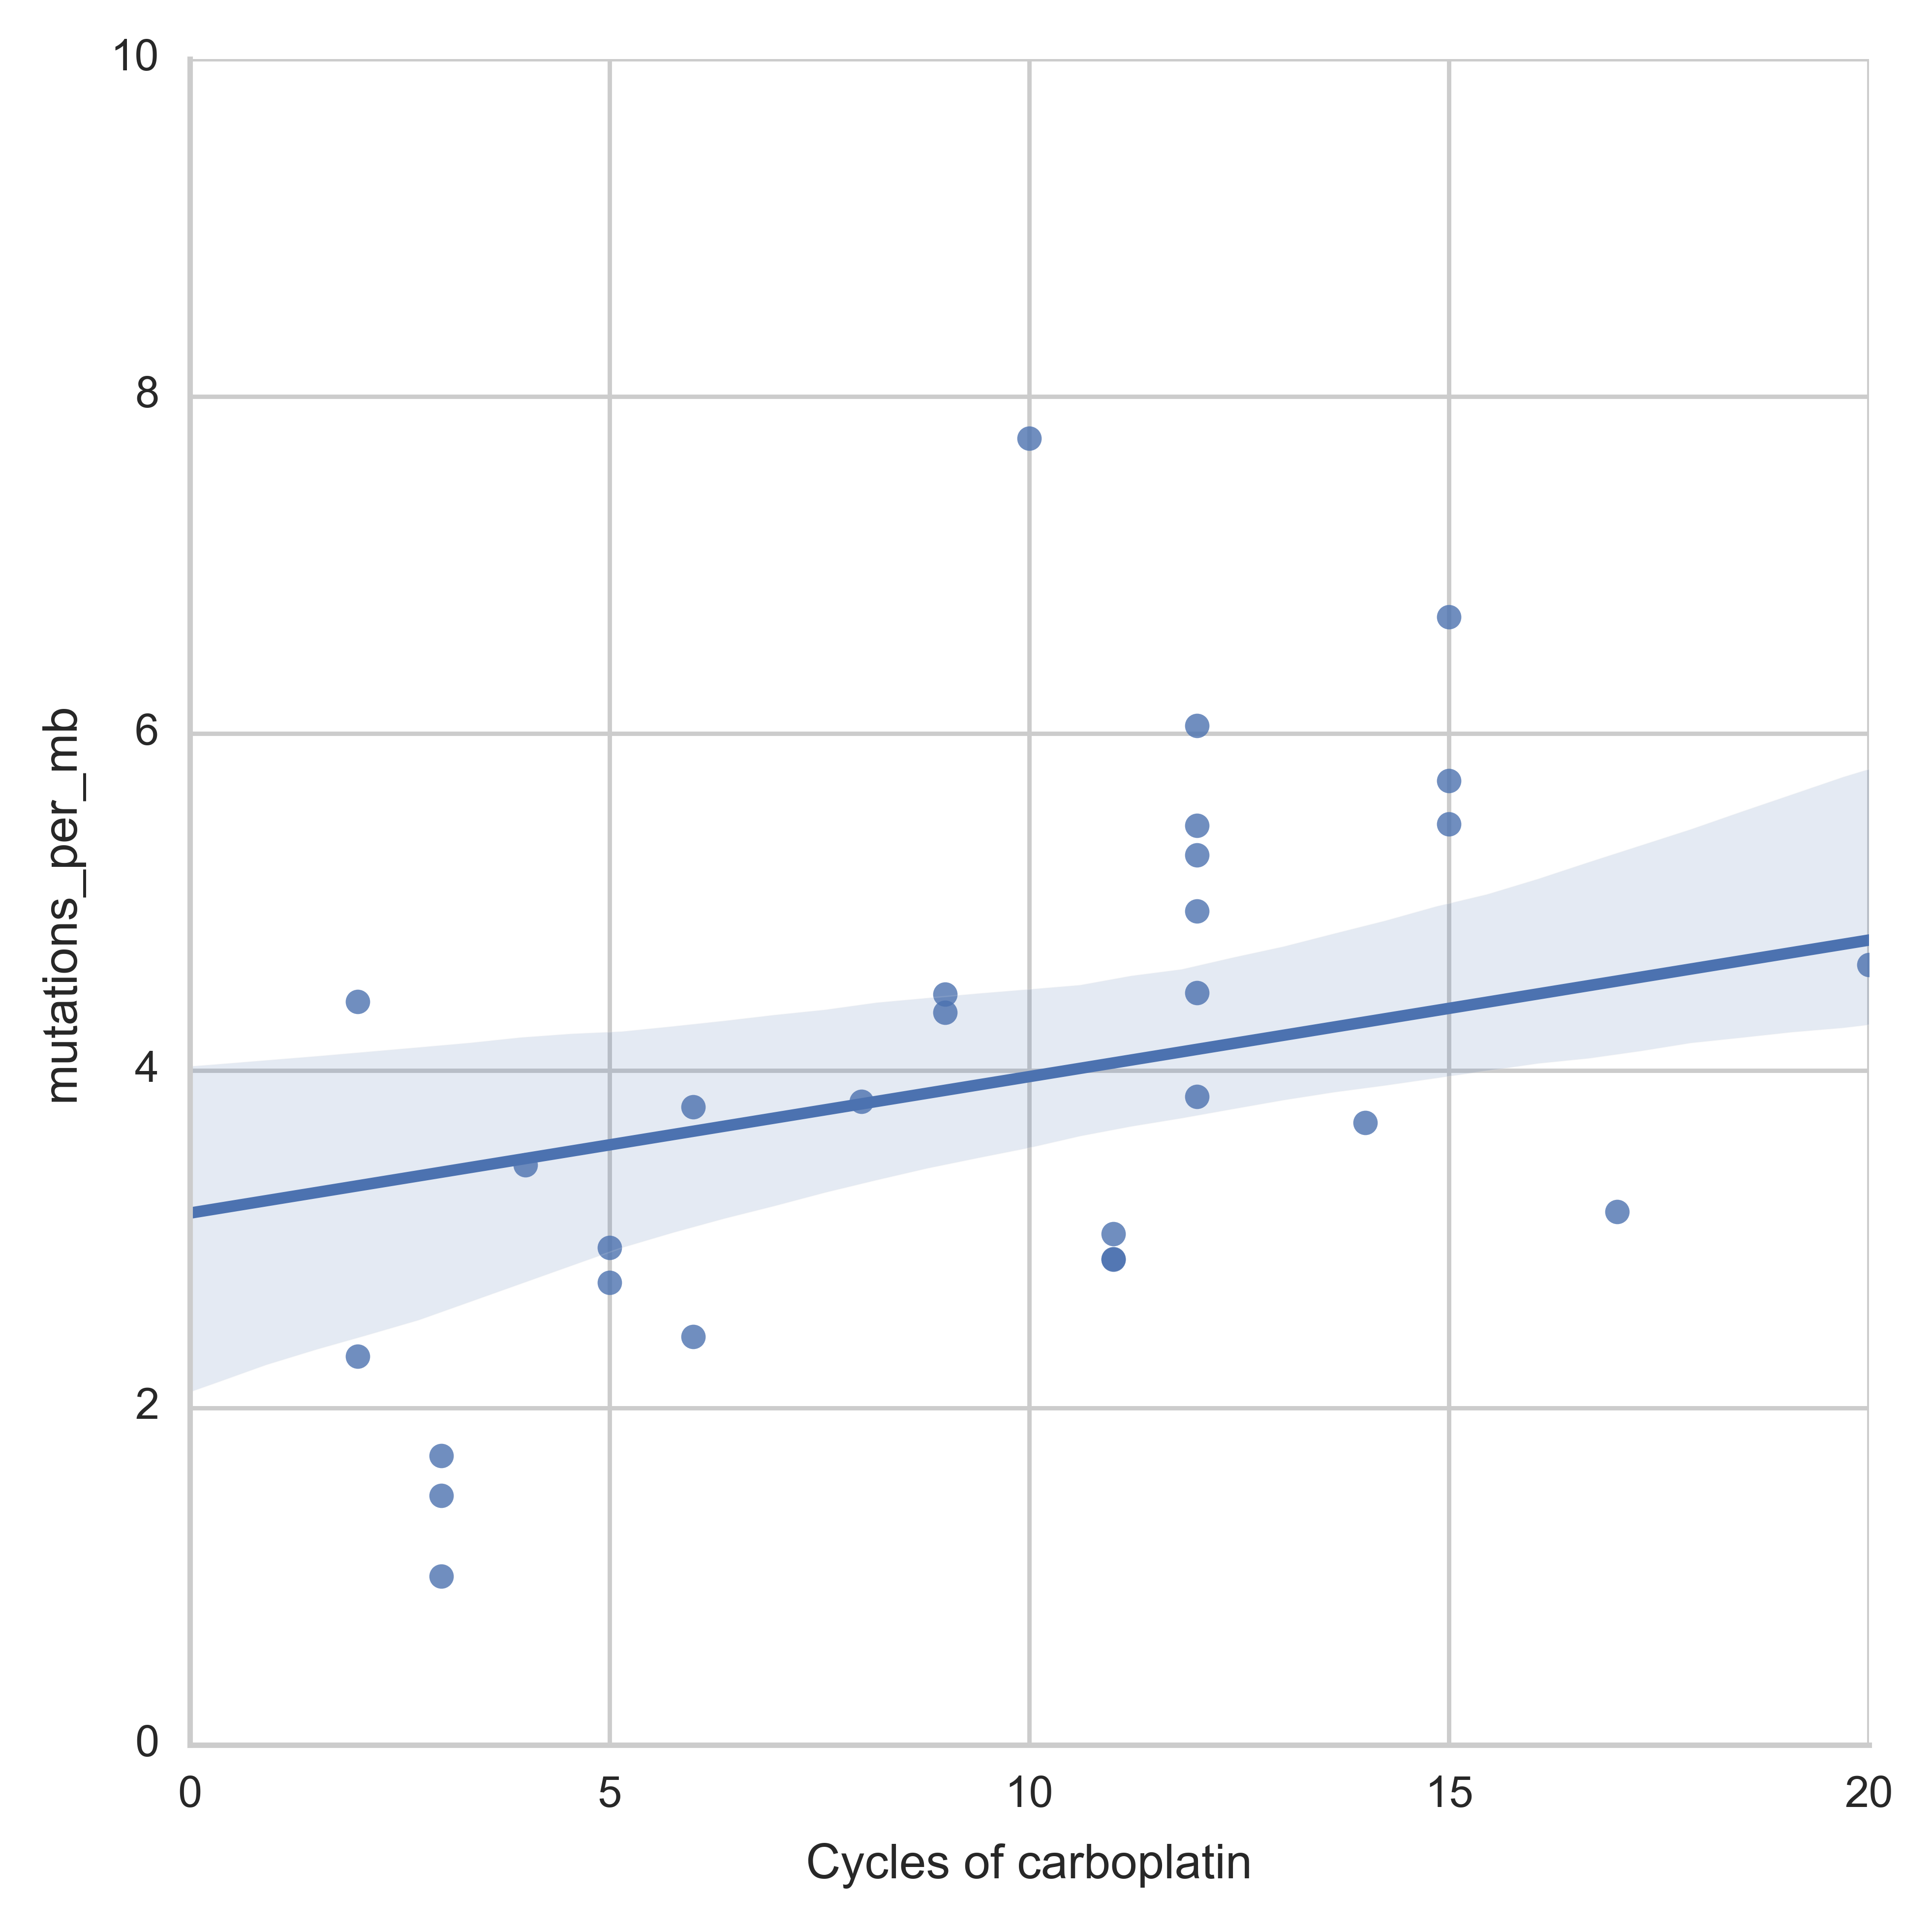

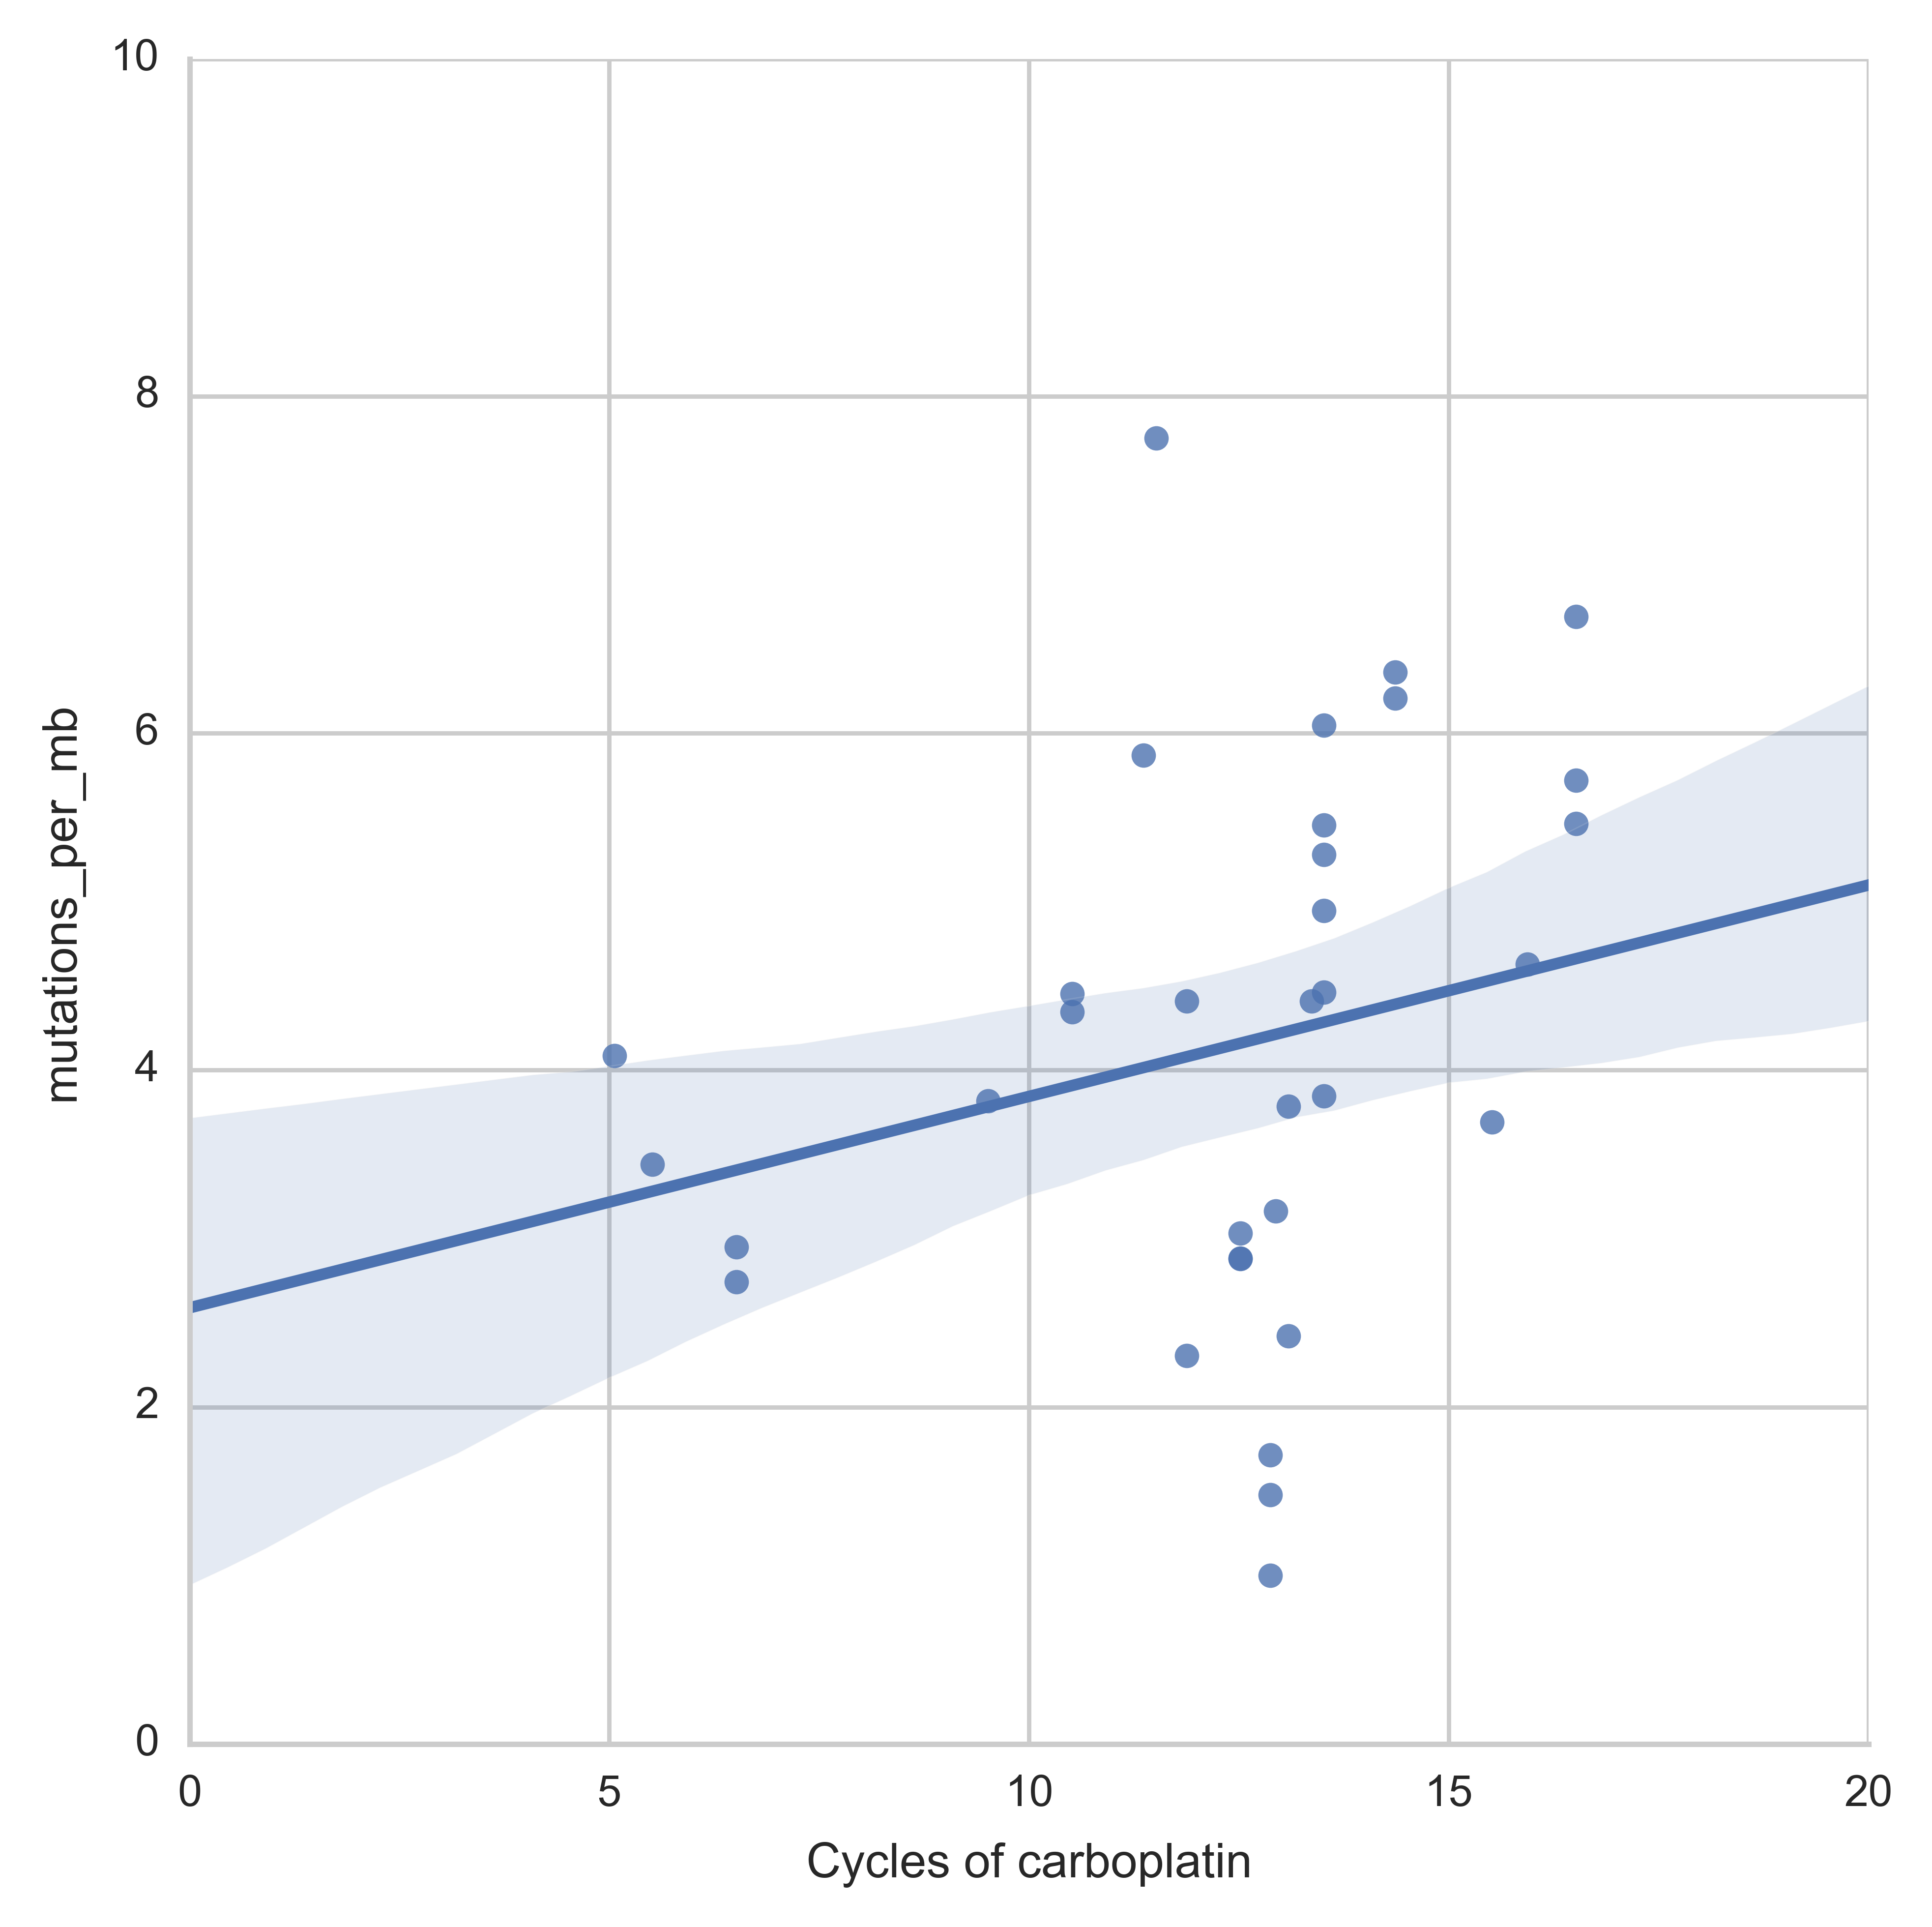

In [407]:

seaborn.lmplot(
    data=new_cohort_df.ix[new_cohort_df.treated],
    x="Cycles of carboplatin",
    y="mutations_per_mb",
    #hue="tissue_type",
    #x_partial="Lines of carboplatin"
)
pyplot.xlim(xmin=0, xmax=20)
pyplot.ylim(ymin=0, ymax=10)

pyplot.figure()
seaborn.lmplot(
    data=new_cohort_df.ix[new_cohort_df.treated],
    x="Cycles of carboplatin",
    y="mutations_per_mb",
    #hue="tissue_type",
    x_partial="Lines of carboplatin"
)
pyplot.xlim(xmin=0, xmax=20)
pyplot.ylim(ymin=0, ymax=10)

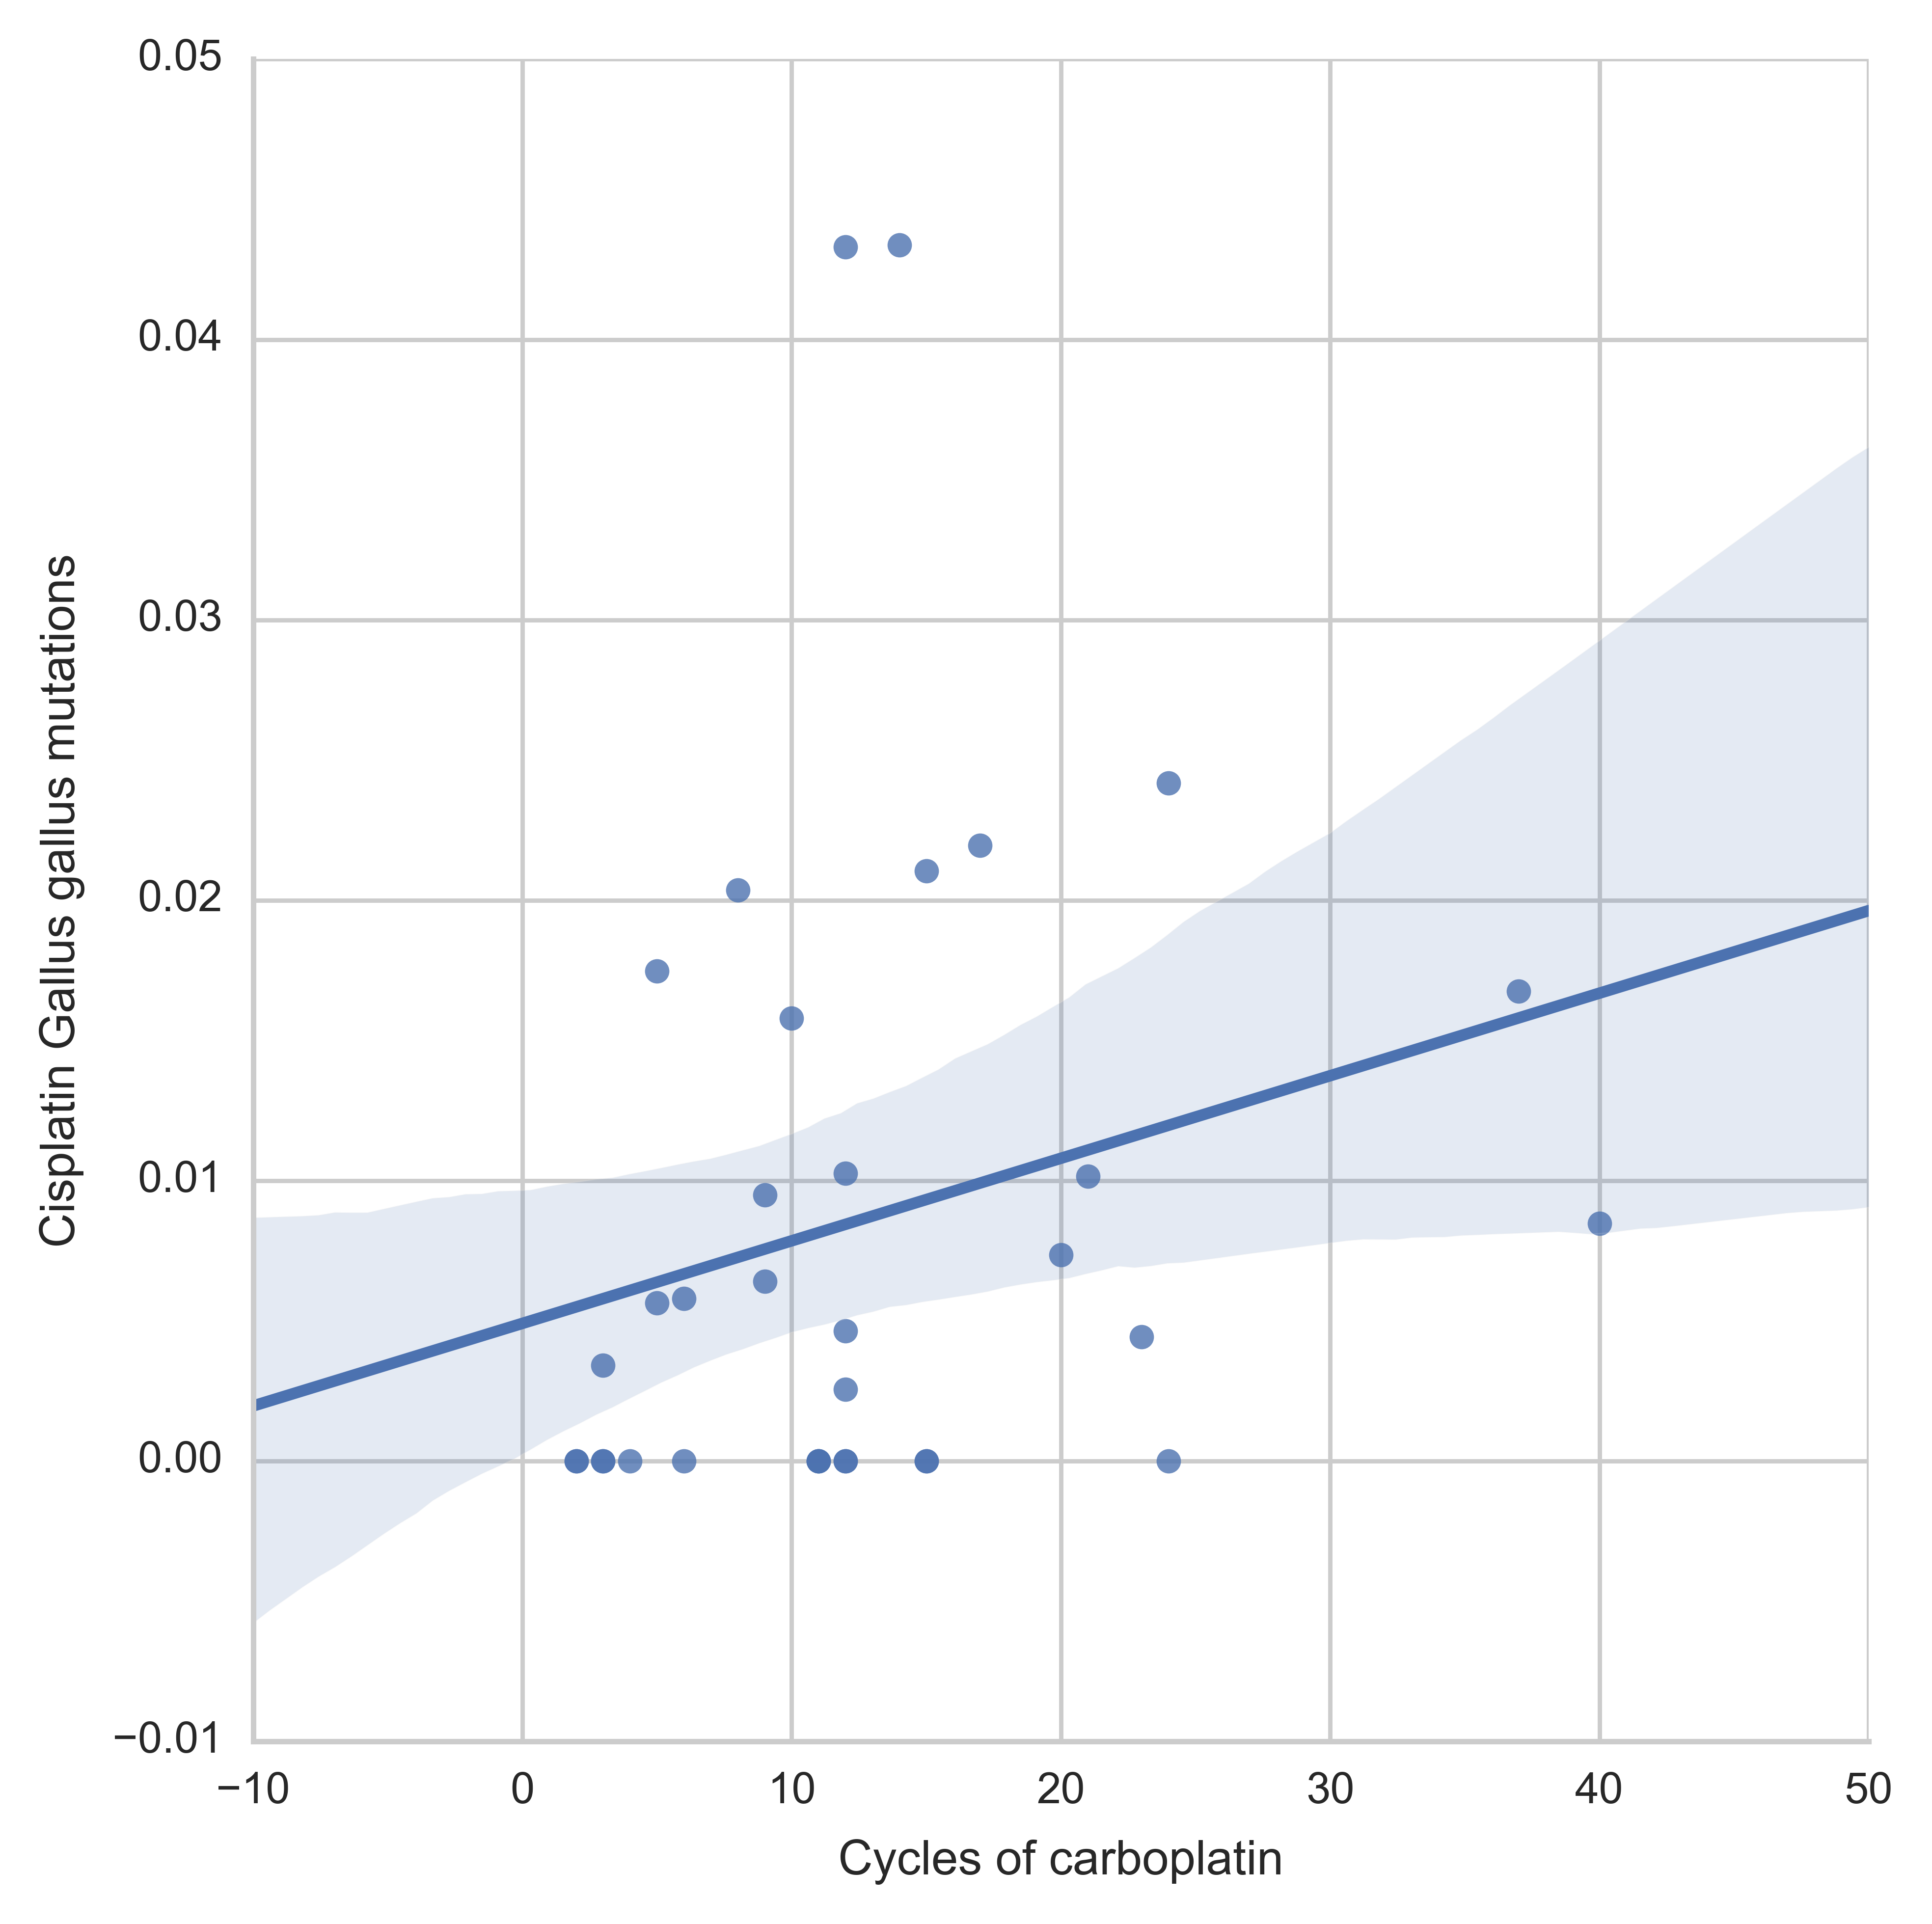

In [383]:
list(new_cohort_df)

seaborn.lmplot(
    data=new_cohort_df.ix[new_cohort_df.treated],
    x="Cycles of carboplatin",
    y="Cisplatin Gallus gallus mutations"
)

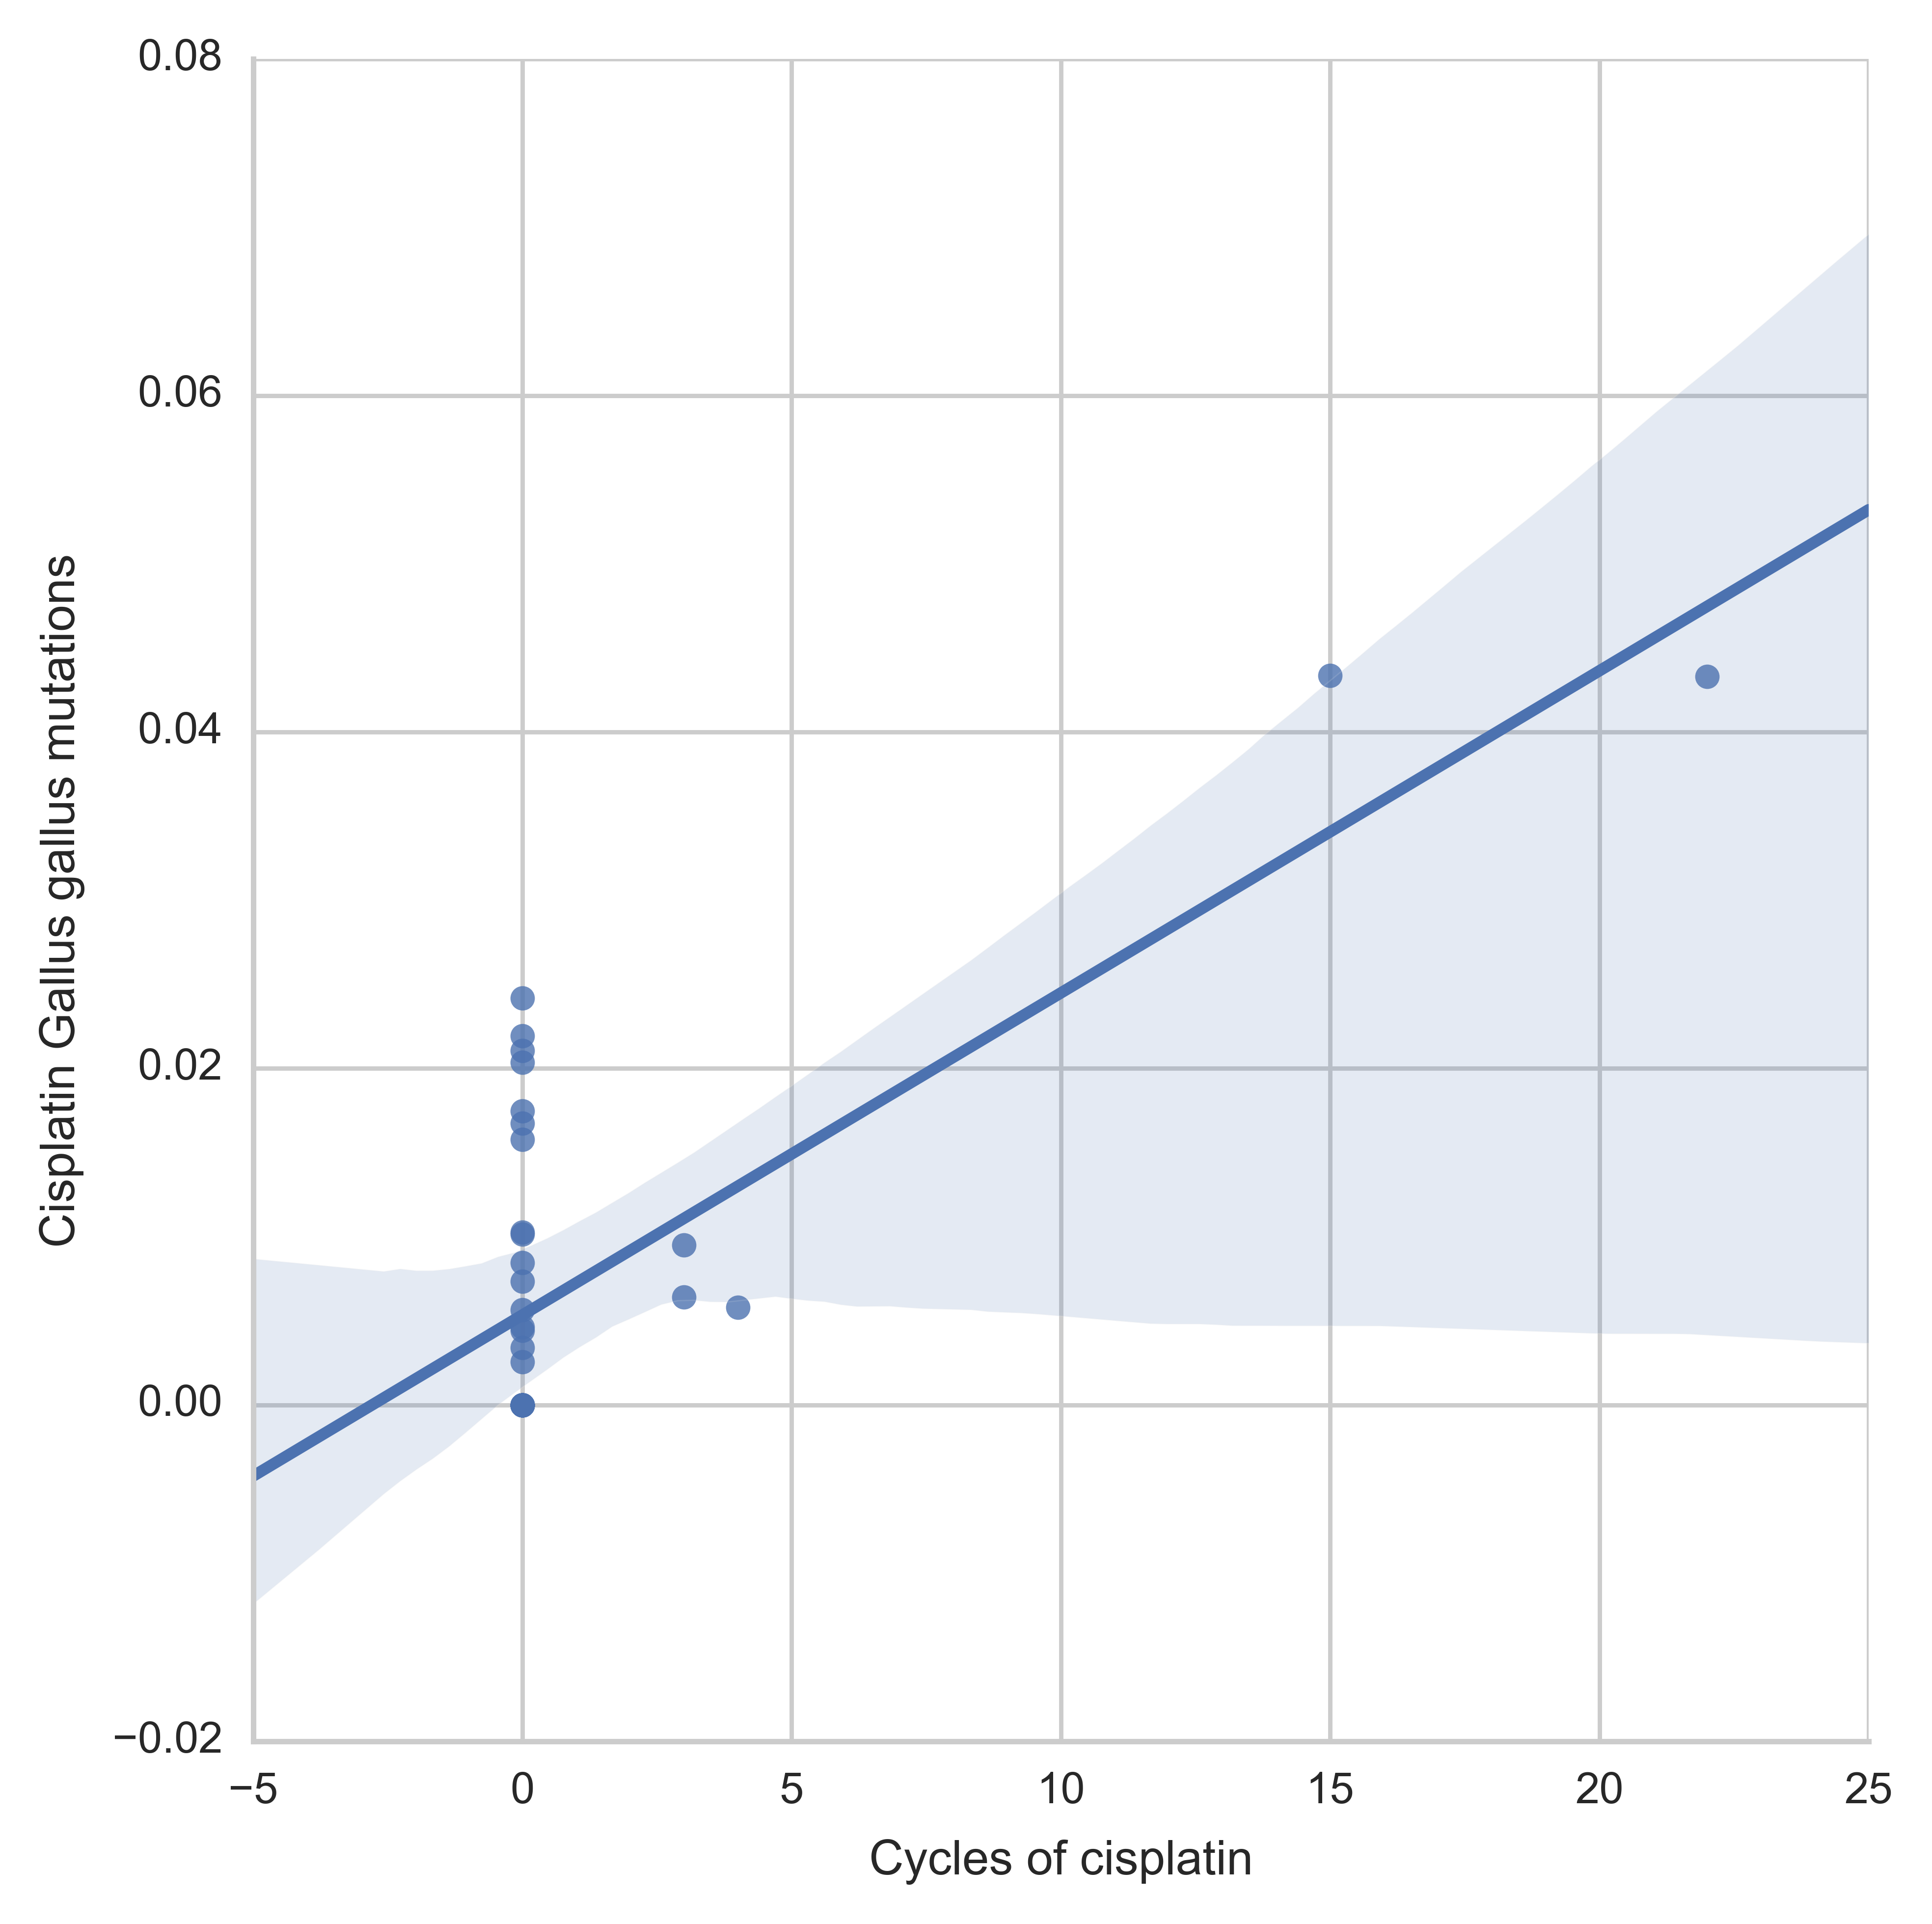

In [386]:
seaborn.lmplot(
    data=new_cohort_df.ix[new_cohort_df.treated].fillna(0),
    x="Cycles of cisplatin",
    y="Cisplatin Gallus gallus mutations",
    robust=True,
)

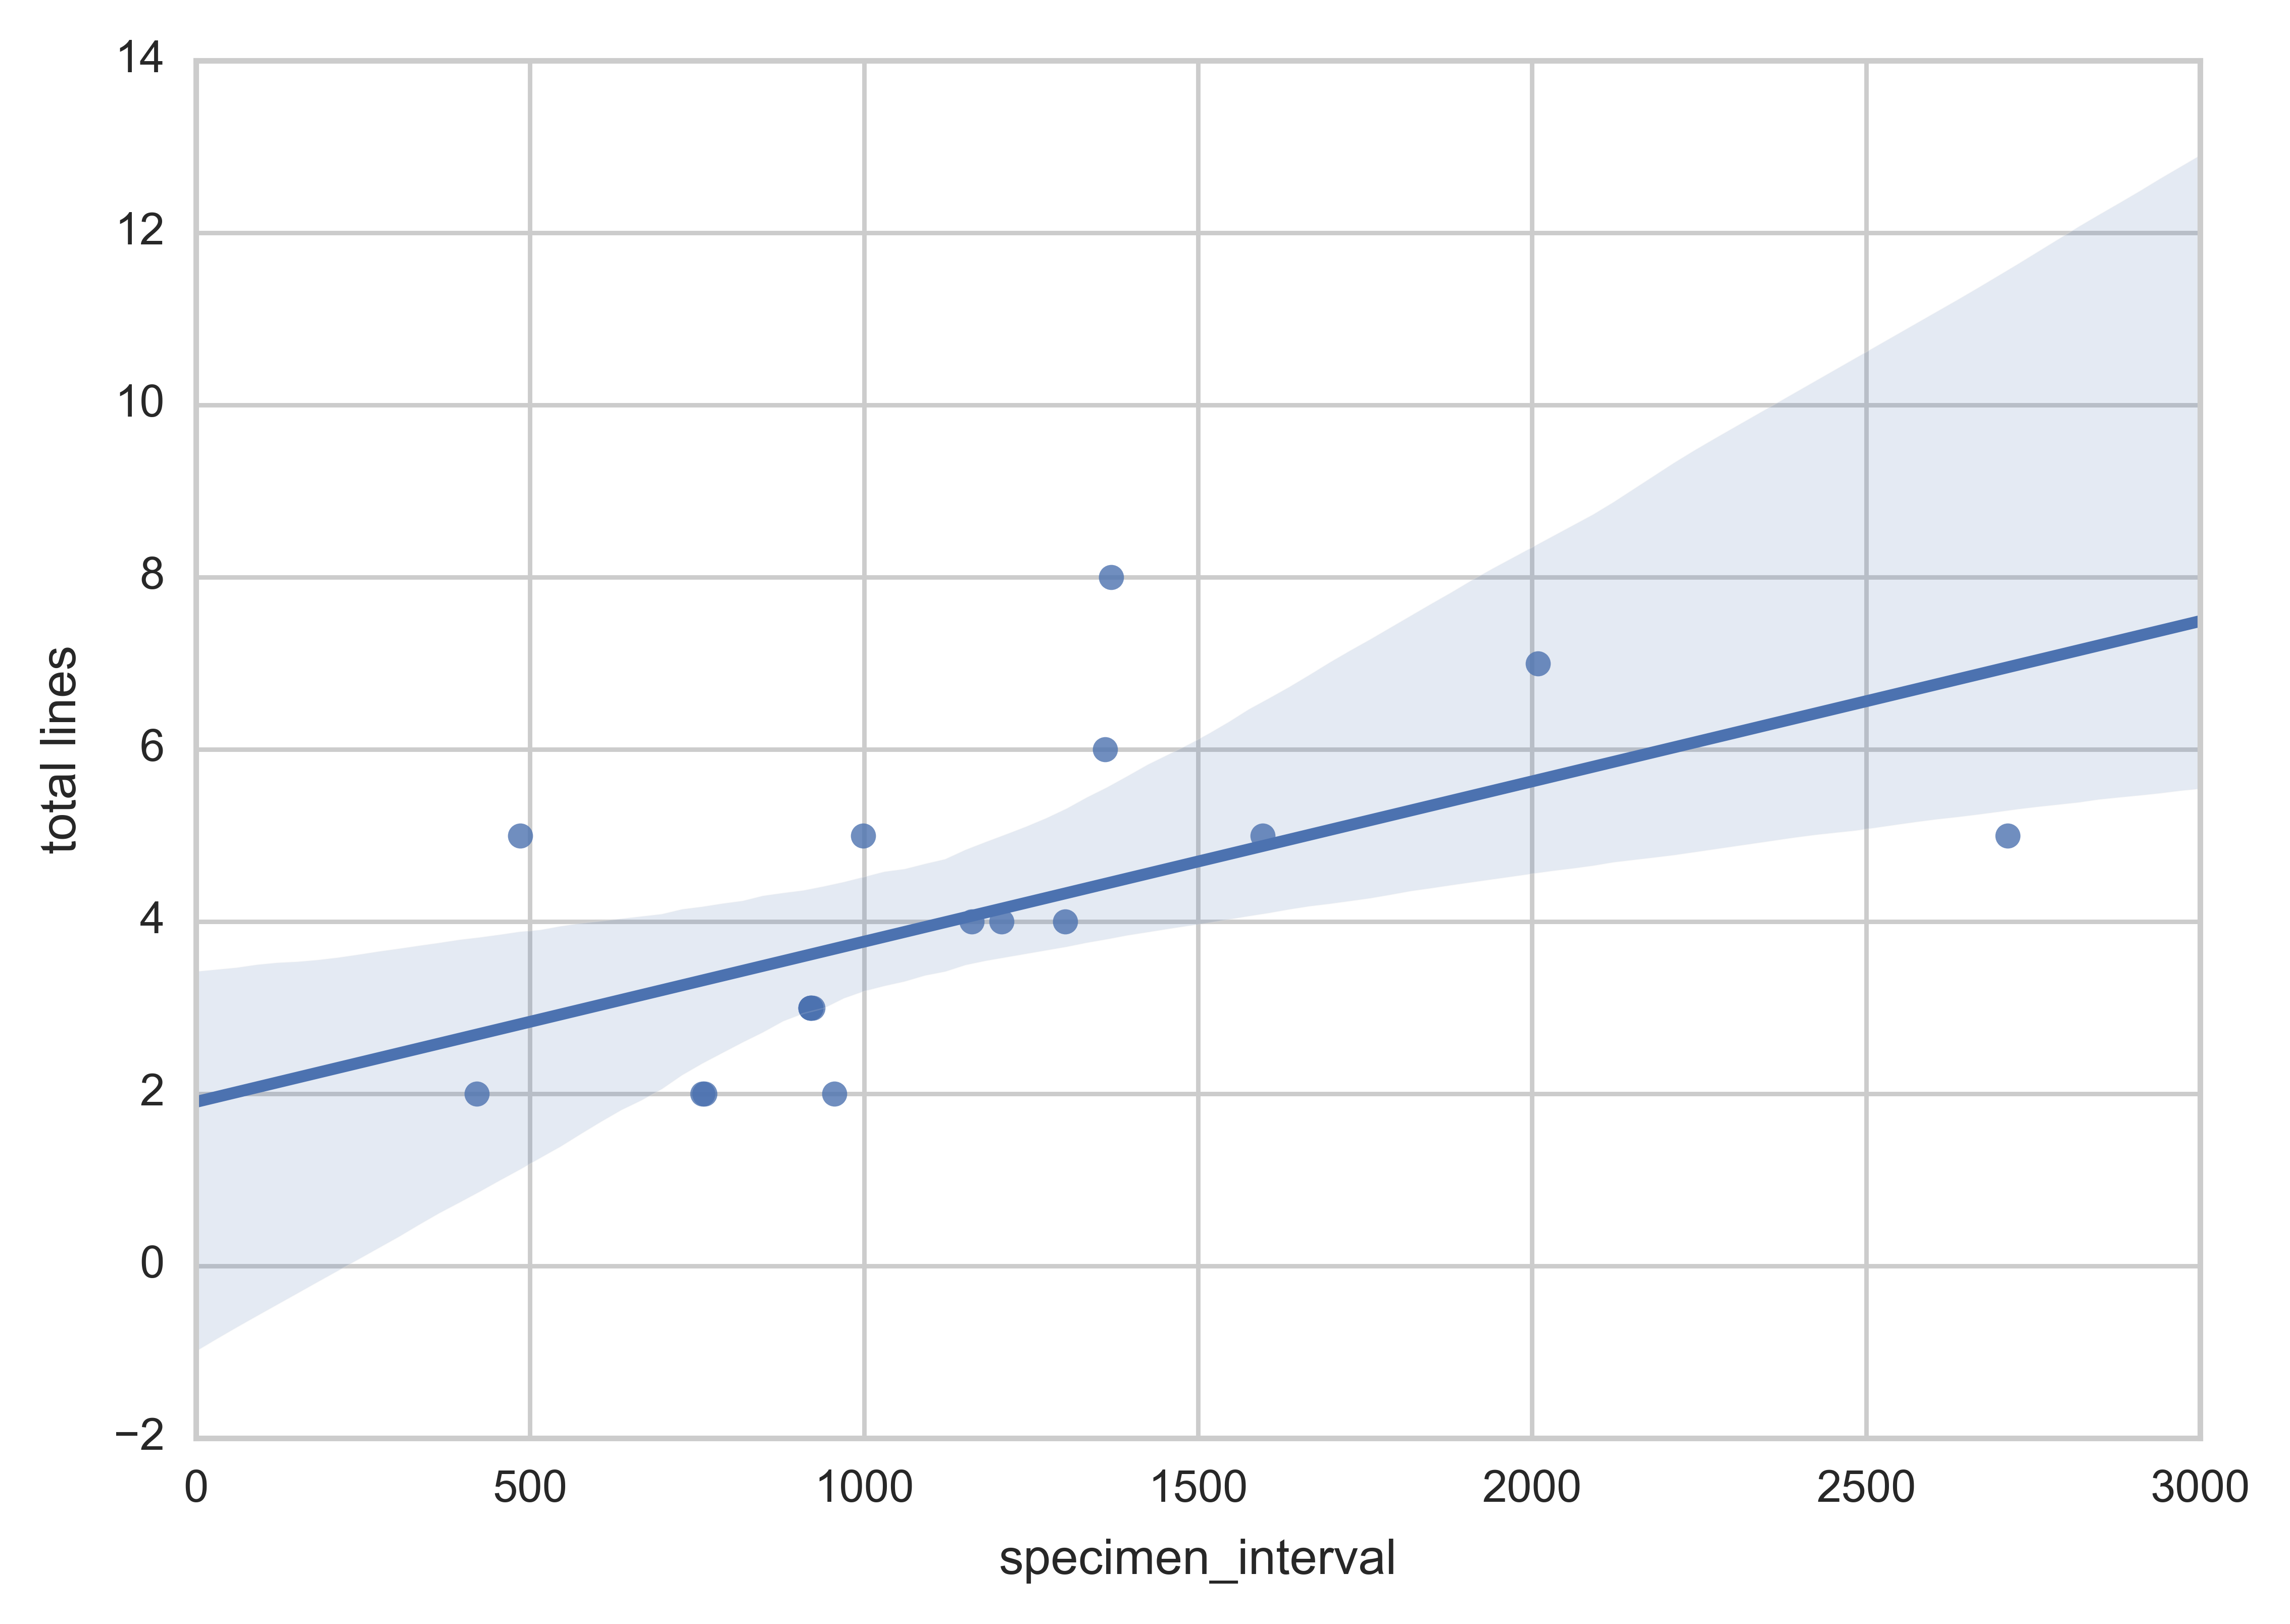

In [280]:
new_cohort_df[["source_id", "analyzed_sample_interval"]]
new_cohort_df.groupby("specific_treatment").specimen_interval.median()
#list(new_cohort_df)
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="specimen_interval",
    y="total lines")

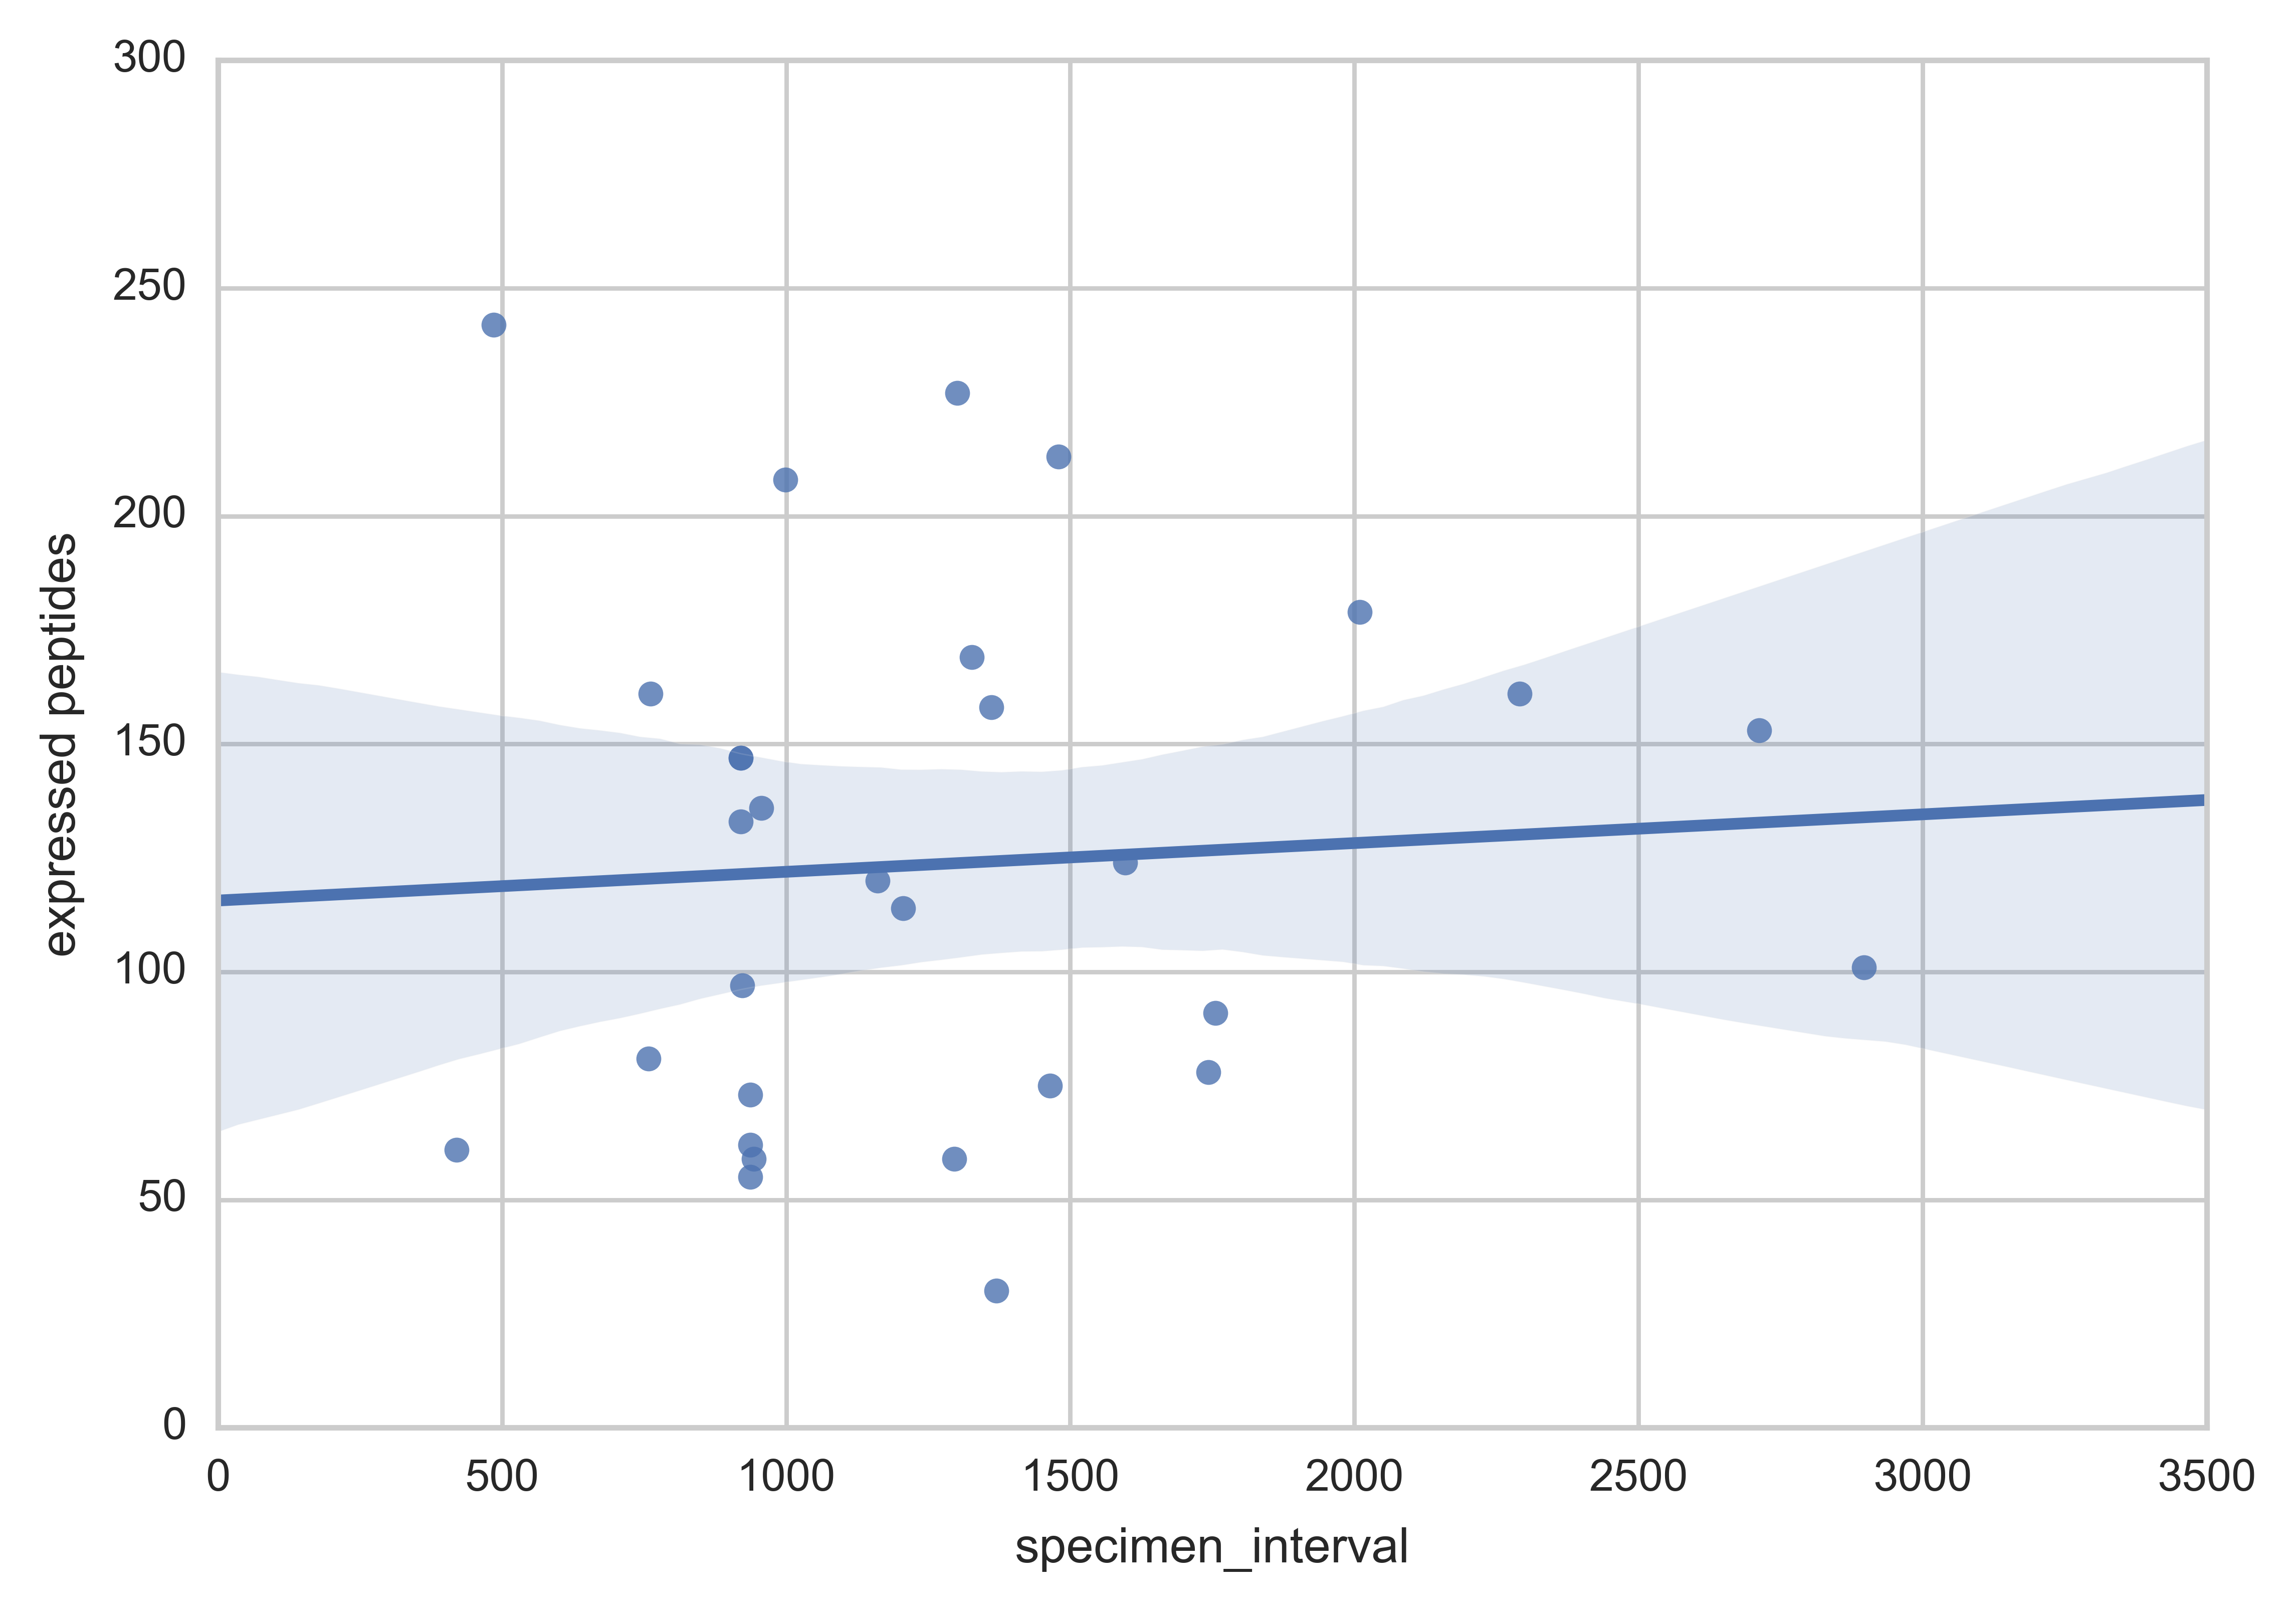

In [281]:
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="specimen_interval",
    y="expressed peptides")

In [297]:
new_cohort_df.ix[
    (new_cohort_df["Lines of platinum"] == 0)
    & (new_cohort_df["specific_treatment"] == "relapse/treated")
]

source_id                 RNA_id   RNA biospecimen  \
source_id                                                               
AOCS-117-3-3    AOCS-117-3-3  EXTERNAOCS20140414002      AOCS-117-4-7   
AOCS-119-3-9    AOCS-119-3-9    ICGCDBDE20130916028      AOCS-119-4-2   
AOCS-120-3-6    AOCS-120-3-6    ICGCDBDE20130916029      AOCS-120-4-X   
AOCS-134-3-9    AOCS-134-3-9    ICGCDBDE20131122020      AOCS-134-4-2   
AOCS-138-3-X    AOCS-138-3-X    ICGCDBDE20130916038      AOCS-138-4-3   
AOCS-141-3-2    AOCS-141-3-2    ICGCDBDE20131122021      AOCS-141-4-6   
AOCS-141-8-0    AOCS-141-8-0  EXTERNAOCS20140414003     AOCS-141-10-8   
AOCS-142-3-5    AOCS-142-3-5    ICGCDBDE20130916039      AOCS-142-4-9   
AOCS-155-3-5    AOCS-155-3-5    ICGCDBDE20131122043      AOCS-155-4-9   
AOCS-167-13-9  AOCS-167-13-9  EXTERNAOCS20140227009  AOCS-167-27-X-MD   
AOCS-167-16-X  AOCS-167-16-X  EXTERNAOCS20140227011  AOCS-167-29-7-MD   
AOCS-167-3-2    AOCS-167-3-2  EXTERNAOCS20140227013      AOCS-167-4-6   

                                        DNA_id DNA_biospecimen  \
source_id                                                        
AOCS-117-3-3   AOCS_117_ICGC_DBPC_20130714_001    AOCS-117-3-3   
AOCS-119-3-9   AOCS_119_ICGC_DBPC_20130205_097    AOCS-119-3-9   
AOCS-120-3-6   AOCS_120_ICGC_DBPC_20130205_099    AOCS-120-3-6   
AOCS-134-3-9   AOCS_134_ICGC_DBPC_20130205_134    AOCS-134-3-9   
AOCS-138-3-X   AOCS_138_ICGC_DBPC_20130205_146    AOCS-138-3-X   
AOCS-141-3-2   AOCS_141_ICGC_DBPC_20130205_153    AOCS-141-3-2   
AOCS-141-8-0   AOCS_141_ICGC_DBDE_20131003_002    AOCS-141-8-0   
AOCS-142-3-5   AOCS_142_ICGC_DBPC_20130205_155    AOCS-142-3-5   
AOCS-155-3-5   AOCS_155_ICGC_DBPC_20130701_009    AOCS-155-3-5   
AOCS-167-13-9  AOCS_167_ICGC_DBDE_20130904_024   AOCS-167-13-9   
AOCS-167-16-X  AOCS_167_ICGC_DBDE_20130904_027   AOCS-167-16-X   
AOCS-167-3-2   AOCS_167_ICGC_DBDE_20130904_028    AOCS-167-3-2   

                             specimen_type_description CollectionPoint  \
source_id                                                                
AOCS-117-3-3                   recurrent ascitic fluid      Recurrence   
AOCS-119-3-9                   recurrent ascitic fluid      Recurrence   
AOCS-120-3-6                   recurrent ascitic fluid      Recurrence   
AOCS-134-3-9                   recurrent ascitic fluid      Recurrence   
AOCS-138-3-X                   recurrent ascitic fluid      Recurrence   
AOCS-141-3-2                   recurrent ascitic fluid      Recurrence   
AOCS-141-8-0                 recurrent ascitic fluid 2      Recurrence   
AOCS-142-3-5                   recurrent ascitic fluid      Recurrence   
AOCS-155-3-5                   recurrent ascitic fluid      Recurrence   
AOCS-167-13-9  tumour metastasis to distant location 2         Autopsy   
AOCS-167-16-X    tumour metastasis to distant location         Autopsy   
AOCS-167-3-2                   recurrent ascitic fluid      Recurrence   

              SpecimenType                                      RNA data file  \
source_id                                                                       
AOCS-117-3-3       Ascites  140414_EXTERN_0192_C42UFACXX.nopd.AOCS_117_EXT...   
AOCS-119-3-9       Ascites  130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_119_I...   
AOCS-120-3-6       Ascites  130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_120_I...   
AOCS-134-3-9       Ascites  131206_EXTERN_0044_AC2JWTACXX.nopd.AOCS_134_IC...   
AOCS-138-3-X       Ascites  130906_D81P8DQ1_0157_C270DACXX.nopd.AOCS_138_I...   
AOCS-141-3-2       Ascites  131206_EXTERN_0044_AC2JWTACXX.nopd.AOCS_141_IC...   
AOCS-141-8-0       Ascites  140414_EXTERN_0192_C42UFACXX.nopd.AOCS_141_EXT...   
AOCS-142-3-5       Ascites  130906_D81P8DQ1_0158_D2B80ACXX.nopd.AOCS_142_I...   
AOCS-155-3-5       Ascites  131206_EXTERN_0046_BC2GHAACXX.nopd.AOCS_155_IC...   
AOCS-167-13-9       Tumour  140227_EXTERN_0128_AC2V5YACXX.nopd.AOCS_167_EX...   
AOCS-167-16-X       Tumour  140227_EXTERN_0128_AC2V5YACXX.nopd

In [302]:
new_cohort_df["Lines of platinum"] = new_cohort_df["Lines of cisplatin"].fillna(0) + new_cohort_df["Lines of carboplatin"].fillna(0)
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="Lines of platinum",
    y='Cisplatin Gallus Gallus mutations',
)

KeyError: 'Cisplatin Gallus Gallus mutations'

In [332]:
new_cohort_df.ix[
    (new_cohort_df.specific_treatment == "relapse/treated")
    & (new_cohort_df.tissue_type == "solid")
].mutations_per_mb

source_id
AOCS-094-6-X     4.462025
AOCS-139-12-5    5.720187
AOCS-139-19-0    6.691872
AOCS-139-6-3     5.464690
AOCS-167-13-9    2.880413
AOCS-167-16-X    3.033977
Name: mutations_per_mb, dtype: float64

In [322]:
cohort_df.ix[cohort_df.cisplatin].donor.nunique()
cohort_df.ix[cohort_df.cyclophosphamide].donor.nunique()
cohort_df.ix[cohort_df.carboplatin].donor.nunique()


28

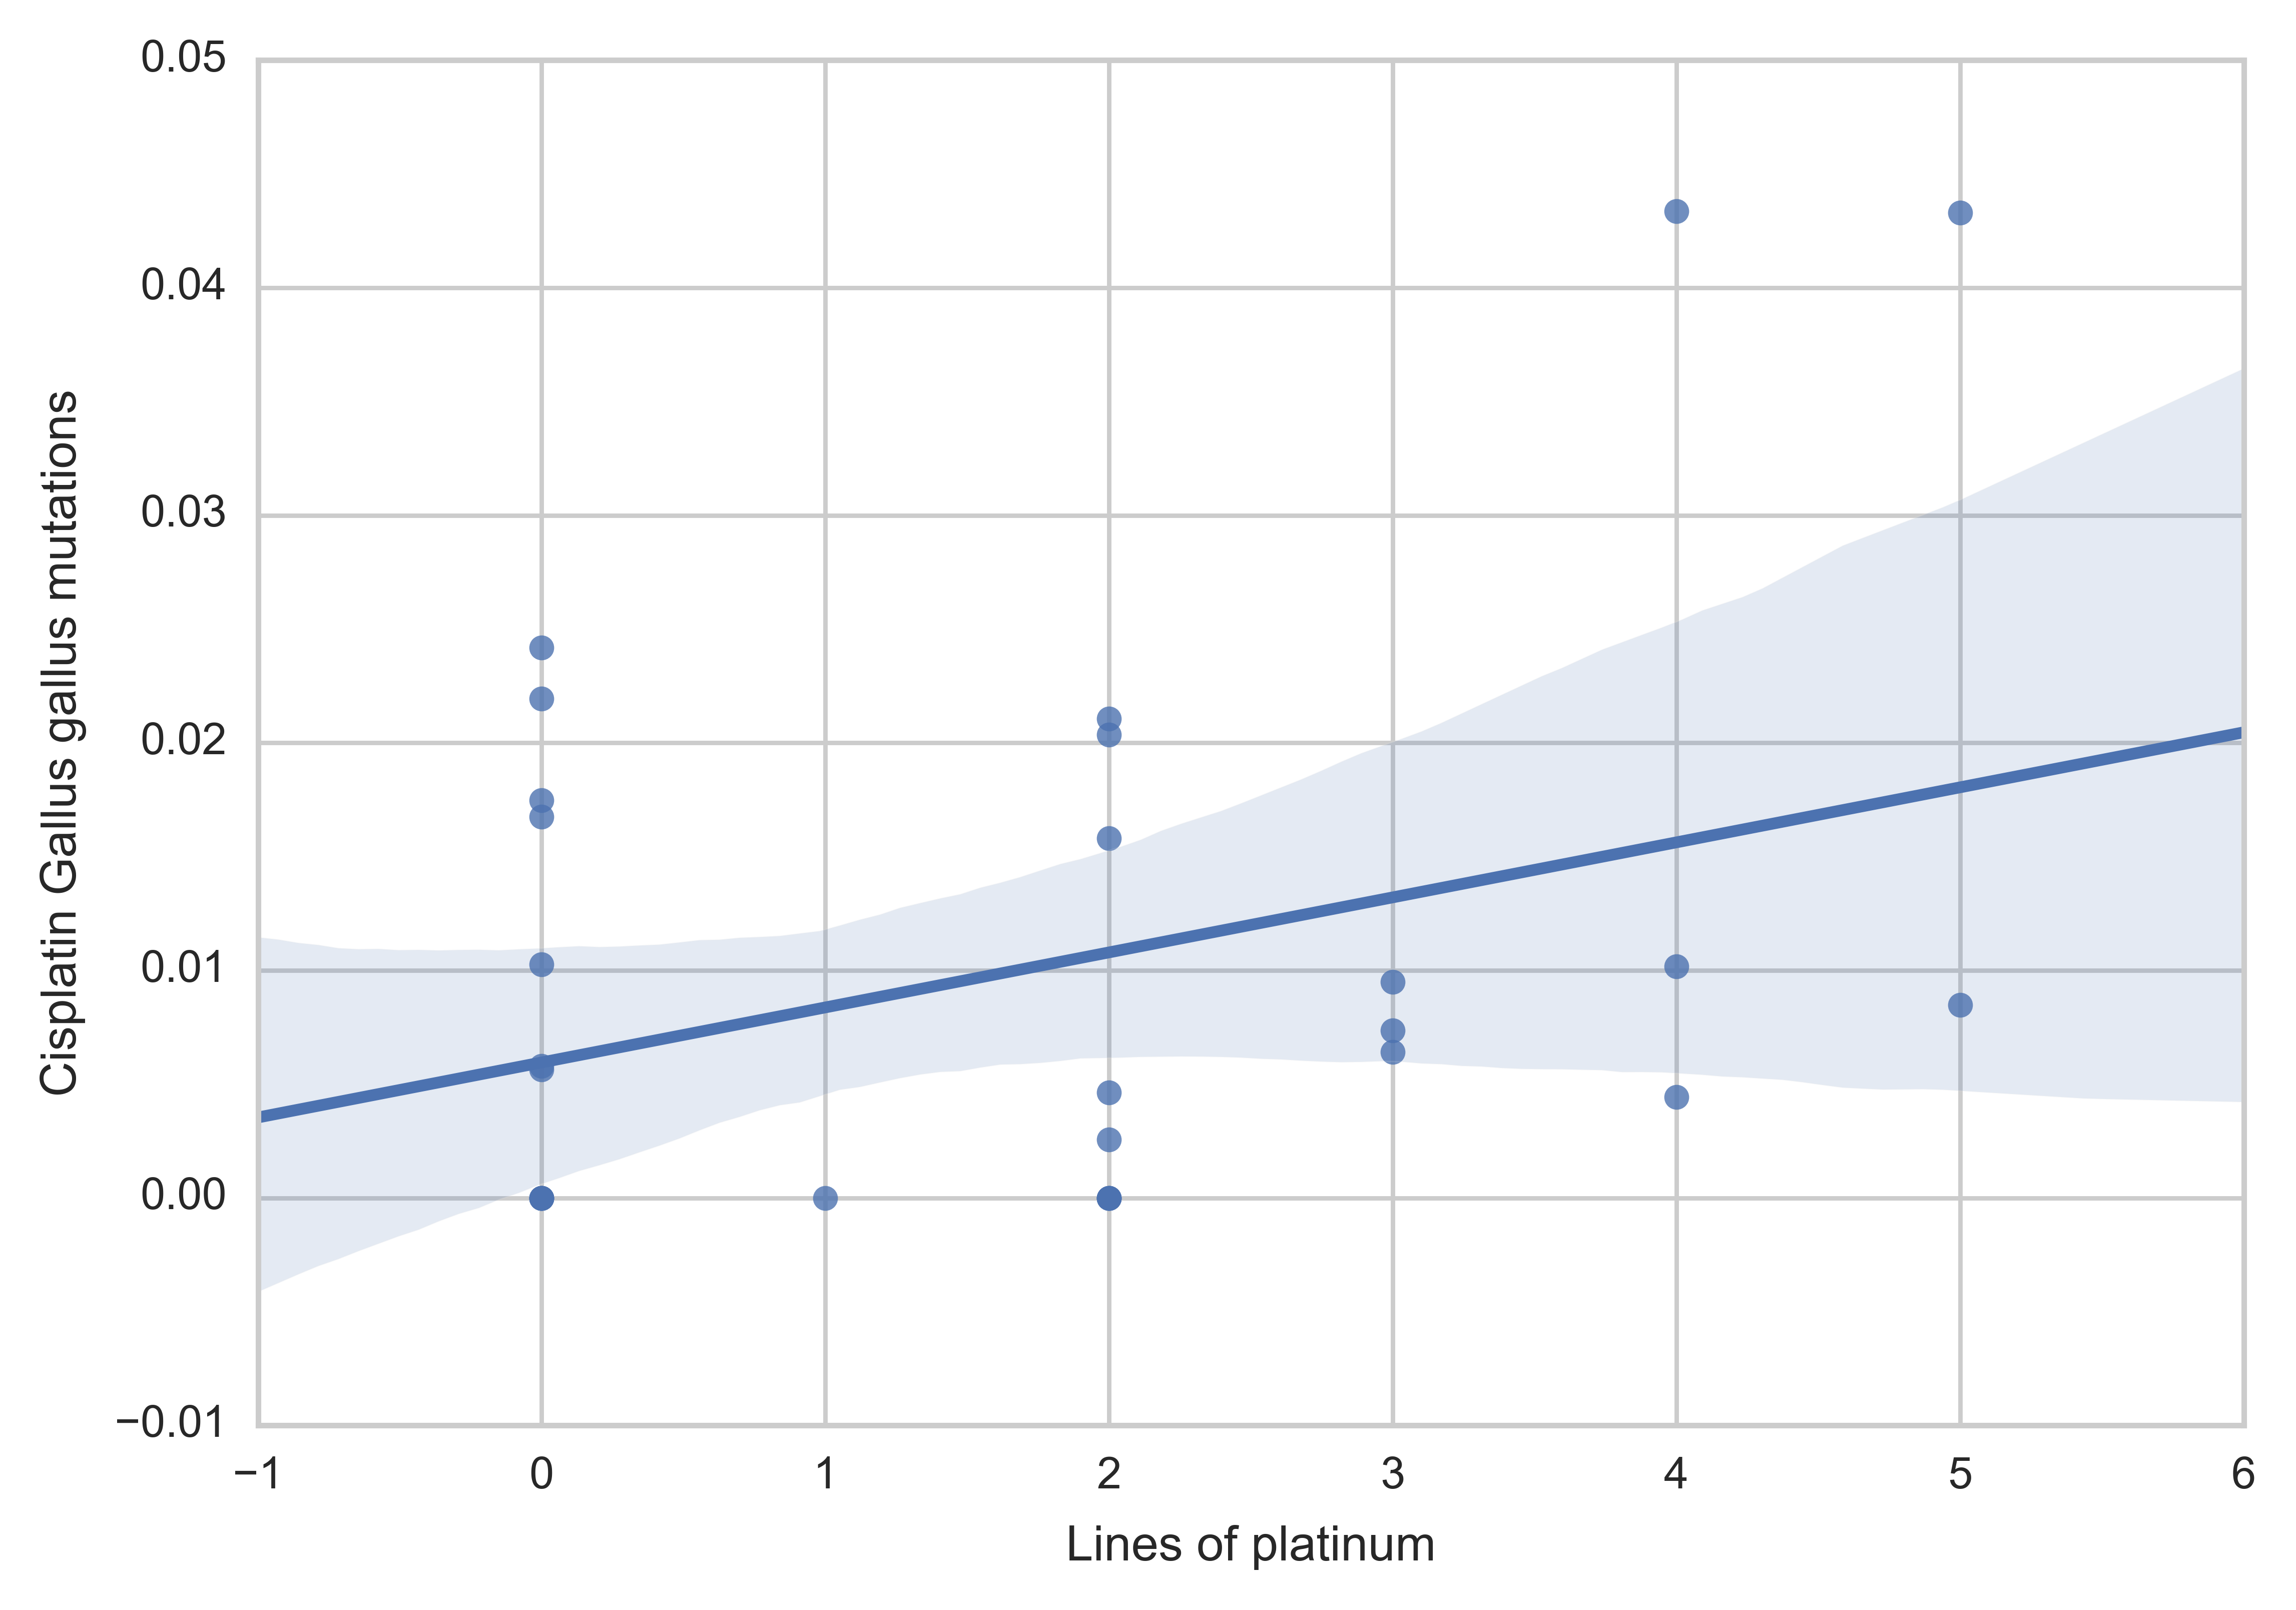

In [305]:
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="Lines of platinum",
    y='Cisplatin Gallus gallus mutations',
)

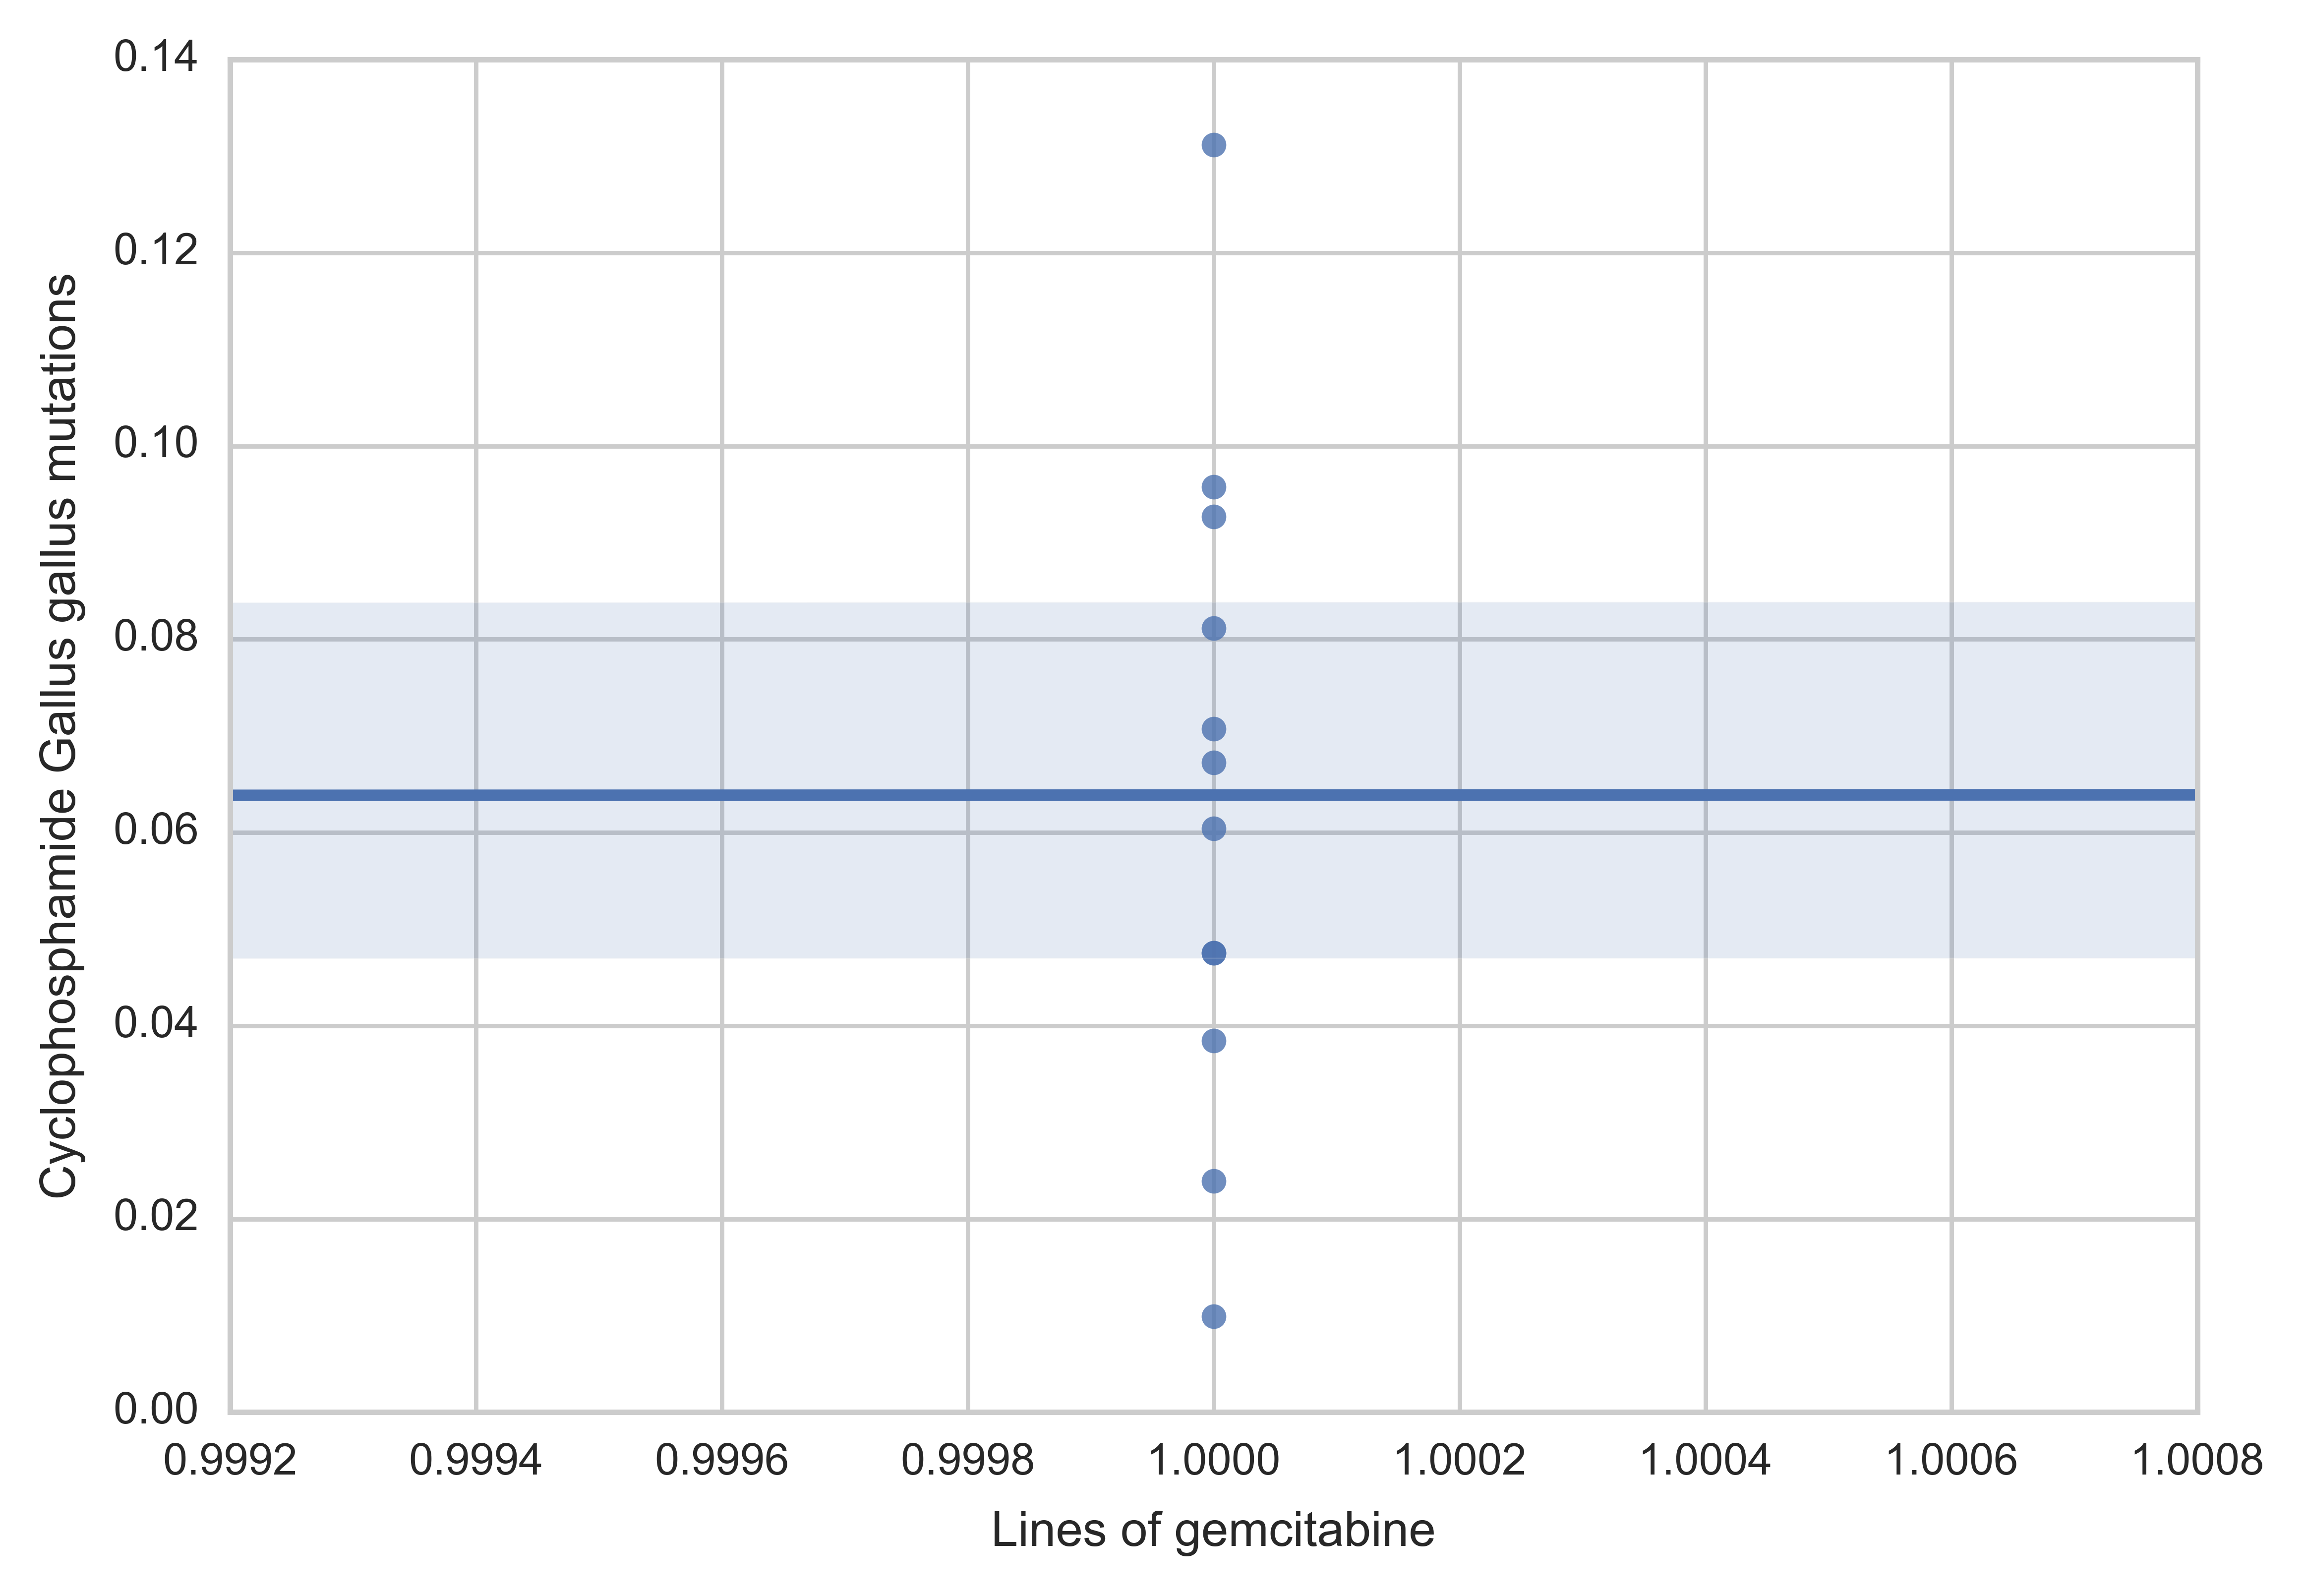

In [307]:
seaborn.regplot(
    data=new_cohort_df.ix[new_cohort_df.specific_treatment == "relapse/treated"],
    x="Lines of gemcitabine",
    y='Cyclophosphamide Gallus gallus mutations',
)

In [264]:
new_cohort_df["total lines"].unique()

array([ nan,   5.,   4.,   2.,   1.,   7.,   8.,   6.,   3.])

In [219]:
(new_cohort_df["days since last chemo"].dropna() <= 7).shape

(23,)

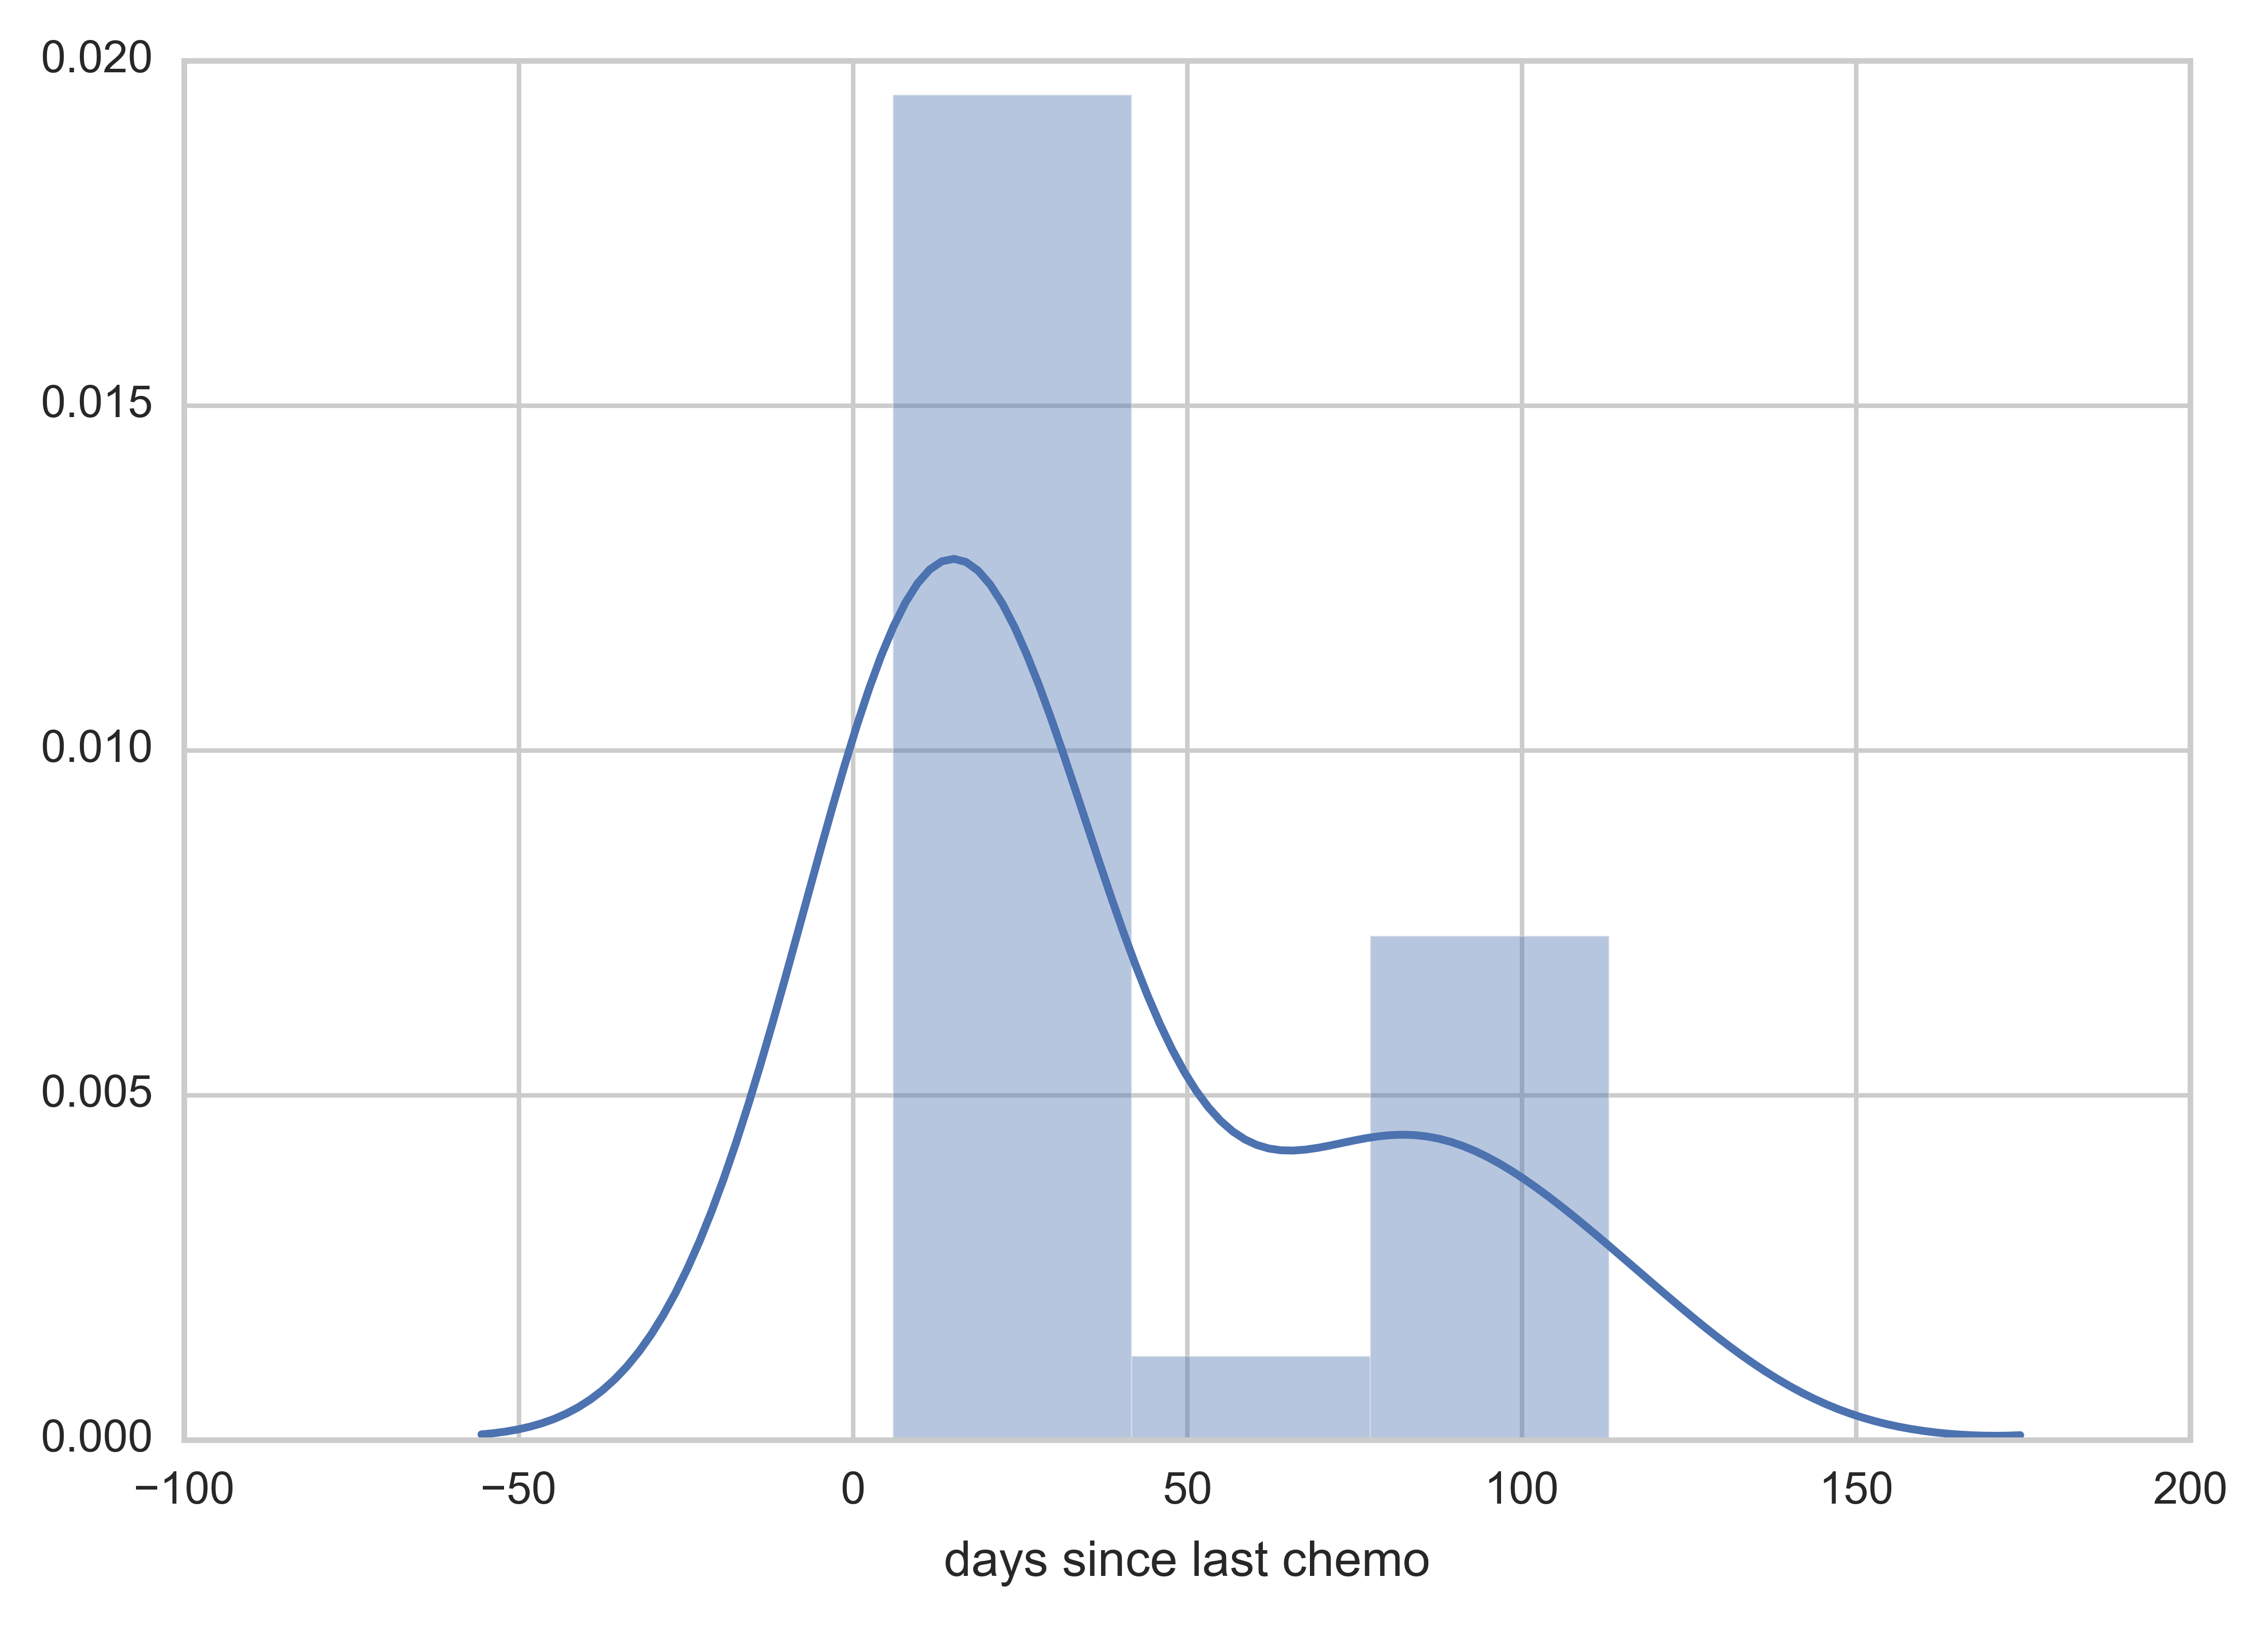

In [209]:
seaborn.distplot(new_cohort_df["days since last chemo"].dropna())

In [205]:
new_cohort_df.ix[new_cohort_df.donor == "AOCS-092"]

source_id               RNA_id RNA biospecimen  \
source_id                                                         
AOCS-092-1-6  AOCS-092-1-6  ICGCDBDE20131122027    AOCS-092-2-X   
AOCS-092-3-3  AOCS-092-3-3  ICGCDBDE20131122028    AOCS-092-4-7   

                                       DNA_id DNA_biospecimen  \
source_id                                                       
AOCS-092-1-6  AOCS_092_ICGC_DBPC_20130205_061    AOCS-092-1-6   
AOCS-092-3-3  AOCS_092_ICGC_DBPC_20130205_059    AOCS-092-3-3   

             specimen_type_description CollectionPoint SpecimenType  \
source_id                                                             
AOCS-092-1-6            primary tumour         Primary       Tumour   
AOCS-092-3-3   recurrent ascitic fluid      Recurrence      Ascites   

                                                  RNA data file  \
source_id                                                         
AOCS-092-1-6  131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_092_IC...   
AOCS-092-3-3  131206_EXTERN_0045_AC2KJBACXX.nopd.AOCS_092_IC...   

                DNA_sample_string icgc_sample_id project_code  \
source_id                                                       
AOCS-092-1-6  ICGCDBPC20130205061       SA505676        OV-AU   
AOCS-092-3-3  ICGCDBPC20130205059       SA505685        OV-AU   

             submitted_sample_id icgc_specimen_id submitted_specimen_id  \
source_id                                                                 
AOCS-092-1-6        AOCS-092-1-6         SP101628            AOCS-092-1   
AOCS-092-3-3        AOCS-092-3-3         SP101630           AOCS-092-13   

             icgc_donor_id submitted_donor_id  analyzed_sample_interval  \
source_id                                                                 
AOCS-092-1-6       DO46374           AOCS-092                     963.0   
AOCS-092-3-3       DO46374           AOCS-092                      63.0   

              percentage_cellularity level_of_cellularity  study  \
source_id                                                          
AOCS-092-1-6                    83.0                 >81%  PCAWG   
AOCS-092-3-3                    89.0                 >81%    NaN   

             study_specimen_involved_in                  specimen_type  \
source_id                                                                
AOCS-092-1-6                      PCAWG  Primary tumour - solid tissue   
AOCS-092-3-3                        NaN       Recurrent tumour - other   

                  specimen_type_other  specimen_interval         ...          \
source_id                                                        ...           
AOCS-092-1-6                      NaN                  0         ...           
AOCS-092-3-3  recurrent ascitic fluid               1370         ...           

             gemcitabine cyclophosphamide topotecan cisplatin olaparib  \
source_id                                                                
AOCS-092-1-6       False            False     False     False    False   
AOCS-092-3-3        True            False      True      True    False   

             docetaxel bevacizumab  etoposide nab-paclitaxel  \
source_id                                                      
AOCS-092-1-6     False       False      False          False   
AOCS-092-3-3      True       False       True          False   

             farletuzumab/placebo   patient days since last chemo  \
source_id                                                           
AOCS-092-1-6                False  AOCS-092                   NaN   
AOCS-092-3-3                False  AOCS-092                   7.0   

             Rounds of carboplatin Rounds of paclitaxel Rounds of gemcitabine  \
source_id                                                                       
AOCS-092-1-6                   NaN                  NaN                   NaN   
AOCS-092-3-3                   2.0                  2.0                   1.0   

             Rounds of 

In [47]:
new_cohort_df[["cyclophosphamide", "Cyclophosphamide"]].sum()

cyclophosphamide    6.0
Cyclophosphamide    6.0
dtype: float64